<a href="https://colab.research.google.com/github/Funskil/DM-Customer-Segmentation-with-clustering/blob/main/Codebase/DM_Project_Group43.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



## XYZ SPORTS
###

| First Name  | Last Name | Student ID       |
|-------------|-----------|----------|
| Ayotunde    | Aribo     |  |
| Ozichi      | Mbagwu    |  |
| David       | Fortunato |  |



## Table of Contents
* [1. Import libraries](#imports)
    
* [2. Data Exploration](#eda)

* [3. Data Preparation](#DataPreparation)
    * [3.1 Dealing with missing values](#MissingValues)
    * [3.2 Outliers](#outliers)
    * [3.3 Missing values](#MissingVal)
        * [3.3.1 Numerical variables](#MissValNumVar)
        * [3.3.2 Categorical variables](#MissValCatVar)
    * [3.4 Inconsistencies](#inconsistencies)
    
* [4. Feature Engineering](#FeatureEngineering)
    * [4.1 New Columns](#NewColumns)
    * [4.2 Data Normalization](#DataNormalization)
    * [4.3 One Hot Encoding](#ohe)

* [5. Modeling](#modeling)
    * [5.1 Hierarchical clustering](#HC)
    * [5.2 K-Means](#KM)
        * [5.2.1 Two clusters](#2clusters)
        * [5.2.2 Five clusters](#5clusters)
    
* [6. Cluster Analysis](#ClusterAnalysis)
    * [6.1 Cluster 0](#Cluster0)
    * [6.2 Cluster 1](#Cluster1)
    * [6.3 Cluster 2](#Cluster2)
    * [6.4 Cluster 3](#Cluster3)
    * [6.5 Cluster 4](#Cluster4)
    * [6.6 Clusters Summary](#ClusterSummary)
    
* [7. Conclusions](#conclusions)

# 1. Import libraries <a name="imports"></a>
<hr style="border:2px solid gray">

In [1]:
# Basic libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#from sklearn import

import seaborn as sns
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder

from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
import matplotlib.cm as cm
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import MeanShift, estimate_bandwidth, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

import warnings
warnings.filterwarnings("ignore")

---

# 2. Data Exploration <a name="eda"></a>

<hr style="border:2px solid gray">


In [ ]:
# Loading the data
df = pd.read_sas('a2z_insurance.sas7bdat')

In [ ]:
df.head()

CustID  FirstPolYear  BirthYear             EducDeg  MonthSal  GeoLivArea  \
0     1.0        1985.0     1982.0  b'2 - High School'    2177.0         1.0   
1     2.0        1981.0     1995.0  b'2 - High School'     677.0         4.0   
2     3.0        1991.0     1970.0        b'1 - Basic'    2277.0         3.0   
3     4.0        1990.0     1981.0      b'3 - BSc/MSc'    1099.0         4.0   
4     5.0        1986.0     1973.0      b'3 - BSc/MSc'    1763.0         4.0   

   Children  CustMonVal  ClaimsRate  PremMotor  PremHousehold  PremHealth  \
0       1.0      380.97        0.39     375.85          79.45      146.36   
1       1.0     -131.13        1.12      77.46         416.20      116.69   
2       0.0      504.67        0.28     206.15         224.50      124.58   
3       1.0      -16.99        0.99     182.48          43.35      311.17   
4       1.0       35.23        0.90     338.62          47.80      182.59   

   PremLife  PremWork  
0     47.01     16.89  
1    194.48    106.13  
2     86.35     99.02  
3     35.34     28.34  
4     18.78     41.45

In [ ]:
# Firstly, we replace the "" values for nans. This is because sometimes
# the data presents blank spaces "". We will replace them with "nans"
df.replace("", np.nan, inplace=True)

In [ ]:
df.dtypes

CustID           float64
FirstPolYear     float64
BirthYear        float64
EducDeg           object
MonthSal         float64
GeoLivArea       float64
Children         float64
CustMonVal       float64
ClaimsRate       float64
PremMotor        float64
PremHousehold    float64
PremHealth       float64
PremLife         float64
PremWork         float64
dtype: object

In [ ]:
# Checking descriptive statistics
df.describe(include="all").T

count unique             top  freq         mean          std  \
CustID         10296.0    NaN             NaN   NaN       5148.5   2972.34352   
FirstPolYear   10266.0    NaN             NaN   NaN  1991.062634   511.267913   
BirthYear      10279.0    NaN             NaN   NaN  1968.007783    19.709476   
EducDeg          10279      4  b'3 - BSc/MSc'  4799          NaN          NaN   
MonthSal       10260.0    NaN             NaN   NaN  2506.667057  1157.449634   
GeoLivArea     10295.0    NaN             NaN   NaN     2.709859     1.266291   
Children       10275.0    NaN             NaN   NaN     0.706764     0.455268   
CustMonVal     10296.0    NaN             NaN   NaN   177.892605  1945.811505   
ClaimsRate     10296.0    NaN             NaN   NaN     0.742772     2.916964   
PremMotor      10262.0    NaN             NaN   NaN   300.470252   211.914997   
PremHousehold  10296.0    NaN             NaN   NaN   210.431192   352.595984   
PremHealth     10253.0    NaN             NaN   NaN   171.580833   296.405976   
PremLife       10192.0    NaN             NaN   NaN    41.855782    47.480632   
PremWork       10210.0    NaN             NaN   NaN    41.277514    51.513572   

                     min      25%     50%       75%       max  
CustID               1.0  2574.75  5148.5   7722.25   10296.0  
FirstPolYear      1974.0   1980.0  1986.0    1992.0   53784.0  
BirthYear         1028.0   1953.0  1968.0    1983.0    2001.0  
EducDeg              NaN      NaN     NaN       NaN       NaN  
MonthSal           333.0   1706.0  2501.5   3290.25   55215.0  
GeoLivArea           1.0      1.0     3.0       4.0       4.0  
Children             0.0      0.0     1.0       1.0       1.0  
CustMonVal    -165680.42    -9.44  186.87  399.7775  11875.89  
ClaimsRate           0.0     0.39    0.72      0.98     256.2  
PremMotor          -4.11   190.59  298.61     408.3  11604.42  
PremHousehold      -75.0    49.45   132.8    290.05   25048.8  
PremHealth         -2.11    111.8  162.81    219.82   28272.0  
PremLife            -7.0     9.89   25.56     57.79     398.3  
PremWork           -12.0    10.67   25.67     56.79    1988.7

It can be seen that the data presents some inconsistencies.
* The standard deviation of `FirstPolYear` is very high, which in the real world is impossible to happen because this variable can't deviate that much from the mean. If we observe the maximum value of this variable we would realize, at least, one of the problems: that value is 53784, which is clearly a wrong value, maybe because an human error when collecting the data.
* The variable `BirthYear` presents same type of problem, because the minimum value is 1028, which must be because an error. It is possible that in this variable we could not get a lot of rows with this problem, because the maximum value is 2001 and because the standard deviation, which value is 19.7, seem to be reliable. Therefore, the data must be skewed by the minimum value aforementioned, and maybe more values below a trustable minimum.
* Further analysis would be made to the monthly salary (`MonthSal`), because it presents a minimum value that is below the minimum salary of Portugal, but it has to be put into consideration because there could be customers that don't work in Portugal because we have a significant portion whose acquisition comes from the web site. Also we would study if the values have concordance with the other variables' values, for example, that a person that have all insurance programs would earn the minimum amount to afford the payments.
* For `CustMonVal` we can observe that we have very low values. Those values must be outliers, unless the company spent a lot amount of money on a specific client. In practice, the company would spend a lot of money to acquire a new client only if the risk of the decision is very low or would represent a very high profit that surpass enormously the quantity spent on the client , but in this case those values possibly mean that the risk of losing the quantity spent on the client was extremely high, and the expected profit was extremely high. It is not very probable that an insurance company took this type of risk on one client, so we will have to consider to cap those values, or imputate them, depending on a further analysis of the variable. High values should be studied apart.
* If `ClaimsRate` is between 0 and 1, then it represents that the company paid less than the amount that it spent on the customer in the last two years. If this value is above 1, then the company paid more than the money received from the regular payment of the client in the last two years. If the value is 1. the company received the same amount of money than the quantity spent on the client. The maximum value in this variable is 256, which means that the company paid 256 times the premium that was received from the client in the last two years. It is possible that this is an outlier, but a deeper analysis must be made.
* The `PremXXXX` variables seem to be okay, but it should be applied a boxplot and another techniques to identify if there exist inconsistencies in those variables.

It is important to remember that the variable `Children` is a binary variable that answers the question: Does the person have children?

---

# 3. Data Preparation <a name="DataPreparation"></a>
<hr style="border:2px solid gray">

Now the 'ID' column is going to be set as the index of the dataframe.

In [ ]:
# Checking that we have the same amount of unique values in 'ID' column as rows in the dataframe
df["CustID"].nunique() == df.shape[0]

True

In [ ]:
#Assessoring that each value in "CustID" column is an integer and not have decimals
( ((df["CustID"] - df["CustID"].astype("int") ) == 0).sum() ) == df.shape[0]

True

In [ ]:
#Converting the column in an integer type
df["CustID"] = df["CustID"].astype("int")

In [ ]:
# We are going to assess that we do not have duplicate data
df.duplicated().sum()

0

In [ ]:
#Assessoring when omitting "CustID"
df[ df.drop("CustID", axis = 1).duplicated() ]

CustID  FirstPolYear  BirthYear             EducDeg  MonthSal  \
8013    8014        1987.0     1987.0  b'2 - High School'    1912.0   
8121    8122        1977.0     1974.0  b'2 - High School'    2204.0   
9553    9554        1986.0     1952.0  b'2 - High School'    3900.0   

      GeoLivArea  Children  CustMonVal  ClaimsRate  PremMotor  PremHousehold  \
8013         4.0       1.0      290.61        0.58     202.37         177.25   
8121         4.0       1.0      -22.11        1.00     214.93          88.90   
9553         4.0       0.0     -119.35        1.10     163.03         481.75   

      PremHealth  PremLife  PremWork  
8013      306.39     63.90     -0.11  
8121      266.94     39.23     42.12  
9553      224.82     94.35     18.56

It can be seen above that we only have three duplicated rows when omitting `CustID`. Therefore, the duplicated rows will be deleted, thus it is going to be kept only one of the duplicated rows.

In [ ]:
#We drop duplicated columns when excluding "CustID" from the dataframe
df = df.drop_duplicates(subset=df.columns.difference(['CustID']), keep='first')

In [ ]:
#Converting the ID column into the index of the dataframe
df.set_index("CustID")

FirstPolYear  BirthYear             EducDeg  MonthSal  GeoLivArea  \
CustID                                                                      
1             1985.0     1982.0  b'2 - High School'    2177.0         1.0   
2             1981.0     1995.0  b'2 - High School'     677.0         4.0   
3             1991.0     1970.0        b'1 - Basic'    2277.0         3.0   
4             1990.0     1981.0      b'3 - BSc/MSc'    1099.0         4.0   
5             1986.0     1973.0      b'3 - BSc/MSc'    1763.0         4.0   
...              ...        ...                 ...       ...         ...   
10292         1984.0     1949.0          b'4 - PhD'    3188.0         2.0   
10293         1977.0     1952.0        b'1 - Basic'    2431.0         3.0   
10294         1994.0     1976.0      b'3 - BSc/MSc'    2918.0         1.0   
10295         1981.0     1977.0        b'1 - Basic'    1971.0         2.0   
10296         1990.0     1981.0          b'4 - PhD'    2815.0         1.0   

        Children  CustMonVal  ClaimsRate  PremMotor  PremHousehold  \
CustID                                                               
1            1.0      380.97        0.39     375.85          79.45   
2            1.0     -131.13        1.12      77.46         416.20   
3            0.0      504.67        0.28     206.15         224.50   
4            1.0      -16.99        0.99     182.48          43.35   
5            1.0       35.23        0.90     338.62          47.80   
...          ...         ...         ...        ...            ...   
10292        0.0       -0.11        0.96     393.74          49.45   
10293        0.0     1405.60        0.00     133.58        1035.75   
10294        1.0      524.10        0.21     403.63         132.80   
10295        1.0      250.05        0.65     188.59         211.15   
10296        1.0      463.75        0.27     414.08          94.45   

        PremHealth  PremLife  PremWork  
CustID                                  
1           146.36     47.01     16.89  
2           116.69    194.48    106.13  
3           124.58     86.35     99.02  
4           311.17     35.34     28.34  
5           182.59     18.78     41.45  
...            ...       ...       ...  
10292       173.81      9.78     14.78  
10293       143.25     12.89    105.13  
10294       142.25     12.67      4.89  
10295       198.37     63.90    112.91  
10296       141.25      6.89     12.89  

[10293 rows x 13 columns]

Now we look which columns are non metric features and which ones are metric features.

In [ ]:
# Define metric and non-metric features.

#It must be observed that the variable "GeoLivArea" is also non metric, because each
#of the values indicate a region, and non order is defined in those numbers.
#Also, "Children" variable is also non metric, because it only shows if a person
#has or not children, but not how many

non_metric_features = ["EducDeg","GeoLivArea","Children"]
metric_features = df.columns.drop(non_metric_features).to_list()

---

## 3.1 Dealing with missing values <a name="MissingValues"></a>
In this section we are going to make decisions regarding the missing values in each column.

In [ ]:
# count of missing values
df.isna().sum()

CustID             0
FirstPolYear      30
BirthYear         17
EducDeg           17
MonthSal          36
GeoLivArea         1
Children          21
CustMonVal         0
ClaimsRate         0
PremMotor         34
PremHousehold      0
PremHealth        43
PremLife         104
PremWork          86
dtype: int64

In can be seen that we have several missing values in different columns. We are going to see the proportion of data that we could get if we delete missing values

In [ ]:
df_NMV = df.dropna() #df without missing values
df_MV = df[ df.isnull().any(axis=1) ] #df only records with at least one missing value

df_rows = df.shape[0]
df_rows_NoMissing = df.dropna().shape[0]

print( 'Data without missing values: ',((df_rows_NoMissing / df_rows) * 100),'%' )
print( 'Proportion of records with missing values',((1-(df_rows_NoMissing / df_rows)) * 100),'%' )
print( 'Rows without removing missing data: ', df_rows )
print( 'Rows removing missing data: ', df_rows_NoMissing )

Data without missing values:  96.99795977849024 %
Proportion of records with missing values 3.002040221509761 %
Rows without removing missing data:  10293
Rows removing missing data:  9984


It can be seen that only 3% of the data present at least one missing value. Those rows will be kept in one dataframe apart from the data. The reason for that is to, first, we will work with the outliers and the inconsistencies that the data could present, and then, we will analyse the possibilities of keeping the rows with missing data out or imputing the missing values.
We consider that the outliers must have to be clean firstly, and then the inconsistencies within the data.

---

## 3.2 Outliers <a name="outliers"></a>

### `FirstPolYear`

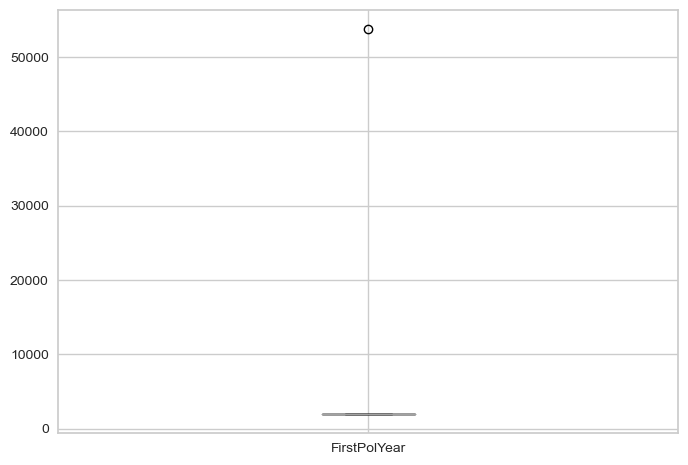

In [ ]:
# Boxplot of 'FirstPolYear'
%matplotlib inline
df_NMV.boxplot(column=['FirstPolYear']);

It is possible that only one row has that extreme value. Let's see it.

In [ ]:
df_NMV[ df_NMV['FirstPolYear']>2016 ]

CustID  FirstPolYear  BirthYear         EducDeg  MonthSal  GeoLivArea  \
9294    9295       53784.0     1948.0  b'3 - BSc/MSc'    3268.0         1.0   

      Children  CustMonVal  ClaimsRate  PremMotor  PremHousehold  PremHealth  \
9294       0.0      348.85        0.37      351.4           15.0      187.37   

      PremLife  PremWork  
9294     22.45     17.78

We will save that row in another variable, so maybe we could delete that outlier or imputate it at the end.

In [ ]:
df_FirstPolYear_treat_outlier = df_NMV[ df_NMV['FirstPolYear']>2016 ]

We check again the boxplot without the outlier just seen

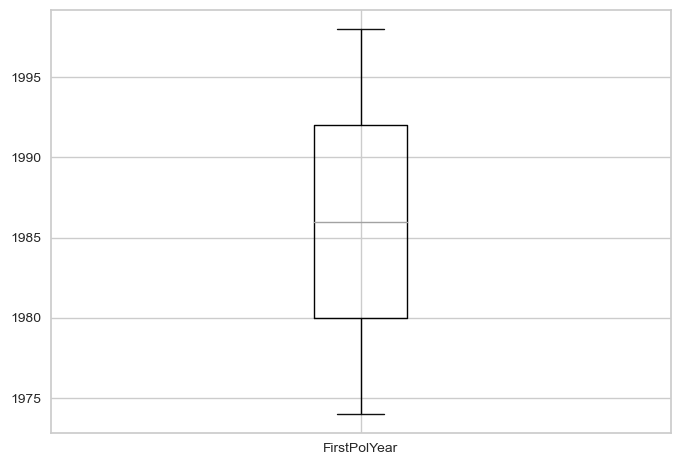

In [ ]:
provisional_df = df_NMV[ df_NMV['FirstPolYear']<=2016 ]
provisional_df.boxplot(column=['FirstPolYear']);

We do not have outliers in that column anymore

### `BirthYear`

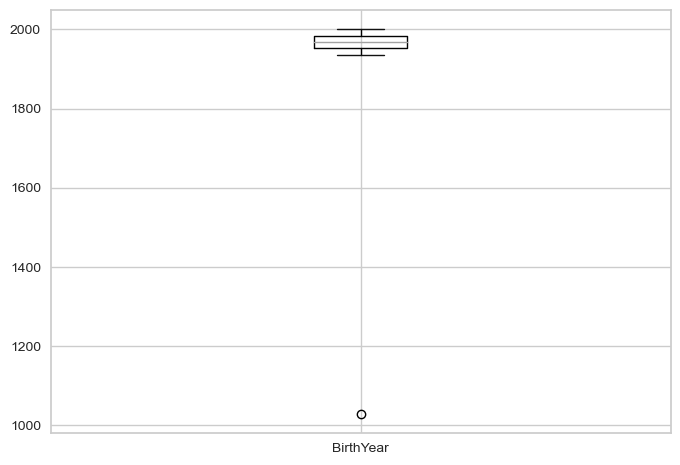

In [ ]:
df_NMV.boxplot(column=['BirthYear']);

We have the same problem as the observed above. In the next block of code we will apply the same steps as the ones applied above.

In [ ]:
df_NMV[ df_NMV['BirthYear']<1900 ]

CustID  FirstPolYear  BirthYear         EducDeg  MonthSal  GeoLivArea  \
7195    7196        1993.0     1028.0  b'3 - BSc/MSc'    2830.0         4.0   

      Children  CustMonVal  ClaimsRate  PremMotor  PremHousehold  PremHealth  \
7195       0.0      146.02        0.77     428.97          192.8      108.91   

      PremLife  PremWork  
7195      1.89     23.67

In [ ]:
df_BirthYear_treat_outlier = df_NMV[ df_NMV['BirthYear']<1900 ]

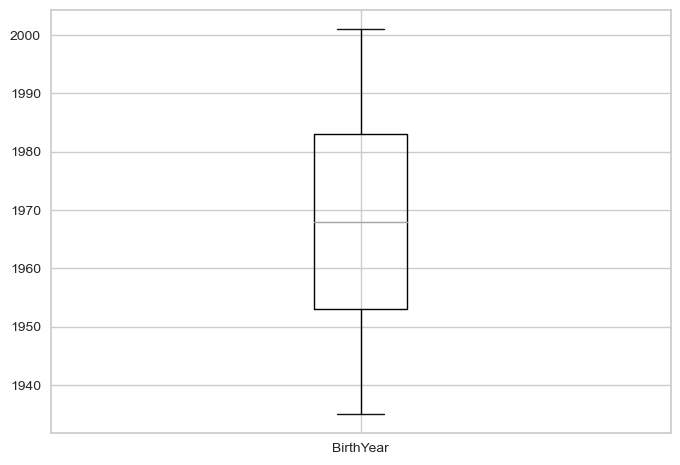

In [ ]:
provisional_df = df_NMV[ df_NMV['BirthYear']>=1900 ]
provisional_df.boxplot(column=['BirthYear']);

### MonthSal

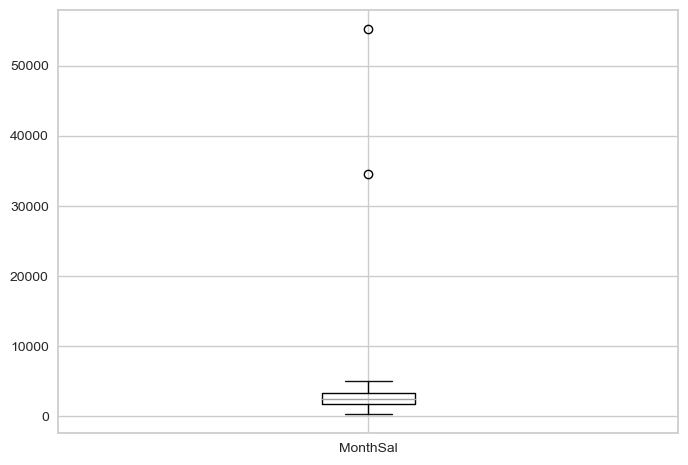

In [ ]:
# Boxplot of 'MonthSal'
df_NMV.boxplot(column=['MonthSal']);

In [ ]:
df_NMV[ df_NMV['MonthSal']>10000 ]

CustID  FirstPolYear  BirthYear             EducDeg  MonthSal  \
5882    5883        1995.0     1956.0  b'2 - High School'   55215.0   
8261    8262        1981.0     1991.0  b'2 - High School'   34490.0   

      GeoLivArea  Children  CustMonVal  ClaimsRate  PremMotor  PremHousehold  \
5882         4.0       1.0      122.25        0.79     281.83         147.25   
8261         4.0       0.0      608.89        0.28      57.01         358.95   

      PremHealth  PremLife  PremWork  
5882      130.58     84.46     66.68  
8261      195.26    113.80    161.14

It can be seen that only two persons have very high monthly salaries (over €10,000). These values could be explained by human error when creating the table, but also could be real information. So, while possible, we must remember that outliers can skew the data. Therefore, we will have to decide what to do, dropping those rows, imputing the values or maybe setting an upper bound.

In [ ]:
# Saving apart those two rows
df_MonthSal_treat_outlier = df_NMV[ df_NMV['MonthSal']>10000 ]

Boxplot when ommiting those rows.

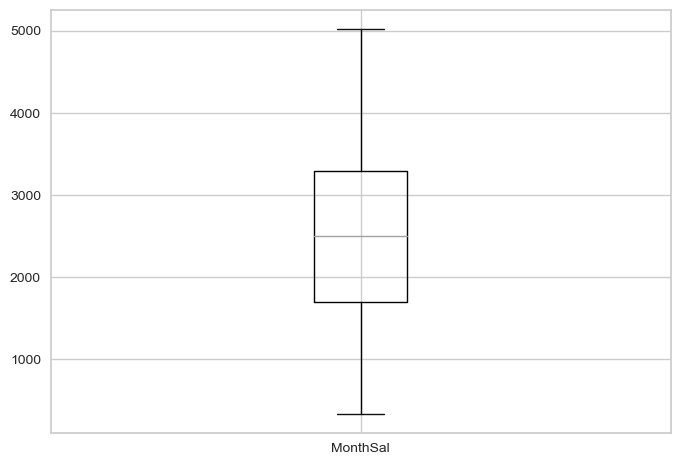

In [ ]:
provisional_df = df_NMV[ df_NMV['MonthSal']<=10000 ]
provisional_df.boxplot(column=['MonthSal']);

### `CustMonVal`

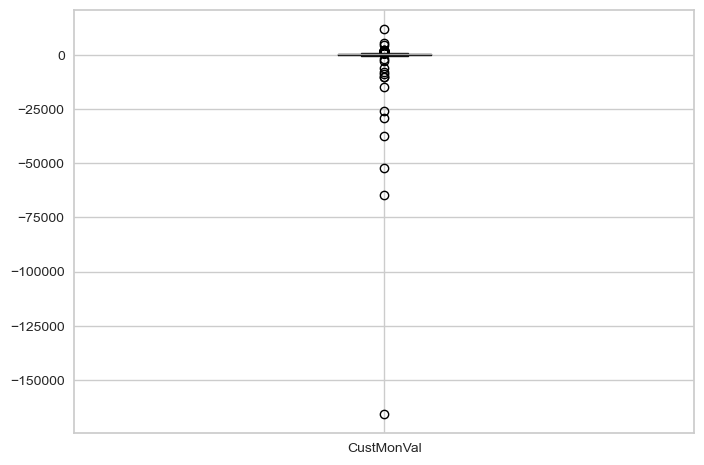

In [ ]:
# Boxplot of 'CustMonVal'
df_NMV.boxplot(column=['CustMonVal']);

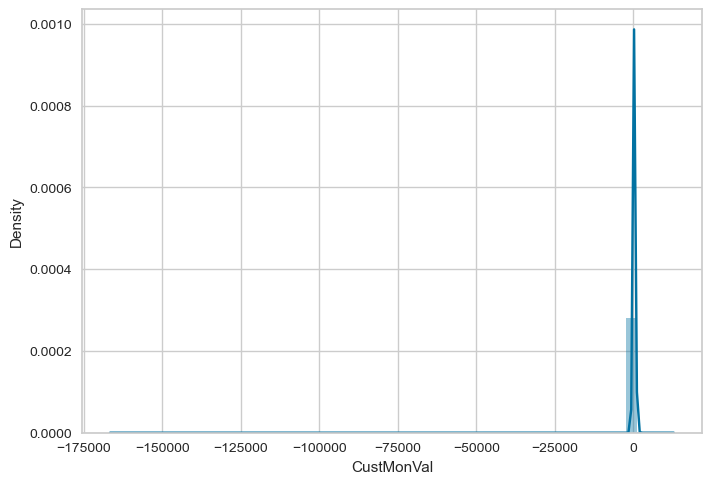

In [ ]:
# Histogram of 50 bins and density plot
sns.distplot(df_NMV['CustMonVal'], bins=50, hist=True)
plt.show()

The data presents a very long tail to the left because of a couple of very low values. Those values are possible in the reality, but should be analised to have an idea of their existence.

In [ ]:
df_NMV_toStudy = df_NMV[ df_NMV['CustMonVal']< -25000 ]
df_NMV_toStudy

CustID  FirstPolYear  BirthYear             EducDeg  MonthSal  \
171      172        1990.0     1989.0      b'3 - BSc/MSc'    1086.0   
655      656        1974.0     1963.0      b'3 - BSc/MSc'    3279.0   
675      676        1994.0     1937.0  b'2 - High School'    4435.0   
707      708        1991.0     1991.0      b'3 - BSc/MSc'    1634.0   
917      918        1986.0     1952.0  b'2 - High School'    3355.0   
9648    9649        1990.0     1950.0      b'3 - BSc/MSc'    3574.0   

      GeoLivArea  Children  CustMonVal  ClaimsRate  PremMotor  PremHousehold  \
171          4.0       1.0  -165680.42       256.2     378.07          78.90   
655          3.0       1.0   -64891.00        96.0     410.30         117.25   
675          1.0       0.0   -52382.76        63.0     197.48         280.60   
707          1.0       1.0   -28945.40        35.0     175.70         319.50   
917          4.0       0.0   -26130.45        32.3     135.58         290.05   
9648         3.0       0.0   -37327.08        69.0     319.06         -25.55   

      PremHealth  PremLife  PremWork  
171       166.81      6.89     18.45  
655        95.35     37.34     22.56  
675       276.94     51.12     38.34  
707       294.39     44.12     16.89  
917       221.82     86.46    100.13  
9648      245.38      4.89      4.78

Exploring these records and comparing `CustMonVal` with all other variables we must note that the lowest the value is in `CustMonVal`, the highest the value in `ClaimsRate`. With that in mind, we can infer that those outliers are not because human error, but, probably, explained by the Claims Rate, which sounds coherent.
The next shows the correlation between these two variables in the data.

In [ ]:
df_NMV[ ['CustMonVal','ClaimsRate'] ].corr()

CustMonVal  ClaimsRate
CustMonVal    1.000000   -0.992783
ClaimsRate   -0.992783    1.000000

Let's calculate the boxplot and correlation when ommiting all outliers, using the interquartile range, and confirm our inference regarding this issue.

In [ ]:
# IQR
Q1 = df_NMV['CustMonVal'].quantile(0.25)
Q3 = df_NMV['CustMonVal'].quantile(0.75)
IQR = Q3 - Q1
lower_IQR = Q1 - 1.5 * IQR
upper_IQR = Q3 + 1.5 * IQR
df_NMV_NoOutliersCustMonVal = df_NMV[ (df_NMV['CustMonVal']>=lower_IQR) & (df_NMV['CustMonVal']<=upper_IQR) ]

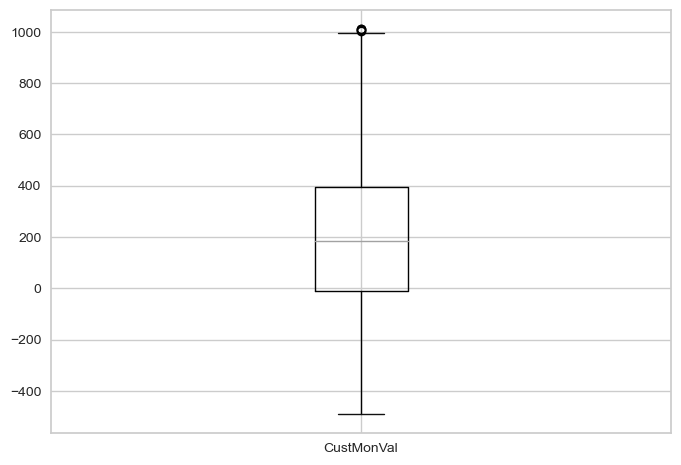

In [ ]:
df_NMV_NoOutliersCustMonVal.boxplot(column=['CustMonVal']);

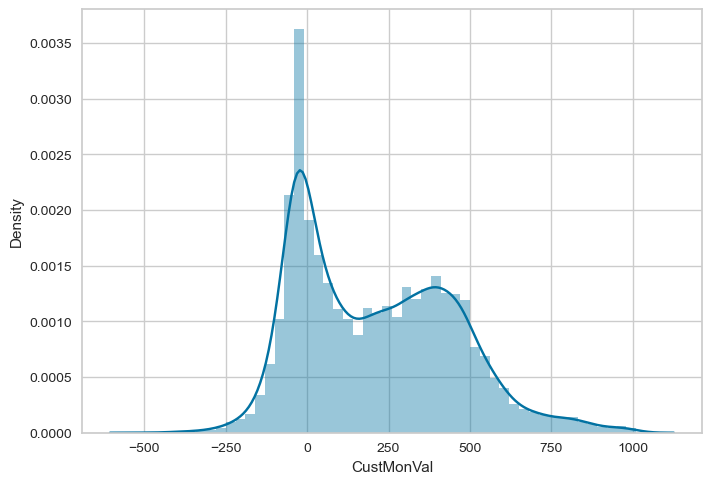

In [ ]:
sns.distplot(df_NMV_NoOutliersCustMonVal['CustMonVal'], bins=50, hist=True)
plt.show()

In [ ]:
df_NMV_NoOutliersCustMonVal[ ['CustMonVal','ClaimsRate'] ].corr()

CustMonVal  ClaimsRate
CustMonVal    1.000000   -0.945554
ClaimsRate   -0.945554    1.000000

We can observe that even when removing outliers in the studied variable, we still have a very high inversely correlation between `CustMonVal` and `ClaimsRate`.
In conclusion, there not exist any justification to delete those outliers, at least not yet. We still have to study the outliers in the variable `ClaimsRate` and not forget this observation.
One last important thing is that, in the data, we have an observation with an extreme low value in `CustMonVal`, and very high value in `ClaimsRate`. If we observe that that Claims Rate value is an outlier and very extreme compared to others, then we will consider to set bound to not have much skew in the data.
In the next lines we save that row in one variable and show a boxplot, the density distribution, and the correlation (between this variable and Claims Rate) when ommiting it.

In [ ]:
# Saving apart the row
df_CustMonVal_treat_outlier = df_NMV[ df_NMV['CustMonVal']<-150000 ]

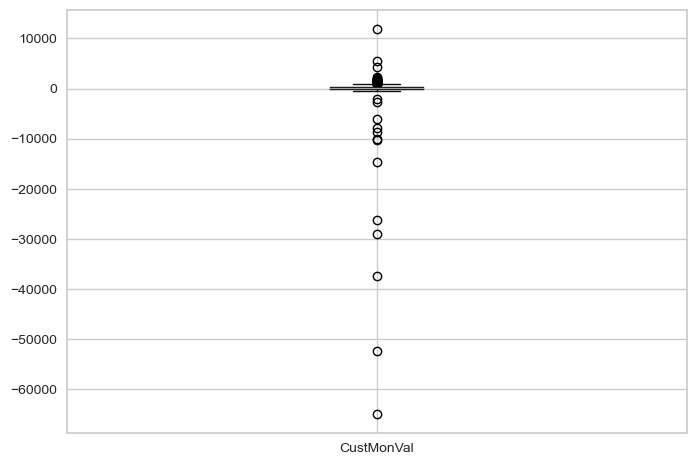

In [ ]:
provisional_df = df_NMV[ df_NMV['CustMonVal']>=-150000 ]
provisional_df.boxplot(column=['CustMonVal']);

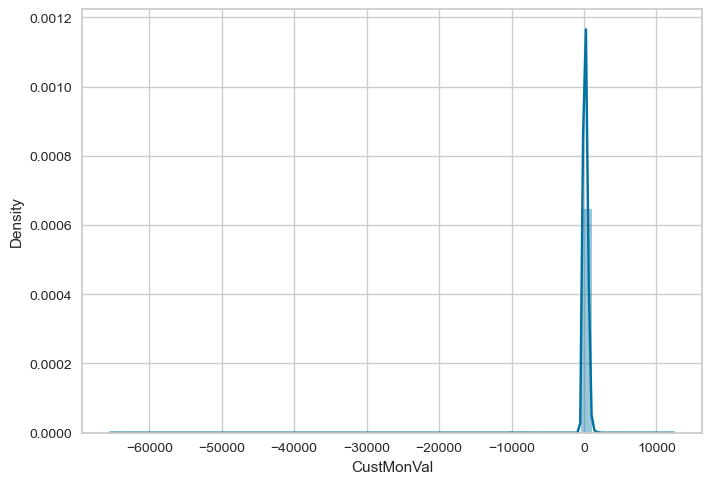

In [ ]:
sns.distplot(provisional_df['CustMonVal'], bins=50, hist=True)
plt.show()

In [ ]:
provisional_df[ ['CustMonVal','ClaimsRate'] ].corr()

CustMonVal  ClaimsRate
CustMonVal    1.000000   -0.977181
ClaimsRate   -0.977181    1.000000

### `ClaimsRate`

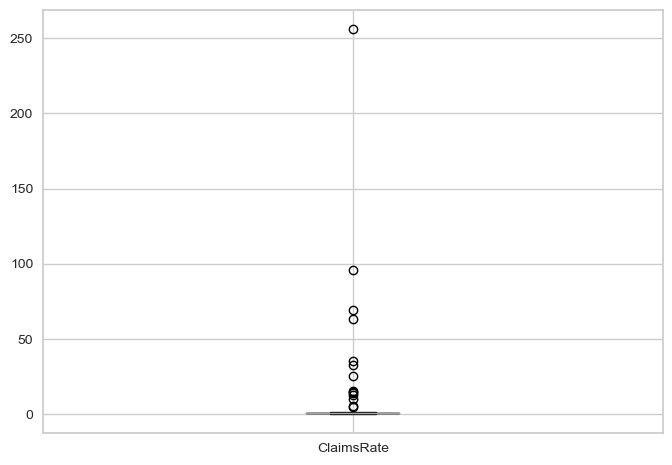

In [ ]:
df_NMV.boxplot(column=['ClaimsRate']);

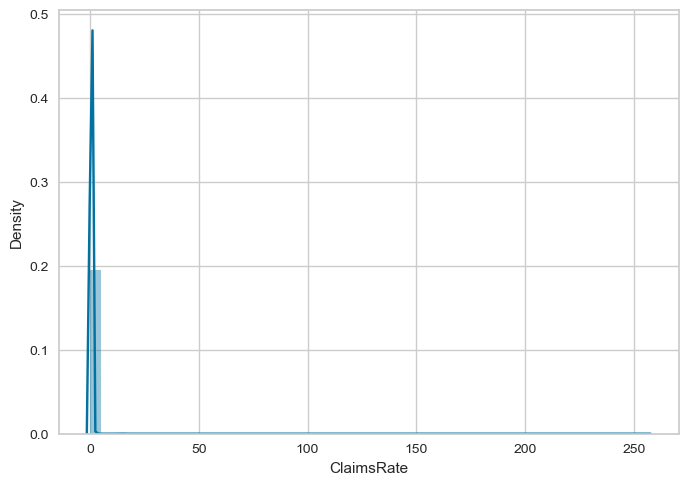

In [ ]:
sns.distplot(df_NMV['ClaimsRate'], bins=50, hist=True)
plt.show()

Again we see a similar issue as the last variable analyzed. The only difference is that, in this variable, the long tail is in the right.

Let's study the variable when omitting outliers using IQR.

In [ ]:
# IQR
Q1 = df_NMV['ClaimsRate'].quantile(0.25)
Q3 = df_NMV['ClaimsRate'].quantile(0.75)
IQR = Q3 - Q1
lower_IQR = Q1 - 1.5 * IQR
upper_IQR = Q3 + 1.5 * IQR
df_NMV_NoOutliersClaimsRate = df_NMV[ (df_NMV['ClaimsRate']>=lower_IQR) & (df_NMV['ClaimsRate']<=upper_IQR) ]

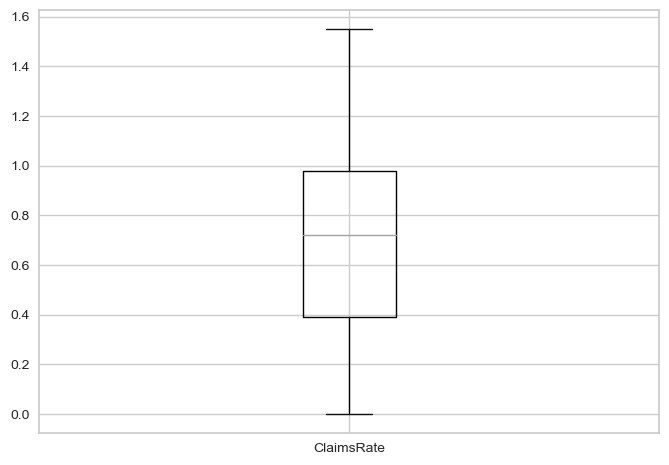

In [ ]:
df_NMV_NoOutliersClaimsRate.boxplot(column=['ClaimsRate']);

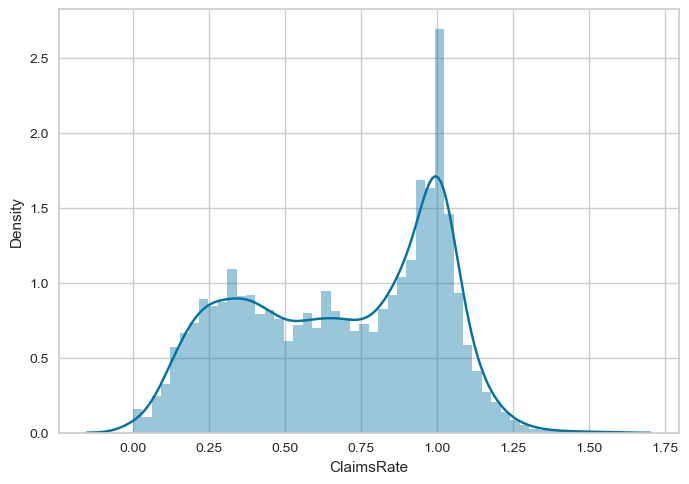

In [ ]:
sns.distplot(df_NMV_NoOutliersClaimsRate['ClaimsRate'], bins=50, hist=True)
plt.show()

It is clearly observable that, if we put a mirror in this last graphics, they seem extremely similar when comparing them with the graphics obtained with `CustMonVal` variable when applying the same outliers removal steps.
In conclusion, we could drop one of these two variables, but for now we are not going to do so.

### `PremMotor`, `PremHousehold`, `PremHealth`, `PremLife` and `PremWork`

Lastly, we will study the last variables, which refer to the insurance programs' payments.

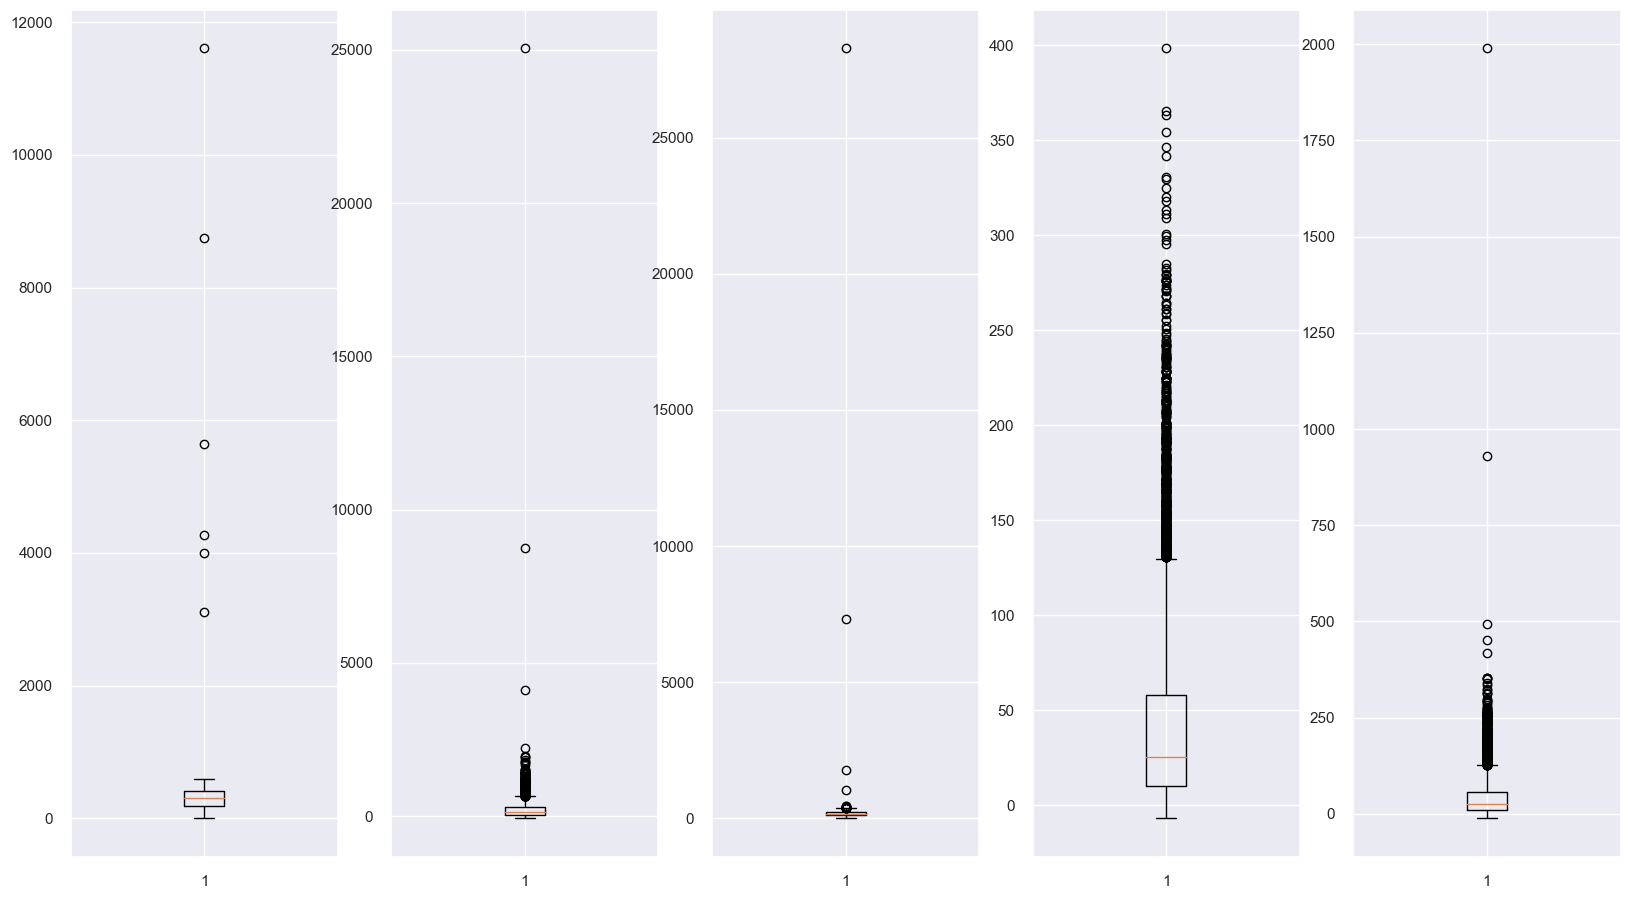

In [ ]:
sns.set()
fig, axs = plt.subplots(1,5,figsize=(20, 11))
axs[0].boxplot(df_NMV['PremMotor'])
axs[1].boxplot(df_NMV['PremHousehold'])
axs[2].boxplot(df_NMV['PremHealth'])
axs[3].boxplot(df_NMV['PremLife'])
axs[4].boxplot(df_NMV['PremWork'])
plt.show()

We are going to create a function that counts the number of outliers when considering the IQR.

In [ ]:
def count_outliers_IRQmethod(df,colName):
    """This function count the number of outliers that
    a variable has. We will consider as outliers those
    values which are below Q1 - 1.5IQR and those which
    are above Q3 + 1.5IQR.
    ---
    VARIABLES:
    1) df: Dataframe which have the column to analyze.
    2) colName: Name of the variable to count his outliers
    ---
    OUTCOME:
    1.- count: Number of outliers
    2.- df_outliers: dataframe which will have the rows with the outliers
    3.- df_without_outliers: dataframe df but without rows with outliers"""
    Q1 = df[colName].quantile(0.25)
    Q3 = df[colName].quantile(0.75)
    IQR = Q3 - Q1
    lower_IQR = Q1 - 1.5 * IQR
    upper_IQR = Q3 + 1.5 * IQR
    df_outliers = df[ (df[colName]<lower_IQR) | (df[colName]>upper_IQR) ]
    count = df_outliers.shape[0]
    df_without_outliers = df[ (df[colName]>=lower_IQR) & (df[colName]<=upper_IQR) ]
    return count,df_outliers,df_without_outliers


First, we will check the proportion of missing values in each of these variables

In [ ]:
count_PremMotor, df_NMV_PremMotor_Ou, df_NMV_PremMotor_NoOu = count_outliers_IRQmethod(df_NMV,'PremMotor')
count_PremHousehold, df_NMV_PremHousehold_Ou, df_NMV_PremHousehold_NoOu = count_outliers_IRQmethod(df_NMV,'PremHousehold')
count_PremHealth, df_NMV_PremHealth_Ou, df_NMV_PremHealth_NoOu = count_outliers_IRQmethod(df_NMV,'PremHealth')
count_PremLife, df_NMV_PremLife_Ou, df_NMV_PremLife_NoOu = count_outliers_IRQmethod(df_NMV,'PremLife')
count_PremWork, df_NMV_PremWork_Ou, df_NMV_PremWork_NoOu = count_outliers_IRQmethod(df_NMV,'PremWork')

print('Missing values in PremMotor: ',(count_PremMotor/df_NMV.shape[0])*100,'%')
print('Missing values in PremHousehold: ',(count_PremHousehold/df_NMV.shape[0])*100,'%')
print('Missing values in PremHealth: ',(count_PremHealth/df_NMV.shape[0])*100,'%')
print('Missing values in PremLife: ',(count_PremLife/df_NMV.shape[0])*100,'%')
print('Missing values in PremWork: ',(count_PremWork/df_NMV.shape[0])*100,'%')

Missing values in PremMotor:  0.06009615384615385 %
Missing values in PremHousehold:  5.949519230769231 %
Missing values in PremHealth:  0.26041666666666663 %
Missing values in PremLife:  6.079727564102564 %
Missing values in PremWork:  6.159855769230769 %


In `PremMotor` and in `PremHealth` we have few outliers. We can fix an upper bound to those values.
In `PremHousehold`, `PremLife` and `PremWork`, more than 5% of the data present outliers.
Looking at the boxplots, `PremHousehold` present 3 very high outliers (above 4000) and `PremWork` 2 very high values (above 500).
For `PremLife` we will check the histogram.

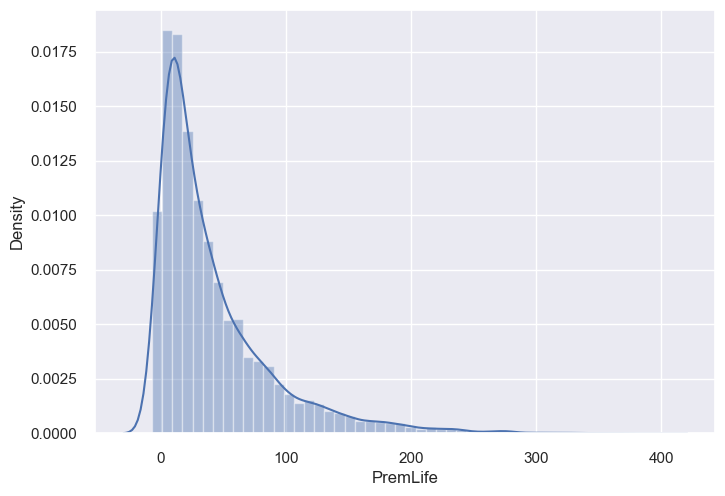

In [ ]:
sns.distplot(df_NMV['PremLife'], bins=50, hist=True)
plt.show()

In the histogram we can infer that the outliers in `PremLife` are because the nature of the variable. It can be seen that the bins diminish their height in a smooth way, so it can be explained by reality rather than by human errors when uploading the data.

---

Now, the idea that is going  to be applied for each variable is to delete all the rows that have very extreme outliers. The extreme outliers are those values who are either above Q3 + 3IQR or below Q1 - 3IQR. Because the nature of our data, some of the extreme outliers have a coherent explanation of their occurence. Thus, and having the commented into account, we will delete all rows that, in at least one of these variables: `PremMotor`, `PremHousehold`, `PremHealth`, `PremLife` and `PremWork`, have not extreme outliers, but what we will define here as very extreme outliers. We will consider very extreme outliers those values who are below Q1 - 6IQR or above Q3 + 6IQR.

In [ ]:
# Function that delete that we define as very extreme outliers
def very_extreme_outliers_IRQmethod(df,colName):
    """This function delete those rows who have very extreme
    outliers in the variable into consideration. We will
    consider as very extreme outliers those values that are below
    Q1 - 6IQR and those which are above Q3 + 6IQR.
    ---
    VARIABLES:
    1) df: Dataframe which have the column to analyze.
    2) colName: Name of the variable to count his outliers
    ---
    OUTCOME:
    1.- count: Number of extreme outliers
    2.- df_outliers: dataframe which will have only the rows with very extreme outliers
    3.- df_without_very_extreme_outliers: the input dataframe but without rows with extreme outliers"""
    Q1 = df[colName].quantile(0.25)
    Q3 = df[colName].quantile(0.75)
    IQR = Q3 - Q1
    lower_IQR = Q1 - 6 * IQR
    upper_IQR = Q3 + 6 * IQR
    df_outliers = df[ (df[colName]<lower_IQR) | (df[colName]>upper_IQR) ]
    count = df_outliers.shape[0]
    df_without_very_extreme_outliers = df[ (df[colName]>=lower_IQR) & (df[colName]<=upper_IQR) ]
    return count,df_outliers,df_without_very_extreme_outliers

In [ ]:
count_PremMotor, df_NMV_PremMotor_Ou, df_NMV = very_extreme_outliers_IRQmethod(df_NMV,'PremMotor')
count_PremHousehold, df_NMV_PremHousehold_Ou, df_NMV = very_extreme_outliers_IRQmethod(df_NMV,'PremHousehold')
count_PremHealth, df_NMV_PremHealth_Ou, df_NMV = very_extreme_outliers_IRQmethod(df_NMV,'PremHealth')
count_PremLife, df_NMV_PremLife_Ou, df_NMV = very_extreme_outliers_IRQmethod(df_NMV,'PremLife')
count_PremWork, df_NMV_PremWork_Ou, df_NMV = very_extreme_outliers_IRQmethod(df_NMV,'PremWork')

print('Very extreme outliers in PremMotor: ',(count_PremMotor/df_NMV.shape[0])*100,'%','COUNT:',count_PremMotor)
print('Very extreme outliers in PremHousehold: ',(count_PremHousehold/df_NMV.shape[0])*100,'%','COUNT:',count_PremHousehold)
print('Very extreme outliers in PremHealth: ',(count_PremHealth/df_NMV.shape[0])*100,'%','COUNT:',count_PremHealth)
print('Very extreme outliers in PremLife: ',(count_PremLife/df_NMV.shape[0])*100,'%','COUNT:',count_PremLife)
print('Very extreme outliers in PremWork: ',(count_PremWork/df_NMV.shape[0])*100,'%','COUNT:',count_PremWork)

Very extreme outliers in PremMotor:  0.06029544769369913 % COUNT: 6
Very extreme outliers in PremHousehold:  0.10049241282283188 % COUNT: 10
Very extreme outliers in PremHealth:  0.020098482564566377 % COUNT: 2
Very extreme outliers in PremLife:  0.05024620641141594 % COUNT: 5
Very extreme outliers in PremWork:  0.10049241282283188 % COUNT: 10


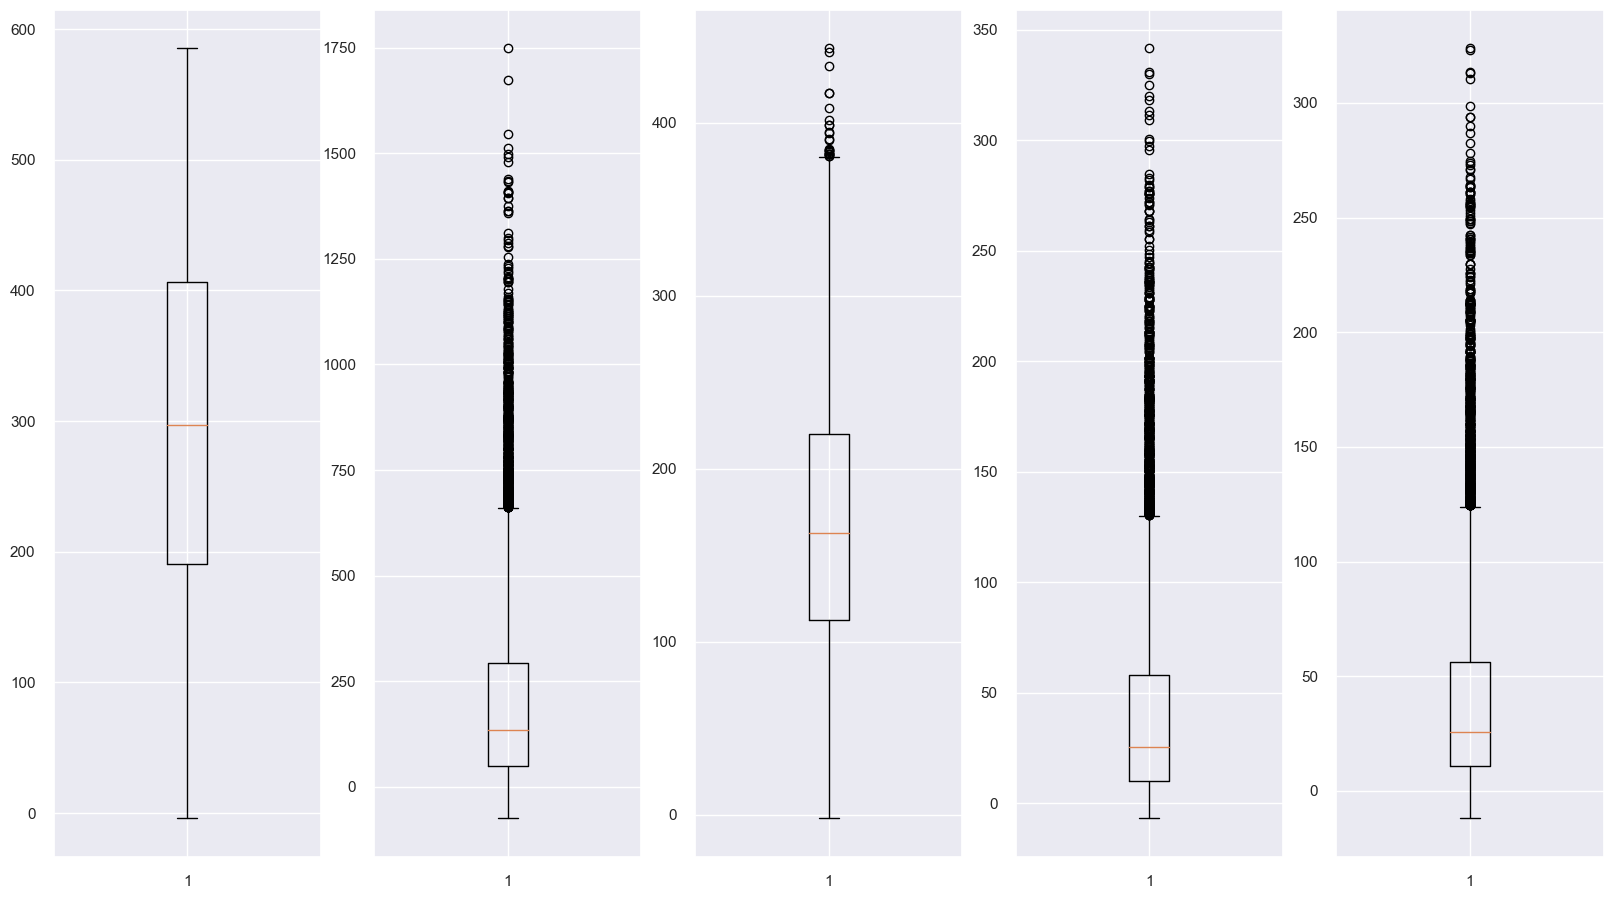

In [ ]:
sns.set()
fig, axs = plt.subplots(1,5,figsize=(20, 11))
axs[0].boxplot(df_NMV['PremMotor'])
axs[1].boxplot(df_NMV['PremHousehold'])
axs[2].boxplot(df_NMV['PremHealth'])
axs[3].boxplot(df_NMV['PremLife'])
axs[4].boxplot(df_NMV['PremWork'])
plt.show()

With what we have just done, it can be seen that the range of the variables diminish its distances. They still have a lot of outliers that need to be treated in some way, maybe dropping them or maybe defining an upper and lower bounds.
Just to being sure, we will check that the rows commented before were correctly deleted by the defined function.

In [ ]:
# Assessing that the 3 high values of PremHousehold and the 2 of
# PremWork were deleted by the function
print('Rows of PremHousehold that are above 4000: ', df_NMV[ df_NMV['PremHousehold']>4000 ].shape[0])
print('Rows of PremWork that are above 500: ', df_NMV[ df_NMV['PremWork']>500 ].shape[0])

Rows of PremHousehold that are above 4000:  0
Rows of PremWork that are above 500:  0


The next function will set an upper or a lower bound to a variable  called by the user. This is to set a range of values where a variable can move and not get a lot of skew in the data.

In [ ]:
def SetBoundary(dataframe, colName, boundaryType, boundary):
    """The function will set an upper or lower boundary to
    a variable in the data. All those values that were above
    (if upper boundary) or below (if lower boundary) will be
    changed to the value set as the boundary
    ---
    VARIABLES:
    1) dataframe: Dataframe which have the column to set a boundary.
    2) colName: Name of the variable to be bounded
    3) boundaryType: string that must be one of these two options:
        >> 'lower': indicate a lower boundary, so all values in the
        variable that were below, will be changed to the boundary
        value given by the user
        >> 'upper': indicate an upper boundary, so all values in the
        variable that were above, will be changed to the boundary
        value given by the user
    4) boundary: value that will be set as the boundary
    ---
    OUTCOME:
    1.- df: dataframe with the applied boundary
    2.- count: Number of values out of the boundary """

    df = dataframe.copy()
    if (boundaryType == 'upper'):
        count = (df[colName]>boundary).sum()
        df[colName].mask(df[colName] > boundary, boundary, inplace=True)
        return df, count
    elif (boundaryType == 'lower'):
        count = (df[colName]<boundary).sum()
        df[colName].mask(df[colName] < boundary, boundary, inplace=True)
        return df, count


The idea of using SetBoundary fuction is: for the variables `PremMotor`, `PremHousehold`, `PremHealth`, `PremLife` and `PremWork`, first, we will check how many rows have extreme outliers. Then, if the proportion of those rows are below 1.5%, we will apply an upper and/or a lower bound to the variable.

In [ ]:
variables = ['PremMotor', 'PremHousehold', 'PremHealth', 'PremLife', 'PremWork']
num_rows = df_NMV.shape[0]

for var in variables:
    Q1 = df_NMV[var].quantile(0.25)
    Q3 = df_NMV[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_IQR = Q1 - 3 * IQR
    upper_IQR = Q3 + 3 * IQR
    df_extreme_outliers_up =  df_NMV[ df_NMV[var]>upper_IQR ]
    df_extreme_outliers_down = df_NMV[ df_NMV[var]<lower_IQR ]
    count_up = df_extreme_outliers_up.shape[0]
    count_down = df_extreme_outliers_down.shape[0]
    print("\n-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.")
    print("     ",var)
    print("-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.\n")
    print("Upper extreme outliers: ", count_up)
    print("Proportion upper extreme outliers: ", (count_up/num_rows)*100, "%\n")
    print("Lower extreme outliers: ", count_down)
    print("Proportion lower extreme outliers: ", (count_down/num_rows)*100, "%\n")
    print("Proportion total extreme outliers: ",((count_up+count_down)/num_rows)*100, "%")


-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.
      PremMotor
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.

Upper extreme outliers:  0
Proportion upper extreme outliers:  0.0 %

Lower extreme outliers:  0
Proportion lower extreme outliers:  0.0 %

Proportion total extreme outliers:  0.0 %

-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.
      PremHousehold
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.

Upper extreme outliers:  101
Proportion upper extreme outliers:  1.0149733695106018 %

Lower extreme outliers:  0
Proportion lower extreme outliers:  0.0 %

Proportion total extreme outliers:  1.0149733695106018 %

-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.
      PremHealth
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.

Upper extreme outliers:  0
Proportion upper extreme outliers:  0.0 %

Lower extreme outliers:  0
Proportion lower extreme outliers:  0.0 %

Proportion total extreme outliers:  0.0 %

-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.
      PremLife
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.

Upper extreme outliers:  136
Proportion upper extreme outliers:  1.366696814390513

We can see that the only variables that do not have extreme values are `PremMotor` and `PremHealth`.
The other variables present very few extreme outliers, and all of them are upper the considered boundary, which is Q3 + 3IQR

In [ ]:
variables = ['PremHousehold', 'PremLife', 'PremWork']
for var in variables:
    Q1 = df_NMV[var].quantile(0.25)
    Q3 = df_NMV[var].quantile(0.75)
    IQR = Q3 - Q1
    upper_boundary = Q3 + (3 * IQR)
    df_NMV, count = SetBoundary(dataframe = df_NMV, colName = var, boundaryType = 'upper', boundary = upper_boundary)
    print("The variable ",var,"had ",count,"changes")

The variable  PremHousehold had  101 changes
The variable  PremLife had  136 changes
The variable  PremWork had  153 changes


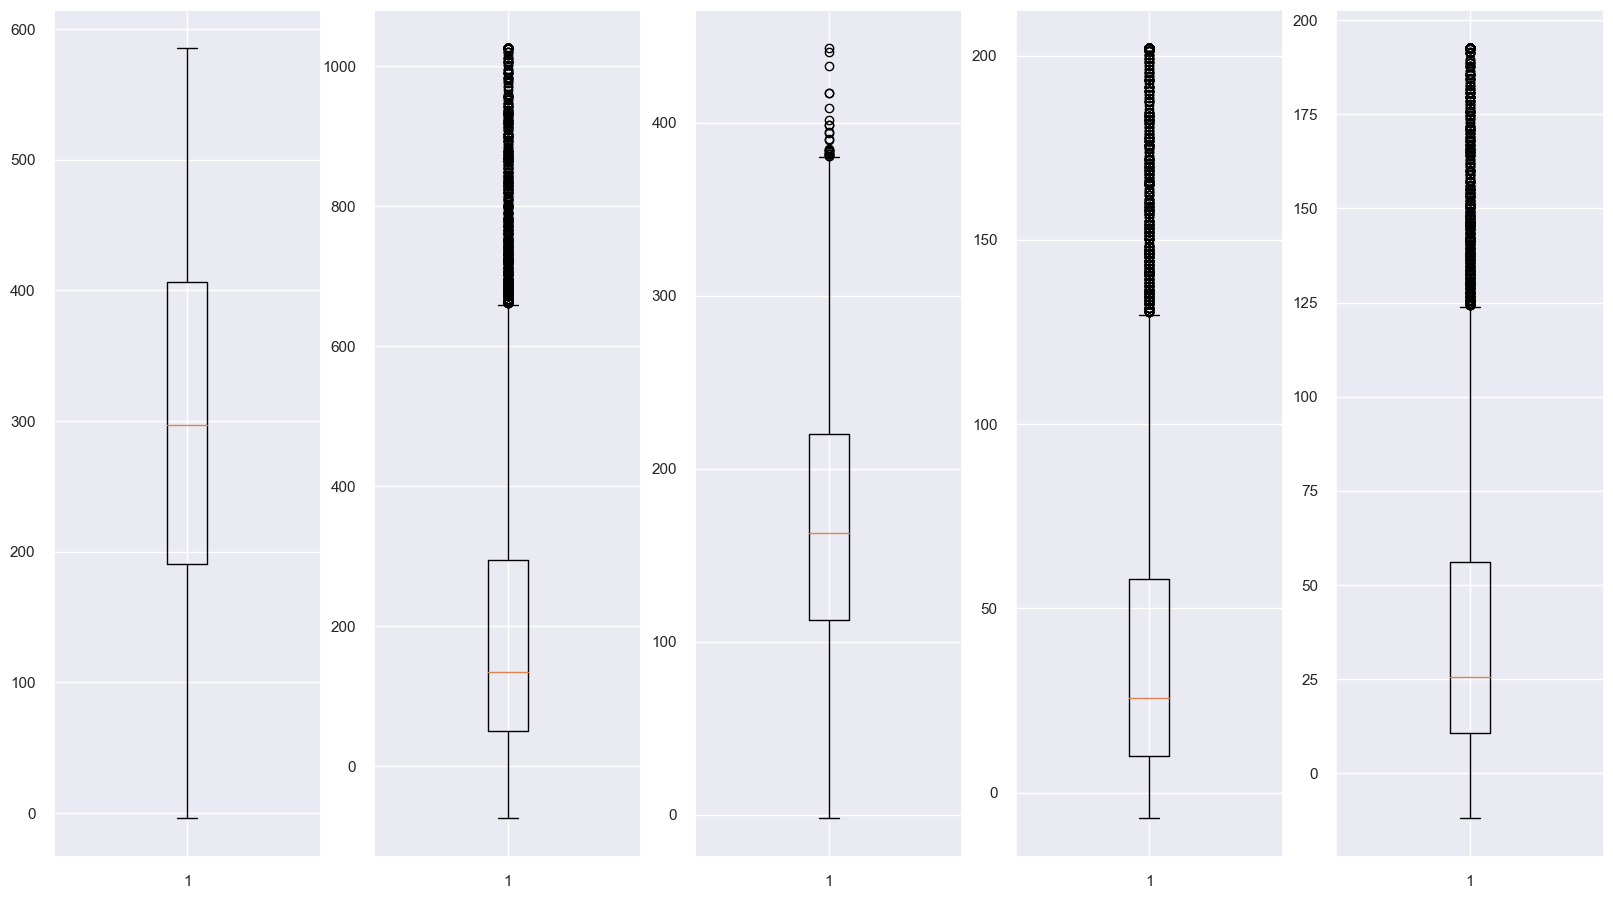

In [ ]:
sns.set()
fig, axs = plt.subplots(1,5,figsize=(20, 11))
axs[0].boxplot(df_NMV['PremMotor'])
axs[1].boxplot(df_NMV['PremHousehold'])
axs[2].boxplot(df_NMV['PremHealth'])
axs[3].boxplot(df_NMV['PremLife'])
axs[4].boxplot(df_NMV['PremWork'])
plt.show()

Now, we are going to delete 5 rows:
* one row because `FirstPolYear` has a value above 2016
* one row because `BirthYear` has an outlier below 1900
* two rows because `MonthSal` has two very high values (above 10000) that can skew the data
* one because `CustMonVal` has a very low value, below -150000

In [ ]:
df_treat_outlier = pd.concat( [df_FirstPolYear_treat_outlier,df_BirthYear_treat_outlier,df_MonthSal_treat_outlier,df_CustMonVal_treat_outlier] )
df_treat_outlier_CustID = df_treat_outlier['CustID']
df_NMV = df_NMV[~df_NMV['CustID'].isin(df_treat_outlier_CustID) ]

## 3.3 Missing values <a name="MissingVal"></a>

Finally, we will impute the missing values that we have in the data

In [ ]:
df_complete = pd.concat( [df_NMV,df_MV] )

### 3.3.1 Numerical variables <a name="MissValNumVar"></a>

It is going to be applied the KNNImputer, which can only be applied to numerical variables.

In [ ]:
# KNNImputer
imputer = KNNImputer(n_neighbors=5, weights="uniform")
df_complete[metric_features] = imputer.fit_transform(df_complete[metric_features])

In [ ]:
# See rows with NaNs imputed
df_MV_index = df_MV['CustID']
df_complete_imputated_rows = df_complete[ df_complete['CustID'].isin(df_MV_index) ][metric_features]

Now we will see that the variables `FirstPolYear` and `BirthYear` maintained its integer variable type

In [ ]:
df_complete_imputated_rows['FirstPolYear'].unique()

array([1977. , 1983. , 1979. , 1996. , 1993. , 1990. , 1988.6, 1997. ,
       1992. , 1987. , 1995. , 1980. , 1975. , 1984. , 1976. , 1998. ,
       1988. , 1982.2, 1986. , 1974. , 1982. , 1981. , 1989. , 1991. ,
       1994. , 1978. , 1989.2, 1985.2, 1987.6, 1981.6, 1985.6, 1985. ,
       1985.4, 1987.4, 1986.6, 1981.4, 1986.4, 1980.6, 1985.8, 1989.4,
       1988.8])

In [ ]:
df_complete_imputated_rows['BirthYear'].unique()

array([1958. , 1977. , 1976. , 1990. , 1984. , 1978. , 1955. , 1963. ,
       1967. , 1947. , 1975. , 1986. , 1992. , 1994. , 1987. , 1960. ,
       1959. , 1995. , 1949. , 1942. , 1981. , 1952. , 1953. , 1945. ,
       1965. , 1983. , 1943. , 1988. , 1973. , 1969. , 1951. , 1956. ,
       1968. , 1997. , 1946. , 1996. , 1964. , 1938. , 1994.2, 1972. ,
       1968.6, 1982. , 1961. , 1989. , 1979. , 1962. , 1950. , 1939. ,
       1955.6, 1954. , 1951.2, 1985. , 1943.6, 1974. , 1973.6, 1944. ,
       1970. , 1980. , 1969.2, 1993. , 1941. , 1966. , 1940. , 1999. ,
       1982.8, 1960.8, 1957. , 1991. , 1948. , 1943.4, 2000. , 1957.8,
       1998. , 1971.2, 1984.4, 1971. , 1937. ])

Some of the values have decimals. We are going to round them to have only integer values.

In [ ]:
df_complete['FirstPolYear'] = df_complete['FirstPolYear'].round()
df_complete['BirthYear'] = df_complete['BirthYear'].round()

In [ ]:
df_complete_imputed_rows_rounded = df_complete[ df_complete['CustID'].isin(df_MV_index) ][metric_features]
print( df_complete_imputed_rows_rounded['FirstPolYear'].unique() )
print( df_complete_imputed_rows_rounded['BirthYear'].unique() )

[1977. 1983. 1979. 1996. 1993. 1990. 1989. 1997. 1992. 1987. 1995. 1980.
 1975. 1984. 1976. 1998. 1988. 1982. 1986. 1974. 1981. 1991. 1994. 1978.
 1985.]
[1958. 1977. 1976. 1990. 1984. 1978. 1955. 1963. 1967. 1947. 1975. 1986.
 1992. 1994. 1987. 1960. 1959. 1995. 1949. 1942. 1981. 1952. 1953. 1945.
 1965. 1983. 1943. 1988. 1973. 1969. 1951. 1956. 1968. 1997. 1946. 1996.
 1964. 1938. 1972. 1982. 1961. 1989. 1979. 1962. 1950. 1939. 1954. 1985.
 1944. 1974. 1970. 1980. 1993. 1941. 1966. 1940. 1999. 1957. 1991. 1948.
 2000. 1998. 1971. 1937.]


In [ ]:
#Checking that we do not have more nan in numerical variables
df_complete.isna().sum()

CustID            0
FirstPolYear      0
BirthYear         0
EducDeg          17
MonthSal          0
GeoLivArea        1
Children         21
CustMonVal        0
ClaimsRate        0
PremMotor         0
PremHousehold     0
PremHealth        0
PremLife          0
PremWork          0
dtype: int64

### 3.3.2 Categorical variables <a name="MissValCatVar"></a>

As it can be seen, the data have very few observations with missing values in categorical data. For that reason, we are going to fill these missing data with the mode.

In [ ]:
df_MV_cat = df_complete[ df_complete.isnull().any(axis=1) ] #to look for imputed rows

In [ ]:
# Imputate with the mode
imputer = SimpleImputer(strategy = 'most_frequent')
df_complete[non_metric_features] = imputer.fit_transform(df_complete[non_metric_features])

In [ ]:
# See rows with NaNs imputed
df_MV_index = df_MV_cat['CustID']
df_complete_imputated_rows = df_complete[ df_complete['CustID'].isin(df_MV_index) ][non_metric_features]
df_complete_imputated_rows

EducDeg GeoLivArea Children
296            b'4 - PhD'        4.0      1.0
619        b'3 - BSc/MSc'        2.0      1.0
772    b'2 - High School'        2.0      1.0
896        b'3 - BSc/MSc'        1.0      1.0
1707       b'3 - BSc/MSc'        4.0      0.0
2227       b'3 - BSc/MSc'        2.0      1.0
2362   b'2 - High School'        2.0      1.0
2449       b'3 - BSc/MSc'        4.0      0.0
2671   b'2 - High School'        2.0      1.0
2703         b'1 - Basic'        2.0      1.0
2728       b'3 - BSc/MSc'        2.0      0.0
2770       b'3 - BSc/MSc'        4.0      1.0
2926       b'3 - BSc/MSc'        2.0      1.0
3056       b'3 - BSc/MSc'        1.0      1.0
3177       b'3 - BSc/MSc'        2.0      1.0
3280   b'2 - High School'        2.0      1.0
3684         b'1 - Basic'        2.0      1.0
4423       b'3 - BSc/MSc'        1.0      1.0
4728         b'1 - Basic'        2.0      1.0
5437       b'3 - BSc/MSc'        2.0      1.0
6471   b'2 - High School'        2.0      1.0
6535       b'3 - BSc/MSc'        3.0      1.0
6560       b'3 - BSc/MSc'        4.0      1.0
6863       b'3 - BSc/MSc'        2.0      1.0
7321       b'3 - BSc/MSc'        4.0      0.0
7470       b'3 - BSc/MSc'        4.0      0.0
7474           b'4 - PhD'        2.0      1.0
8018       b'3 - BSc/MSc'        2.0      1.0
8081       b'3 - BSc/MSc'        4.0      1.0
8173       b'3 - BSc/MSc'        1.0      0.0
8303       b'3 - BSc/MSc'        3.0      0.0
8374         b'1 - Basic'        2.0      1.0
8419       b'3 - BSc/MSc'        2.0      1.0
9136       b'3 - BSc/MSc'        1.0      1.0
9312       b'3 - BSc/MSc'        1.0      1.0
9324   b'2 - High School'        2.0      1.0
9610       b'3 - BSc/MSc'        1.0      1.0
10010  b'2 - High School'        2.0      1.0

In [ ]:
#Assessing there is no more missing values
df_complete.isna().sum()

CustID           0
FirstPolYear     0
BirthYear        0
EducDeg          0
MonthSal         0
GeoLivArea       0
Children         0
CustMonVal       0
ClaimsRate       0
PremMotor        0
PremHousehold    0
PremHealth       0
PremLife         0
PremWork         0
dtype: int64

---

## 3.4 Inconsistencies <a name="inconsistencies"></a>

Now it is time to see if the values in the data are coherent with the reality.
First, let's check if there exists rows were `FirstPolYear` is less than `BirthYear`. This is because it is not possible that someone hire an insurance policy before born, but maybe it is possible that the parents buy an insurance to their baby, so we could consider the newborn as a new customer.

In [ ]:
print("Percentage of rows where FirstPolYear < BirthYear: ", ((df_complete[ df_complete['FirstPolYear']<df_complete['BirthYear'] ].shape[0])/df_complete.shape[0])*100, "%")

Percentage of rows where FirstPolYear < BirthYear:  19.288152120916628 %


Almost 20% of the data present the inconsistency just explained. Therefore, we will drop one of the columns.

In [ ]:
FPY_1 = ((df_complete[ df_complete['FirstPolYear']<=2016-18 ].shape[0])/df_complete.shape[0])*100
FPY_2 = ((df_complete[ df_complete['FirstPolYear']==2016-18 ].shape[0])/df_complete.shape[0])*100
FPY_3 = ((df_complete[ df_complete['FirstPolYear']==2016-17 ].shape[0])/df_complete.shape[0])*100
FPY_4 = ((df_complete[ df_complete['FirstPolYear']<=2016-43 ].shape[0])/df_complete.shape[0])*100
FPY_5 = ((df_complete[ df_complete['FirstPolYear']==2016-42 ].shape[0])/df_complete.shape[0])*100

print("First Policy before or in 1998: ",FPY_1,"%")
print("First Policy in 1998: ",FPY_2,"%")
print("First Policy in 1999: ",FPY_3,"%")
print("First Policy before or in 1973: ",FPY_4,"%")
print("First Policy before in 1974: ",FPY_5,"%")

First Policy before or in 1998:  100.0 %
First Policy in 1998:  1.0921501706484642 %
First Policy in 1999:  0.0 %
First Policy before or in 1973:  0.0 %
First Policy before in 1974:  1.3554363725012188 %


From the above, and assuming this variable does not have errors, we get the next conclusions:
* All the people considered in the data paid their first policy with this company before 1999. This would indicate that the person with the lowest age in the data must be equal or above 18 years old, which sound coherent with the reality
* The oldest record in the data data is from 1974.

In [ ]:
BY_1 = ((df_complete[ df_complete['BirthYear']<=2016-15 ].shape[0])/df_complete.shape[0])*100
BY_2 = ((df_complete[ df_complete['BirthYear']==2016-15 ].shape[0])/df_complete.shape[0])*100
BY_3 = ((df_complete[ df_complete['BirthYear']==2016-14 ].shape[0])/df_complete.shape[0])*100
BY_4 = ((df_complete[ df_complete['BirthYear']==2016-81 ].shape[0])/df_complete.shape[0])*100
BY_5 = ((df_complete[ df_complete['BirthYear']==2016-82 ].shape[0])/df_complete.shape[0])*100

print("Birth day before or in 2001: ",BY_1,"%")
print("Birth day in 2001 (15 years old): ",BY_2,"%")
print("Birth day in 2002 (14 years old): ",BY_3,"%")
print("Birth day in 1935 (81 years old): ",BY_4,"%")
print("Birth day in 1934 (82 years old): ",BY_5,"%")

Birth day before or in 2001:  100.0 %
Birth day in 2001 (15 years old):  0.11701608971233544 %
Birth day in 2002 (14 years old):  0.0 %
Birth day in 1935 (81 years old):  0.13651877133105803 %
Birth day in 1934 (82 years old):  0.0 %


From the above, the conclusions that we obtain are:
* All the people considered in the data have at least 15 years old.
* The 0.11% of the data are people that have 15 years old. This is the minimum age in the data. Further analysis must be done regarding this issue.
* The oldest person in the data has 81 years old. The 0.13% of the people studied have this age.

Let's see the records of the people with 17 or less years old.

In [ ]:
pd.set_option('display.max_rows', None)
display( df_complete[ df_complete['BirthYear']==2016-17 ] )
pd.reset_option('display.max_rows')

CustID  FirstPolYear  BirthYear       EducDeg  MonthSal GeoLivArea  \
186      187.0        1993.0     1999.0  b'1 - Basic'    1247.0        2.0   
480      481.0        1984.0     1999.0  b'1 - Basic'    1581.0        4.0   
526      527.0        1982.0     1999.0  b'1 - Basic'     840.0        4.0   
620      621.0        1983.0     1999.0  b'1 - Basic'     578.0        1.0   
1063    1064.0        1996.0     1999.0  b'1 - Basic'     974.0        3.0   
1446    1447.0        1997.0     1999.0  b'1 - Basic'     388.0        4.0   
1471    1472.0        1980.0     1999.0  b'1 - Basic'    1179.0        4.0   
1492    1493.0        1981.0     1999.0  b'1 - Basic'     954.0        3.0   
1761    1762.0        1992.0     1999.0  b'1 - Basic'    1119.0        4.0   
1795    1796.0        1978.0     1999.0  b'1 - Basic'    1487.0        1.0   
2143    2144.0        1993.0     1999.0  b'1 - Basic'    1266.0        2.0   
2489    2490.0        1994.0     1999.0  b'1 - Basic'     932.0        1.0   
2595    2596.0        1976.0     1999.0  b'1 - Basic'    1781.0        1.0   
2687    2688.0        1981.0     1999.0  b'1 - Basic'    1891.0        4.0   
2886    2887.0        1992.0     1999.0  b'1 - Basic'    1184.0        1.0   
3050    3051.0        1992.0     1999.0  b'1 - Basic'    1439.0        4.0   
3186    3187.0        1980.0     1999.0  b'1 - Basic'     346.0        3.0   
3307    3308.0        1980.0     1999.0  b'1 - Basic'     615.0        1.0   
3791    3792.0        1989.0     1999.0  b'1 - Basic'     915.0        1.0   
4162    4163.0        1996.0     1999.0  b'1 - Basic'    1016.0        1.0   
4316    4317.0        1998.0     1999.0  b'1 - Basic'     876.0        2.0   
4330    4331.0        1991.0     1999.0  b'1 - Basic'    1003.0        4.0   
4350    4351.0        1982.0     1999.0  b'1 - Basic'     561.0        1.0   
4498    4499.0        1978.0     1999.0  b'1 - Basic'     335.0        2.0   
4977    4978.0        1994.0     1999.0  b'1 - Basic'    1294.0        1.0   
5015    5016.0        1984.0     1999.0  b'1 - Basic'     950.0        3.0   
5064    5065.0        1997.0     1999.0  b'1 - Basic'     746.0        4.0   
5081    5082.0        1989.0     1999.0  b'1 - Basic'    1406.0        1.0   
5126    5127.0        1990.0     1999.0  b'1 - Basic'    1622.0        1.0   
5146    5147.0        1991.0     1999.0  b'1 - Basic'     843.0        4.0   
5199    5200.0        1993.0     1999.0  b'1 - Basic'     460.0        3.0   
5221    5222.0        1983.0     1999.0  b'1 - Basic'     374.0        4.0   
5508    5509.0        1996.0     1999.0  b'1 - Basic'    1305.0        4.0   
5577    5578.0        1988.0     1999.0  b'1 - Basic'     982.0        4.0   
5584    5585.0        1984.0     1999.0  b'1 - Basic'    1029.0        4.0   
5646    5647.0        1994.0     1999.0  b'1 - Basic'    1497.0        4.0   
5671    5672.0        1976.0     1999.0  b'1 - Basic'    1097.0        4.0   
6561    6562.0        1978.0     1999.0  b'1 - Basic'    1478.0        3.0   
6683    6684.0        1992.0     1999.0  b'1 - Basic'     789.0        4.0   
6711    6712.0        1988.0     1999.0  b'1 - Basic'     913.0        4.0   
6858    6859.0        1978.0     1999.0  b'1 - Basic'    1245.0        4.0   
6892    6893.0        1981.0     1999.0  b'1 - Basic'    1222.0        4.0   
7232    7233.0        1982.0     1999.0  b'1 - Basic'     665.0        4.0   
7395    7396.0        1996.0     1999.0  b'1 - Basic'     906.0        4.0   
7410    7411.0        1994.0     1999.0  b'1 - Basic'    1086.0        1.0   
7437    7438.0        1989.0     1999.0  b'1 - Basic'    1201.0        4.0   
7597    7598.0        1986.0     1999.0  b'1 - Basic'    1116.0        3.0   
7927    7928.0        1990.0     1999.0  b'1 - Basic'     786.0        3.0   
8333    8334.0        1981.0     1999.0  b'1 - Basic'    1174.0        1.0   
8543    8544.0        1985.0     1999.0  b'1 - Basic'     965.0        2.0   
8575    8576.0        1975.0  

We can onserve that there are a lot of rows where the year of the first policy is a lot of years before the birth year. Moreover, it seems quite impossible that all of them hired and pay the five insurance policies.
In result, for the explained above, we will drop `BirthYear` because this variable seems to not be accurate with the reality.
This does not imply that `FirstPolYear` do not have errors, but we cannot find any justification to drop this variable.

In [ ]:
df_complete.drop('BirthYear', axis=1, inplace=True)

Another incoherence could be that the quantity paid for the insurance programs surpass for a lot the monthly salary. To check it, we must remember that the premiums are in yearly terms, while the salary value is per month. Therefore, to look for the proportion of people that pay more money for insurance programs than what they earn yearly, we will multiply per 12 the salary variable.

In [ ]:
sum( ( (df_complete[ "MonthSal" ]*12) - (df_complete[ ['PremMotor', 'PremHousehold', 'PremHealth', 'PremLife', 'PremWork'] ].sum(axis=1)) ) < 0 )

0

Therefore, the data has consistency in this issue.

---

Finally, we will make some visualizations of the preprocessed data and do a final inspection of the data

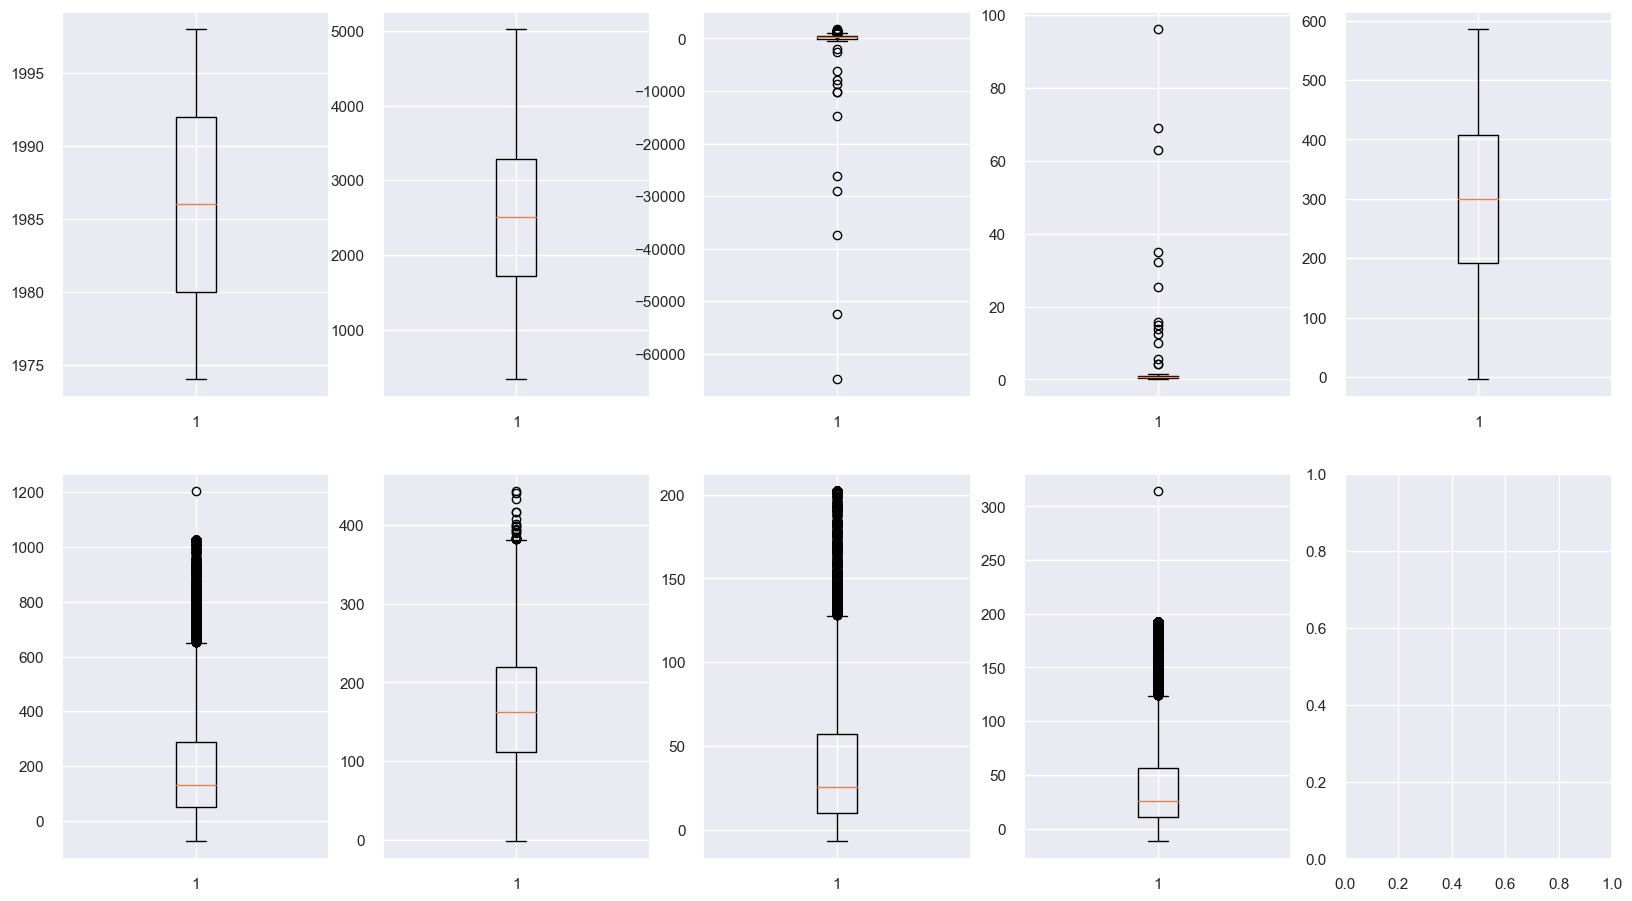

In [ ]:
sns.set()
fig, axs = plt.subplots(2,5,figsize=(20, 11))
axs[0,0].boxplot(df_complete['FirstPolYear'])
axs[0,1].boxplot(df_complete['MonthSal'])
axs[0,2].boxplot(df_complete['CustMonVal'])
axs[0,3].boxplot(df_complete['ClaimsRate'])
axs[0,4].boxplot(df_complete['PremMotor'])

axs[1,0].boxplot(df_complete['PremHousehold'])
axs[1,1].boxplot(df_complete['PremHealth'])
axs[1,2].boxplot(df_complete['PremLife'])
axs[1,3].boxplot(df_complete['PremWork'])
plt.show()

From the graphics above, we have one extreme outlier in `PremWork` and possibly one in `PremHousehold`. Let's cap those values with the same value applied before.

In [ ]:
df_complete.replace(df_complete['PremWork'].max(), df_NMV['PremWork'].max(), inplace=True)
df_complete.replace(df_complete['PremHousehold'].max(), df_NMV['PremHousehold'].max(), inplace=True)

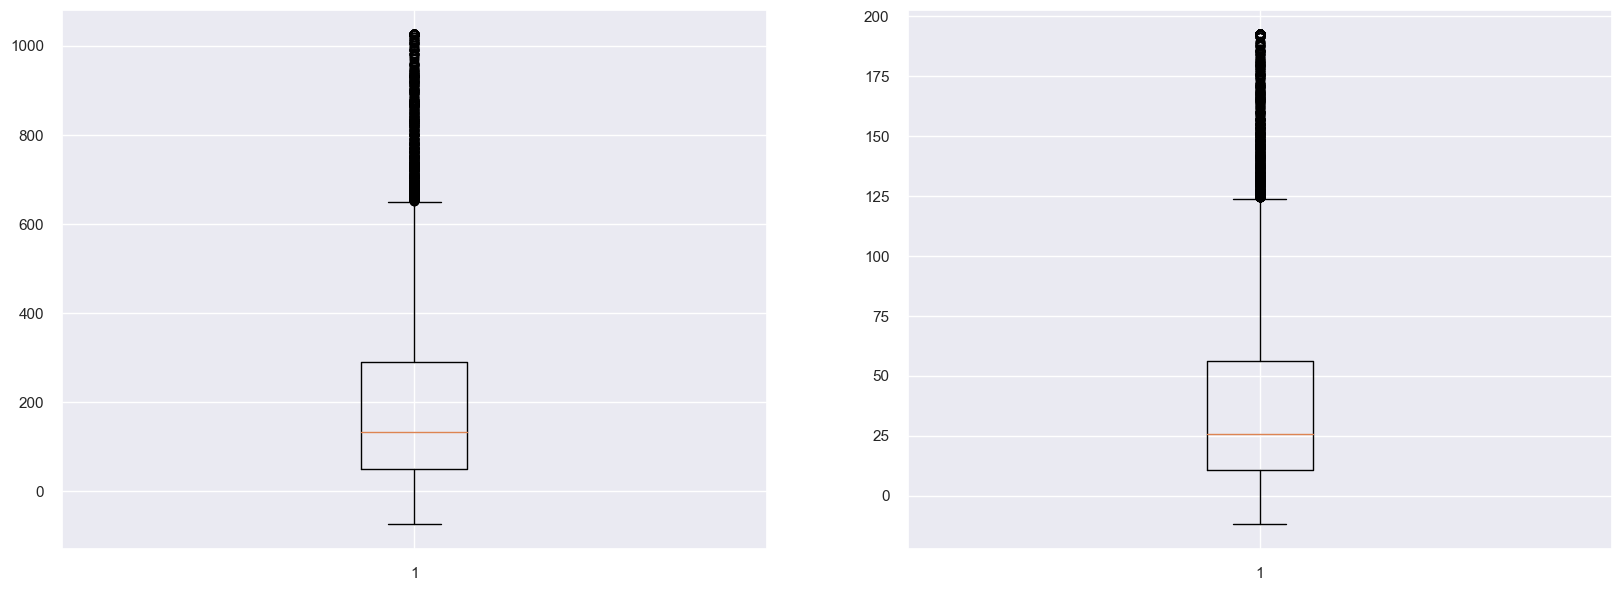

In [ ]:
#Assessoring the changes are done
sns.set()
fig, axs = plt.subplots(1,2,figsize=(20, 7))
axs[0].boxplot(df_complete['PremHousehold'])
axs[1].boxplot(df_complete['PremWork'])
plt.show()

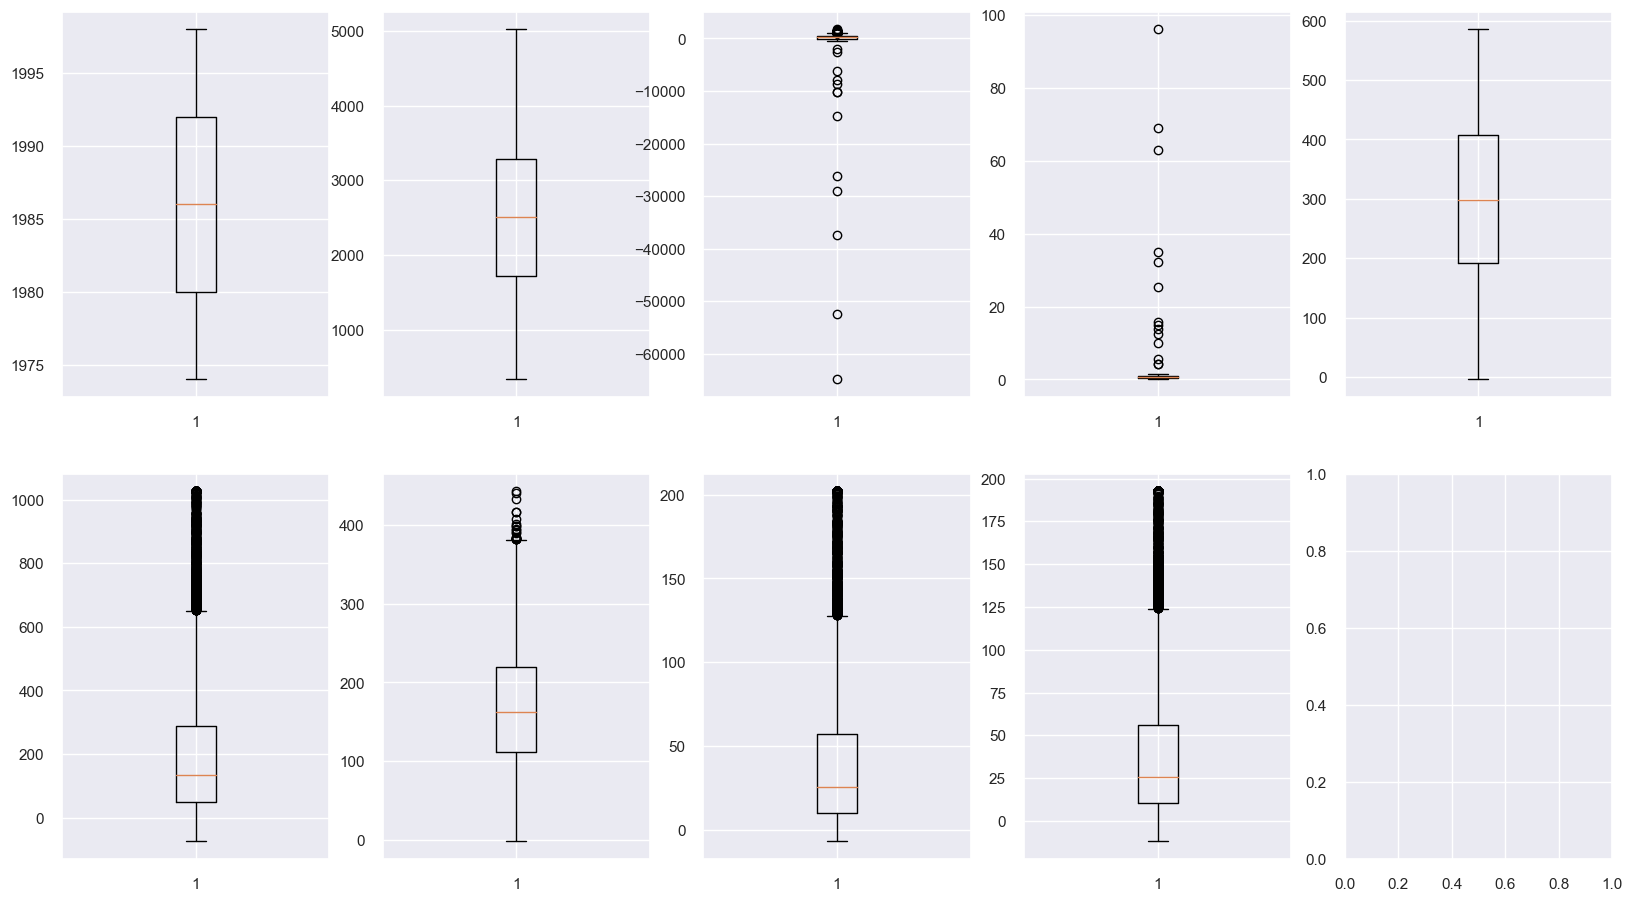

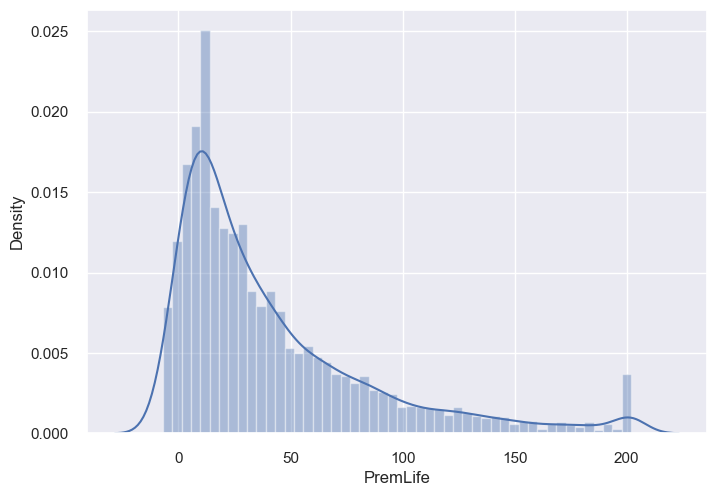

In [ ]:
sns.set()
fig, axs = plt.subplots(2,5,figsize=(20, 11))
axs[0,0].boxplot(df_complete['FirstPolYear'])
axs[0,1].boxplot(df_complete['MonthSal'])
axs[0,2].boxplot(df_complete['CustMonVal'])
axs[0,3].boxplot(df_complete['ClaimsRate'])
axs[0,4].boxplot(df_complete['PremMotor'])

axs[1,0].boxplot(df_complete['PremHousehold'])
axs[1,1].boxplot(df_complete['PremHealth'])
axs[1,2].boxplot(df_complete['PremLife'])
axs[1,3].boxplot(df_complete['PremWork'])
plt.show()

sns.distplot(df_NMV['PremLife'], bins=50, hist=True)
plt.show()

In [ ]:
df_complete.columns

Index(['CustID', 'FirstPolYear', 'EducDeg', 'MonthSal', 'GeoLivArea',
       'Children', 'CustMonVal', 'ClaimsRate', 'PremMotor', 'PremHousehold',
       'PremHealth', 'PremLife', 'PremWork'],
      dtype='object')

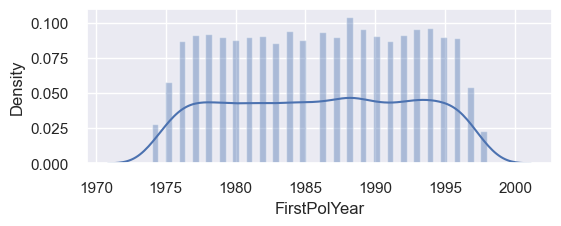

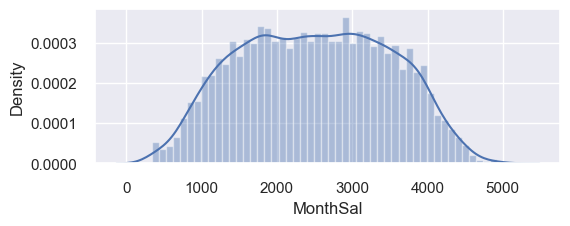

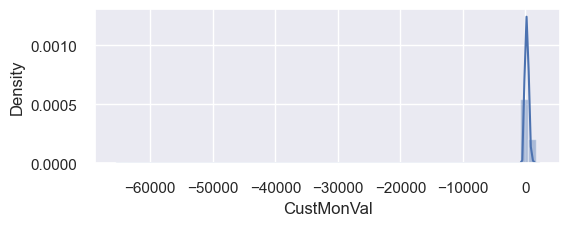

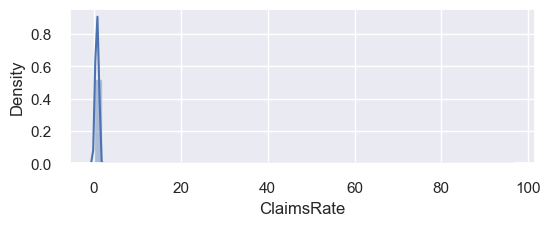

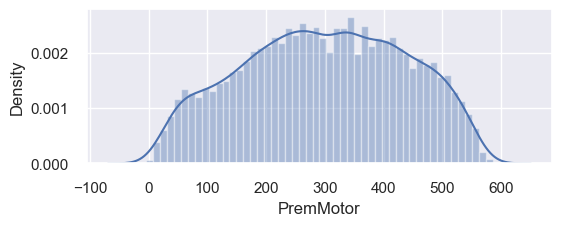

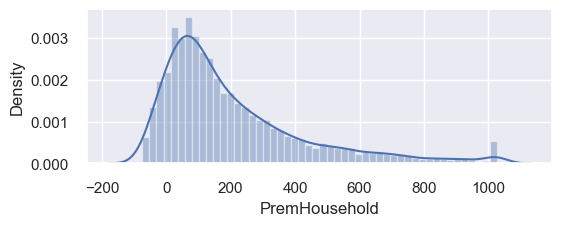

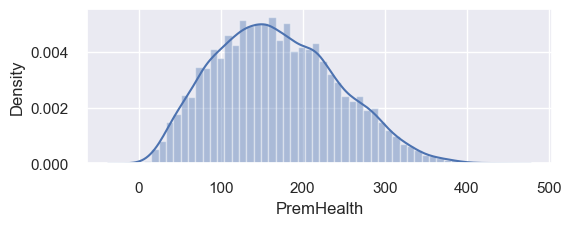

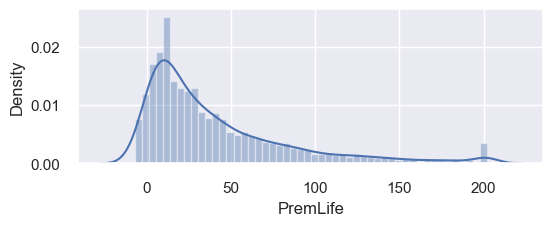

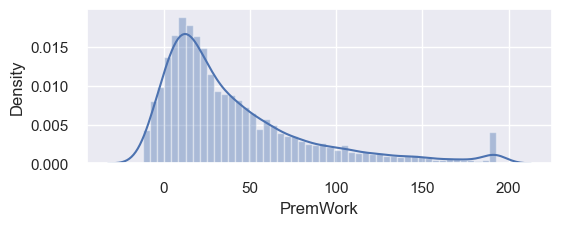

In [ ]:
sns.set()
fig, axs = plt.subplots(1,1,figsize=(6, 2))
sns.distplot(df_complete['FirstPolYear'], bins=50, hist=True)
plt.show()

fig, axs = plt.subplots(1,1,figsize=(6, 2))
sns.distplot(df_complete['MonthSal'], bins=50, hist=True)
plt.show()

fig, axs = plt.subplots(1,1,figsize=(6, 2))
sns.distplot(df_complete['CustMonVal'], bins=50, hist=True)
plt.show()

fig, axs = plt.subplots(1,1,figsize=(6, 2))
sns.distplot(df_complete['ClaimsRate'], bins=50, hist=True)
plt.show()

fig, axs = plt.subplots(1,1,figsize=(6, 2))
sns.distplot(df_complete['PremMotor'], bins=50, hist=True)
plt.show()

fig, axs = plt.subplots(1,1,figsize=(6, 2))
sns.distplot(df_complete['PremHousehold'], bins=50, hist=True)
plt.show()

fig, axs = plt.subplots(1,1,figsize=(6, 2))
sns.distplot(df_complete['PremHealth'], bins=50, hist=True)
plt.show()

fig, axs = plt.subplots(1,1,figsize=(6, 2))
sns.distplot(df_complete['PremLife'], bins=50, hist=True)
plt.show()

fig, axs = plt.subplots(1,1,figsize=(6, 2))
sns.distplot(df_complete['PremWork'], bins=50, hist=True)
plt.show()

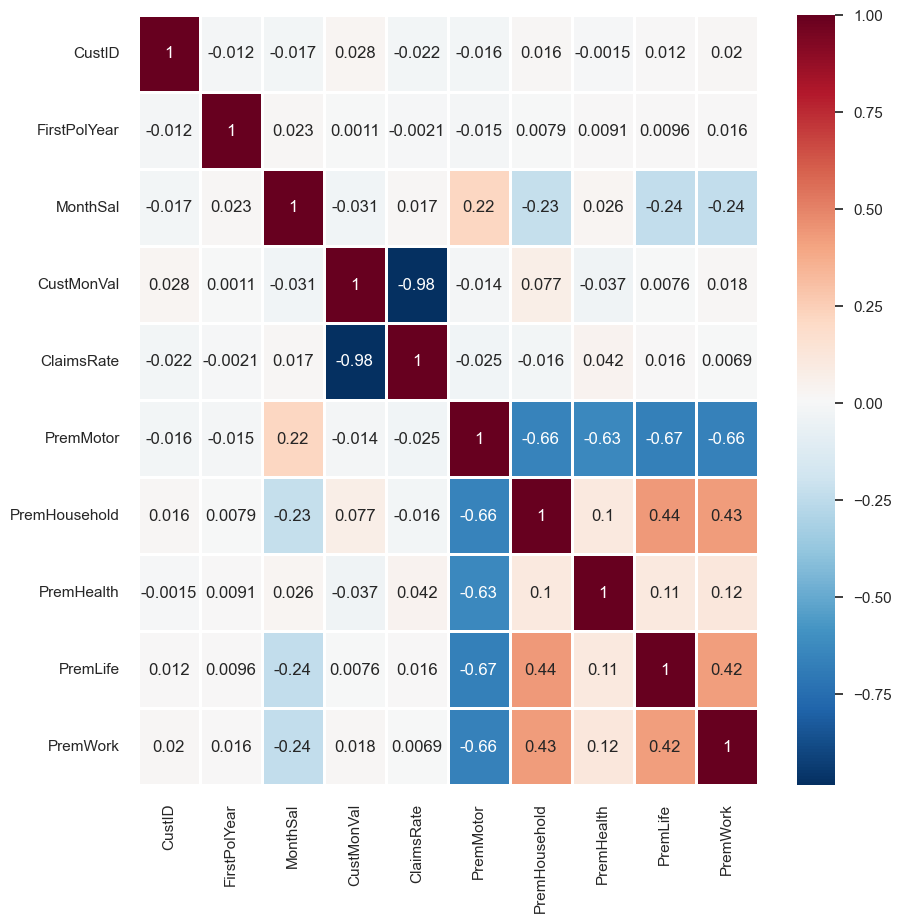

In [ ]:
pearsoncorr = df_complete.corr(method='pearson')

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(pearsoncorr, xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.8,
           ax=ax);

The variables `ClaimsRate` and `CustMonVal` are extremely highly correlated.

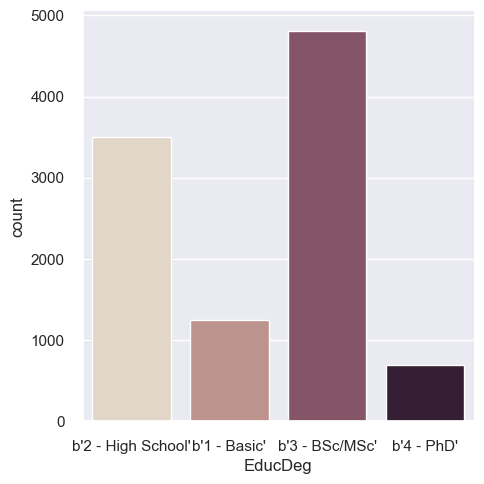

In [ ]:
sns.catplot(data=df_complete, x="EducDeg", kind="count", palette="ch:.25", ax=ax);

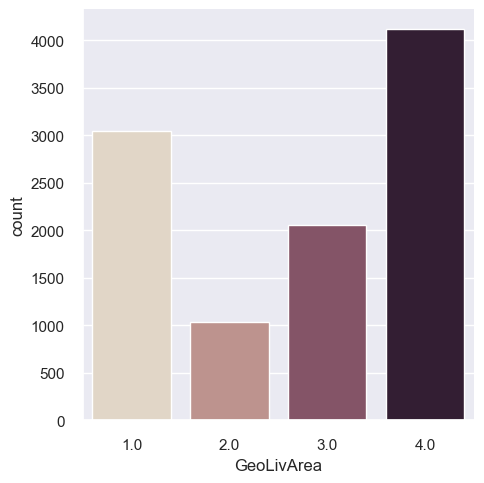

In [ ]:
sns.catplot(data=df_complete, x="GeoLivArea", kind="count", palette="ch:.25", ax=ax);

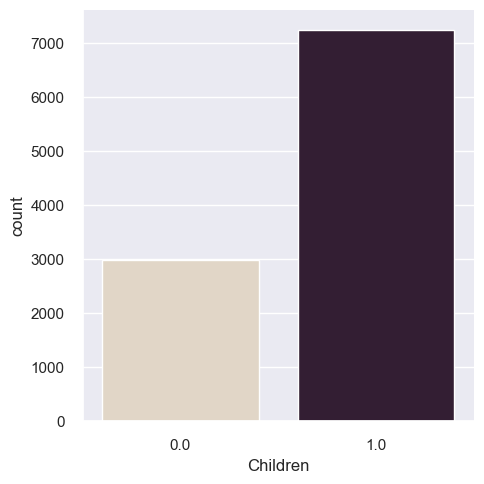

In [ ]:
sns.catplot(data=df_complete, x="Children", kind="count", palette="ch:.25", ax=ax);

Regarding the three categorical variables, we do not have balanced data in any of them.
We will proceed to do the feature engineering, and then we will discuss the posibility of applying data normalization and dummyfication to the data.

---

# 4. Feature Engineering <a name="FeatureEngineering"></a>
<hr style="border:2px solid gray">

## 4.1 New columns <a name="NewColumns"></a>

Two columns will be created:
1) Total premium for each consumer
2) Years of service for each consumer

In [ ]:
df_complete['Total_Prem'] = (df_complete['PremMotor']+df_complete['PremHousehold']
                            + df_complete['PremHealth']+df_complete['PremLife'] +df_complete['PremWork'])

df_complete['Client_Years'] = 2016 - df_complete['FirstPolYear']

In [ ]:
# Define CustID as index
df_complete.set_index("CustID")

FirstPolYear             EducDeg  MonthSal GeoLivArea Children  \
CustID                                                                    
1.0            1985.0  b'2 - High School'    2177.0        1.0      1.0   
2.0            1981.0  b'2 - High School'     677.0        4.0      1.0   
3.0            1991.0        b'1 - Basic'    2277.0        3.0      0.0   
4.0            1990.0      b'3 - BSc/MSc'    1099.0        4.0      1.0   
5.0            1986.0      b'3 - BSc/MSc'    1763.0        4.0      1.0   
...               ...                 ...       ...        ...      ...   
10011.0        1989.0  b'2 - High School'    3959.0        2.0      1.0   
10058.0        1983.0  b'2 - High School'    1569.0        4.0      1.0   
10143.0        1986.0      b'3 - BSc/MSc'    1652.0        3.0      1.0   
10285.0        1980.0      b'3 - BSc/MSc'    1504.0        4.0      1.0   
10286.0        1985.0      b'3 - BSc/MSc'    3878.0        4.0      1.0   

         CustMonVal  ClaimsRate  PremMotor  PremHousehold  PremHealth  \
CustID                                                                  
1.0          380.97        0.39     375.85          79.45     146.360   
2.0         -131.13        1.12      77.46         416.20     116.690   
3.0          504.67        0.28     206.15         224.50     124.580   
4.0          -16.99        0.99     182.48          43.35     311.170   
5.0           35.23        0.90     338.62          47.80     182.590   
...             ...         ...        ...            ...         ...   
10011.0     -128.24        1.14     177.81         153.35     311.280   
10058.0      222.60        0.55     235.60         211.15     235.466   
10143.0       55.67        0.88     257.05          94.45     308.390   
10285.0       -1.55        0.96     390.63          29.45     179.700   
10286.0      -57.45        1.04     269.05         217.25     219.930   

         PremLife  PremWork  Total_Prem  Client_Years  
CustID                                                 
1.0        47.010    16.890     665.560          31.0  
2.0       194.480   106.130     910.960          35.0  
3.0        86.350    99.020     740.600          25.0  
4.0        35.340    28.340     600.680          26.0  
5.0        18.780    41.450     629.240          30.0  
...           ...       ...         ...           ...  
10011.0    67.790    35.450     745.680          27.0  
10058.0    32.340    68.790     783.346          33.0  
10143.0    24.916    13.780     698.586          30.0  
10285.0    -6.000    20.626     614.406          36.0  
10286.0    32.450    33.584     772.264          31.0  

[10255 rows x 14 columns]

In [ ]:
# Split features
non_metric_features = ["EducDeg","GeoLivArea","Children"]
metric_features = ['FirstPolYear', 'MonthSal', 'CustMonVal', 'ClaimsRate', 'PremMotor',
                   'PremHousehold','PremHealth', 'PremLife', 'PremWork', 'Total_Prem', 'Client_Years']


In [ ]:
df_complete.columns

Index(['CustID', 'FirstPolYear', 'EducDeg', 'MonthSal', 'GeoLivArea',
       'Children', 'CustMonVal', 'ClaimsRate', 'PremMotor', 'PremHousehold',
       'PremHealth', 'PremLife', 'PremWork', 'Total_Prem', 'Client_Years'],
      dtype='object')

---

## 4.2 Data Normalization <a name="DataNormalization"></a>

StandarScaler() will be used to have all numerical variables scaled, so none of them will have more weight in the data and we will have them in comparable units.

In [ ]:
# Create a copy
df_standard = df_complete.copy()

In [ ]:
# Apply StandardScaler
scaler = StandardScaler()
#scaled_feat = scaler.fit_transform(df_standard[metric_features])
scaler.fit(df_standard[metric_features])
scaled_feat = scaler.transform(df_standard[metric_features])
scaled_feat

array([[-0.15419375, -0.33021381,  0.18150283, ..., -0.53387023,
        -0.46884059,  0.15419375],
       [-0.76015538, -1.85800285, -0.30719739, ...,  1.53529836,
         0.88975083,  0.76015538],
       [ 0.7547487 , -0.2283612 ,  0.29955051, ...,  1.37044192,
        -0.05340171, -0.7547487 ],
       ...,
       [-0.00270334, -0.86493997, -0.12893299, ..., -0.60598043,
        -0.28600098,  0.00270334],
       [-0.91164579, -1.01568182, -0.18353839, ..., -0.44724524,
        -0.75204101,  0.91164579],
       [-0.15419375,  1.40229897, -0.23688411, ..., -0.1467938 ,
         0.12189755,  0.15419375]])

In [ ]:
# See what the fit method is doing (notice the trailing underscore):
print("Parameters fitted:\n", scaler.mean_, "\n", scaler.var_)

Parameters fitted:
 [1.98601784e+03 2.50120753e+03 1.90776513e+02 7.18136519e-01
 2.97579870e+02 2.03660990e+02 1.68165448e+02 4.09245636e+01
 3.99149866e+01 7.50245858e+02 2.99821550e+01] 
 [4.35742306e+01 9.63952729e+05 1.09805600e+06 2.17694965e+00
 1.89544812e+04 5.04634278e+04 5.48623094e+03 1.97596197e+03
 1.86006180e+03 3.26265675e+04 4.35742306e+01]


In [ ]:
df_standard[metric_features] = scaled_feat
df_standard.head()

CustID  FirstPolYear             EducDeg  MonthSal GeoLivArea Children  \
0     1.0     -0.154194  b'2 - High School' -0.330214        1.0      1.0   
1     2.0     -0.760155  b'2 - High School' -1.858003        4.0      1.0   
2     3.0      0.754749        b'1 - Basic' -0.228361        3.0      0.0   
3     4.0      0.603258      b'3 - BSc/MSc' -1.428185        4.0      1.0   
4     5.0     -0.002703      b'3 - BSc/MSc' -0.751884        4.0      1.0   

   CustMonVal  ClaimsRate  PremMotor  PremHousehold  PremHealth  PremLife  \
0    0.181503   -0.222398   0.568513      -0.552932   -0.294393  0.136900   
1   -0.307197    0.272367  -1.598834       0.946129   -0.694965  3.454426   
2    0.299551   -0.296951  -0.664098       0.092766   -0.588443  1.021903   
3   -0.198273    0.184258  -0.836024      -0.713633    1.930691 -0.125632   
4   -0.148439    0.123260   0.298094      -0.693824    0.194745 -0.498170   

   PremWork  Total_Prem  Client_Years  
0 -0.533870   -0.468841      0.154194  
1  1.535298    0.889751      0.760155  
2  1.370442   -0.053402     -0.754749  
3 -0.268384   -0.828031     -0.603258  
4  0.035592   -0.669917      0.002703

In [ ]:
# Checking mean and variance of standardized variables
df_standard[metric_features].describe().round(2)

FirstPolYear  MonthSal  CustMonVal  ClaimsRate  PremMotor  \
count      10255.00  10255.00    10255.00    10255.00   10255.00   
mean           0.00      0.00       -0.00       -0.00       0.00   
std            1.00      1.00        1.00        1.00       1.00   
min           -1.82     -2.21      -62.11       -0.49      -2.19   
25%           -0.91     -0.80       -0.19       -0.22      -0.76   
50%           -0.00      0.00       -0.00        0.00       0.01   
75%            0.91      0.80        0.20        0.18       0.80   
max            1.82      2.57        1.46       64.58       2.09   

       PremHousehold  PremHealth  PremLife  PremWork  Total_Prem  Client_Years  
count       10255.00    10255.00  10255.00  10255.00    10255.00      10255.00  
mean            0.00       -0.00      0.00      0.00        0.00         -0.00  
std             1.00        1.00      1.00      1.00        1.00          1.00  
min            -1.24       -2.30     -1.08     -1.20       -1.85         -1.82  
25%            -0.69       -0.76     -0.70     -0.68       -0.69         -0.91  
50%            -0.32       -0.07     -0.35     -0.33       -0.29          0.00  
75%             0.38        0.70      0.36      0.37        0.40          0.91  
max             3.66        3.71      3.62      3.54        4.12          1.82

In [ ]:
df = df_standard.copy()

---

## 4.3 One Hot Encoding <a name="ohe"></a>

OneHotEncoding() will be used for the categorical variables, except for 'Children', since this variable is already dichotomized.

In [ ]:
# Create a copy
df_ohc = df.copy()

In [ ]:
# Adjust categorical features no considering 'Children'
non_metric_features = ["EducDeg","GeoLivArea"]

In [ ]:
# Use OneHotEncoder to encode the categorical features. Get feature names and create a DataFrame
# with the one-hot encoded categorical features (pass feature names)
ohc = OneHotEncoder(sparse=False, drop="first")
ohc_feat = ohc.fit_transform(df_ohc[non_metric_features])
ohc_feat_names = ohc.get_feature_names_out()
ohc_df = pd.DataFrame(ohc_feat, index=df_ohc.index, columns=ohc_feat_names)  # Why the index=df_ohc.index?
ohc_df

EducDeg_b'2 - High School'  EducDeg_b'3 - BSc/MSc'  EducDeg_b'4 - PhD'  \
0                             1.0                     0.0                 0.0   
1                             1.0                     0.0                 0.0   
2                             0.0                     0.0                 0.0   
3                             0.0                     1.0                 0.0   
4                             0.0                     1.0                 0.0   
...                           ...                     ...                 ...   
10010                         1.0                     0.0                 0.0   
10057                         1.0                     0.0                 0.0   
10142                         0.0                     1.0                 0.0   
10284                         0.0                     1.0                 0.0   
10285                         0.0                     1.0                 0.0   

       GeoLivArea_2.0  GeoLivArea_3.0  GeoLivArea_4.0  
0                 0.0             0.0             0.0  
1                 0.0             0.0             1.0  
2                 0.0             1.0             0.0  
3                 0.0             0.0             1.0  
4                 0.0             0.0             1.0  
...               ...             ...             ...  
10010             1.0             0.0             0.0  
10057             0.0             0.0             1.0  
10142             0.0             1.0             0.0  
10284             0.0             0.0             1.0  
10285             0.0             0.0             1.0  

[10255 rows x 6 columns]

In [ ]:
# Reassigning df to contain ohc variables
df_ohc = pd.concat([df_ohc.drop(columns=non_metric_features), ohc_df], axis=1)
df_ohc.head()

CustID  FirstPolYear  MonthSal Children  CustMonVal  ClaimsRate  PremMotor  \
0     1.0     -0.154194 -0.330214      1.0    0.181503   -0.222398   0.568513   
1     2.0     -0.760155 -1.858003      1.0   -0.307197    0.272367  -1.598834   
2     3.0      0.754749 -0.228361      0.0    0.299551   -0.296951  -0.664098   
3     4.0      0.603258 -1.428185      1.0   -0.198273    0.184258  -0.836024   
4     5.0     -0.002703 -0.751884      1.0   -0.148439    0.123260   0.298094   

   PremHousehold  PremHealth  PremLife  PremWork  Total_Prem  Client_Years  \
0      -0.552932   -0.294393  0.136900 -0.533870   -0.468841      0.154194   
1       0.946129   -0.694965  3.454426  1.535298    0.889751      0.760155   
2       0.092766   -0.588443  1.021903  1.370442   -0.053402     -0.754749   
3      -0.713633    1.930691 -0.125632 -0.268384   -0.828031     -0.603258   
4      -0.693824    0.194745 -0.498170  0.035592   -0.669917      0.002703   

   EducDeg_b'2 - High School'  EducDeg_b'3 - BSc/MSc'  EducDeg_b'4 - PhD'  \
0                         1.0                     0.0                 0.0   
1                         1.0                     0.0                 0.0   
2                         0.0                     0.0                 0.0   
3                         0.0                     1.0                 0.0   
4                         0.0                     1.0                 0.0   

   GeoLivArea_2.0  GeoLivArea_3.0  GeoLivArea_4.0  
0             0.0             0.0             0.0  
1             0.0             0.0             1.0  
2             0.0             1.0             0.0  
3             0.0             0.0             1.0  
4             0.0             0.0             1.0

In [ ]:
df = df_ohc.copy()

In [ ]:
df.set_index("CustID")

FirstPolYear  MonthSal Children  CustMonVal  ClaimsRate  PremMotor  \
CustID                                                                        
1.0         -0.154194 -0.330214      1.0    0.181503   -0.222398   0.568513   
2.0         -0.760155 -1.858003      1.0   -0.307197    0.272367  -1.598834   
3.0          0.754749 -0.228361      0.0    0.299551   -0.296951  -0.664098   
4.0          0.603258 -1.428185      1.0   -0.198273    0.184258  -0.836024   
5.0         -0.002703 -0.751884      1.0   -0.148439    0.123260   0.298094   
...               ...       ...      ...         ...         ...        ...   
10011.0      0.451768  1.484800      1.0   -0.304439    0.285922  -0.869945   
10058.0     -0.457175 -0.949478      1.0    0.030369   -0.113956  -0.450189   
10143.0     -0.002703 -0.864940      1.0   -0.128933    0.109705  -0.294387   
10285.0     -0.911646 -1.015682      1.0   -0.183538    0.163925   0.675867   
10286.0     -0.154194  1.402299      1.0   -0.236884    0.218146  -0.207226   

         PremHousehold  PremHealth  PremLife  PremWork  Total_Prem  \
CustID                                                               
1.0          -0.552932   -0.294393  0.136900 -0.533870   -0.468841   
2.0           0.946129   -0.694965  3.454426  1.535298    0.889751   
3.0           0.092766   -0.588443  1.021903  1.370442   -0.053402   
4.0          -0.713633    1.930691 -0.125632 -0.268384   -0.828031   
5.0          -0.693824    0.194745 -0.498170  0.035592   -0.669917   
...                ...         ...       ...       ...         ...   
10011.0      -0.223962    1.932176  0.604372 -0.103528   -0.025278   
10058.0       0.033338    0.908619 -0.193121  0.669512    0.183250   
10143.0      -0.486159    1.893159 -0.360133 -0.605980   -0.286001   
10285.0      -0.775510    0.155727 -1.055628 -0.447245   -0.752041   
10286.0       0.060492    0.698868 -0.190646 -0.146794    0.121898   

         Client_Years  EducDeg_b'2 - High School'  EducDeg_b'3 - BSc/MSc'  \
CustID                                                                      
1.0          0.154194                         1.0                     0.0   
2.0          0.760155                         1.0                     0.0   
3.0         -0.754749                         0.0                     0.0   
4.0         -0.603258                         0.0                     1.0   
5.0          0.002703                         0.0                     1.0   
...               ...                         ...                     ...   
10011.0     -0.451768                         1.0                     0.0   
10058.0      0.457175                         1.0                     0.0   
10143.0      0.002703                         0.0                     1.0   
10285.0      0.911646                         0.0                     1.0   
10286.0      0.154194                         0.0                     1.0   

         EducDeg_b'4 - PhD'  GeoLivArea_2.0  GeoLivArea_3.0  GeoLivArea_4.0  
CustID                                                                       
1.0                     0.0             0.0             0.0             0.0  
2.0                     0.0             0.0             0.0             1.0  
3.0                     0.0             0.0             1.0             0.0  
4.0                     0.0             0.0             0.0             1.0  
5.0                     0.0             0.0             0.0             1.0  
...                     ...             ...             ...             ...  
10011.0                 0.0             1.0             0.0             0.0  
10058.0                 0.0             0.0             0.0             1.0  
10143.0                 0.0             0.0             1.0             0.0  
10285.0                 0.0             0.0             0.0             1.0  
10286.0                 0.0             0.0             0.0             1.0  

[10255 rows x 18 columns]

# 5. Modeling <a name="modeling"></a>
<hr style="border:2px solid gray">

## 5.1 Hierarchical clustering <a name="HC"></a>

We are going to apply hierarchichal agglomerative clustering to decide the number of clusters that our data have. We will visualize it in a dendrogram.
The linkage method that we are going to use is Ward's method, because this linkage take into account the variability of the data within a cluster and the variability when we merge clusters. Therefore, it could be a great option to choose.

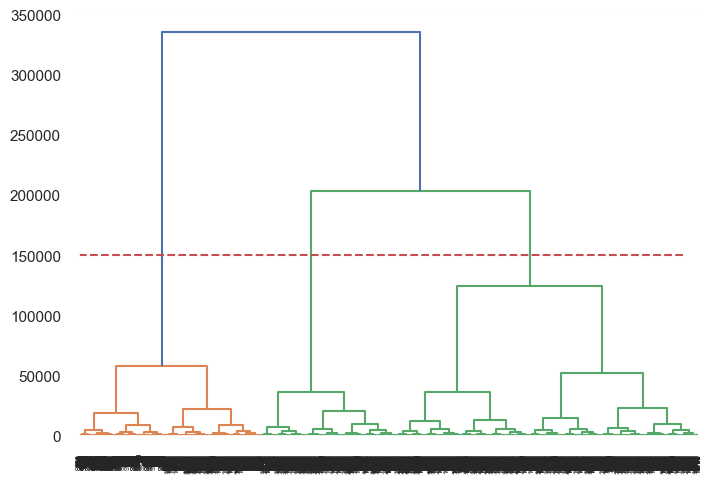

In [ ]:
linkage_data = linkage(df, method='ward', metric='euclidean')
dendrogram(linkage_data)

plt.hlines(150000, 0, 100000, colors="r", linestyles="dashed")
plt.show()

From the dendrogram we can observe that if we cut in 150000 we will obtain 3 clusters. We decide to cut in that section because, even when two clusters seem to be pretty good because the distances of the lines are larger, for the business process it would be better if we divide our customers into three different groups. This is our first approach to the number of clusters. It is going to be analyzed this same issue with k-means clustering.

Now let's perform the clustering

In [ ]:
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
df_labels_hc = hc.fit_predict(df)

In [ ]:
df_hc = df.copy()
df_hc['Clusters'] = pd.Series(df_labels_hc, index=df.index)
df_hc.head()

CustID  FirstPolYear  MonthSal Children  CustMonVal  ClaimsRate  PremMotor  \
0     1.0     -0.154194 -0.330214      1.0    0.181503   -0.222398   0.568513   
1     2.0     -0.760155 -1.858003      1.0   -0.307197    0.272367  -1.598834   
2     3.0      0.754749 -0.228361      0.0    0.299551   -0.296951  -0.664098   
3     4.0      0.603258 -1.428185      1.0   -0.198273    0.184258  -0.836024   
4     5.0     -0.002703 -0.751884      1.0   -0.148439    0.123260   0.298094   

   PremHousehold  PremHealth  PremLife  PremWork  Total_Prem  Client_Years  \
0      -0.552932   -0.294393  0.136900 -0.533870   -0.468841      0.154194   
1       0.946129   -0.694965  3.454426  1.535298    0.889751      0.760155   
2       0.092766   -0.588443  1.021903  1.370442   -0.053402     -0.754749   
3      -0.713633    1.930691 -0.125632 -0.268384   -0.828031     -0.603258   
4      -0.693824    0.194745 -0.498170  0.035592   -0.669917      0.002703   

   EducDeg_b'2 - High School'  EducDeg_b'3 - BSc/MSc'  EducDeg_b'4 - PhD'  \
0                         1.0                     0.0                 0.0   
1                         1.0                     0.0                 0.0   
2                         0.0                     0.0                 0.0   
3                         0.0                     1.0                 0.0   
4                         0.0                     1.0                 0.0   

   GeoLivArea_2.0  GeoLivArea_3.0  GeoLivArea_4.0  Clusters  
0             0.0             0.0             0.0         1  
1             0.0             0.0             1.0         1  
2             0.0             1.0             0.0         1  
3             0.0             0.0             1.0         1  
4             0.0             0.0             1.0         1

In the next plots it is possible to see the differences between the clusters in the variables.

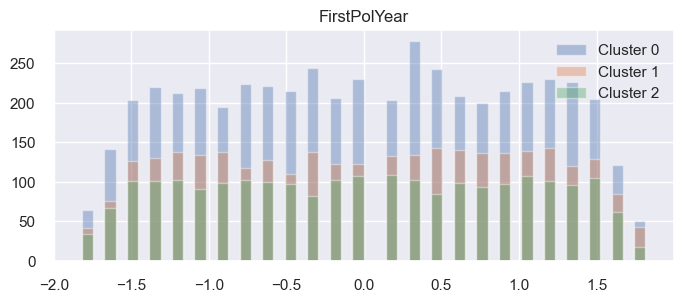

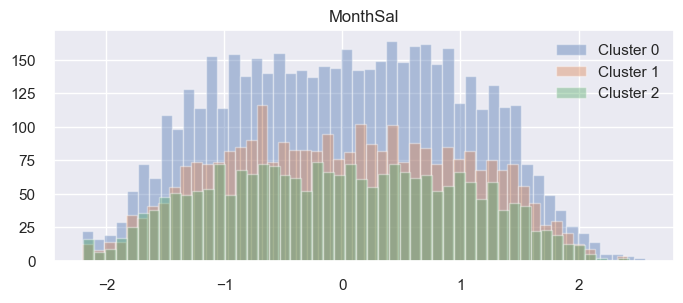

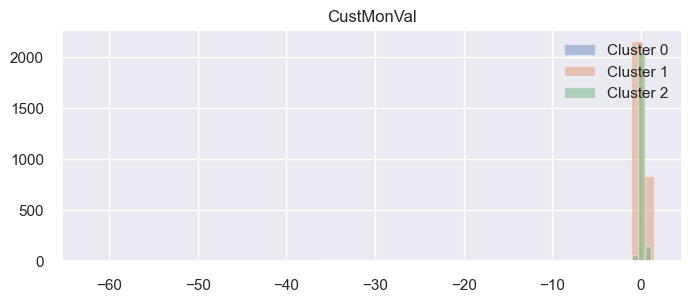

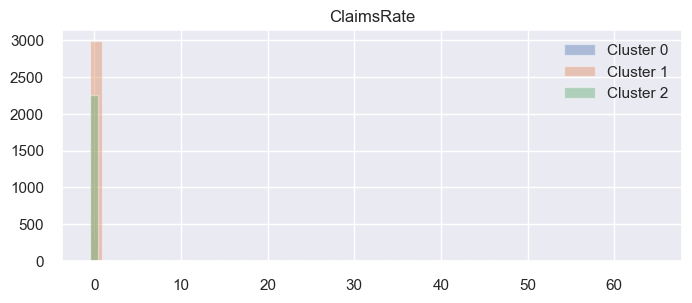

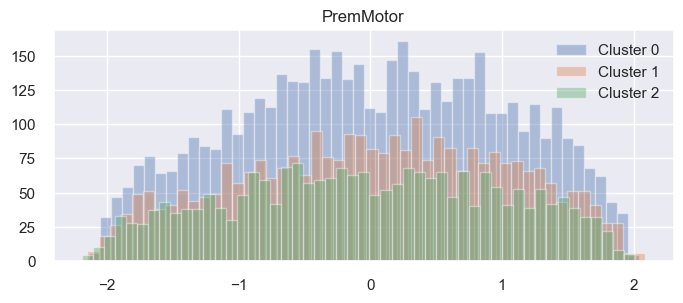

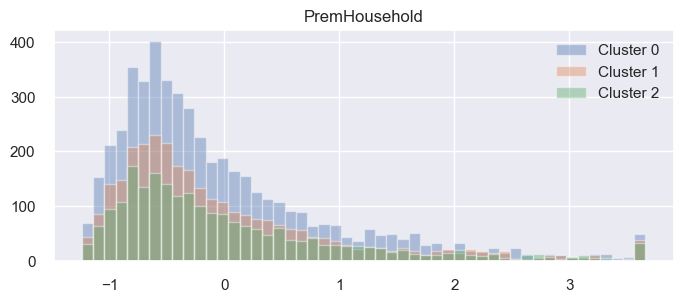

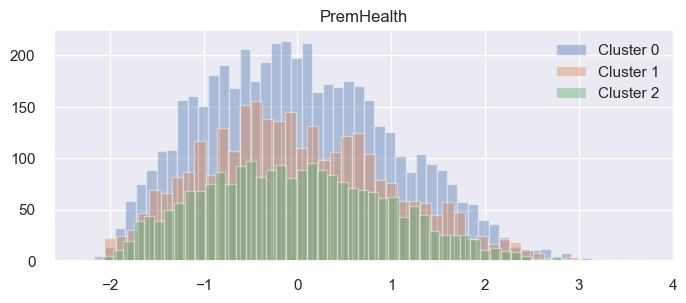

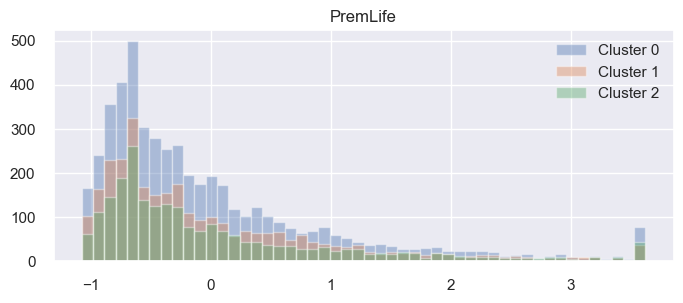

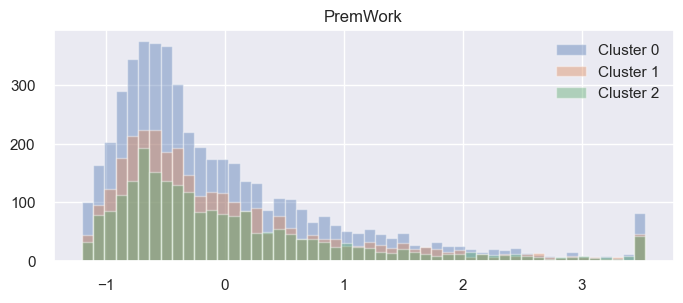

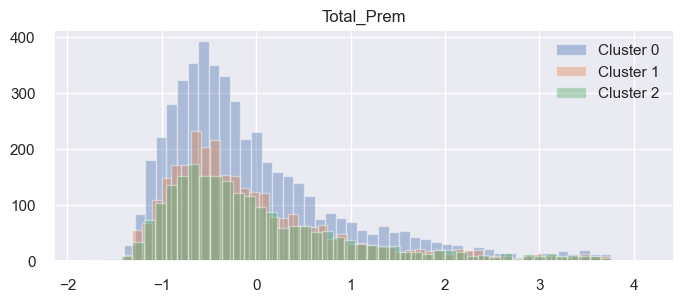

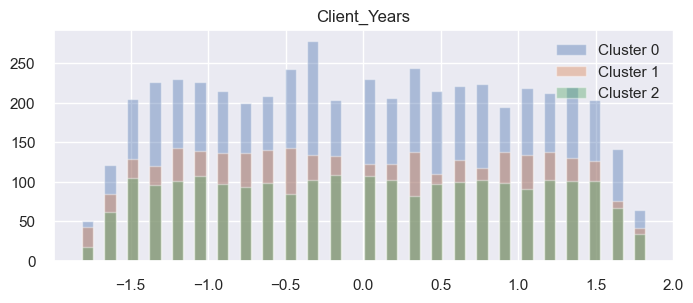

In [ ]:
for var in metric_features:
    plt.rcParams["figure.figsize"] = (8,3)
    plt.title(var)
    plt.hist(df_hc[var].loc[df_hc['Clusters']==0], alpha=0.4, label = 'Cluster 0', bins = 50)
    plt.hist(df_hc[var].loc[df_hc['Clusters']==1], alpha=0.4, label = 'Cluster 1', bins = 50)
    plt.hist(df_hc[var].loc[df_hc['Clusters']==2], alpha=0.4, label = 'Cluster 2', bins = 50)
    plt.legend(loc='upper right')
    plt.show()

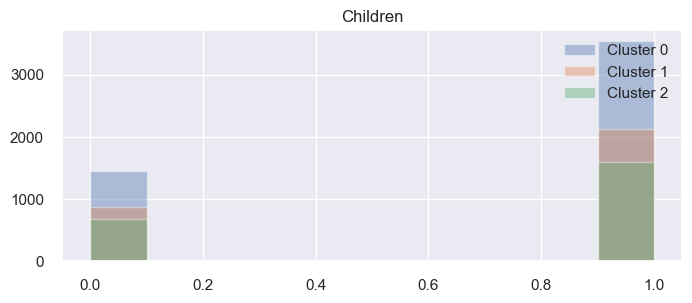

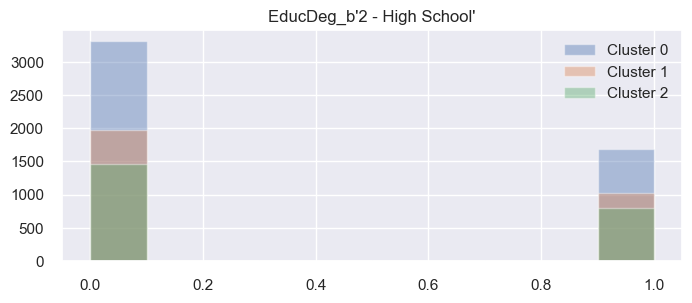

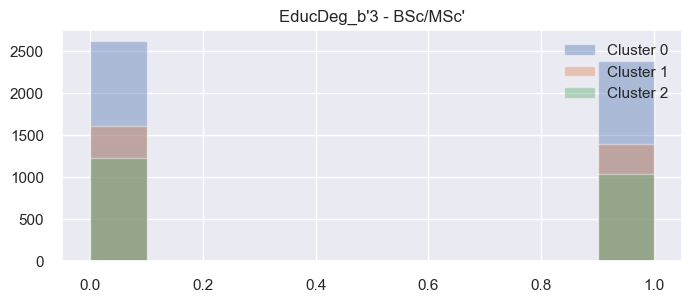

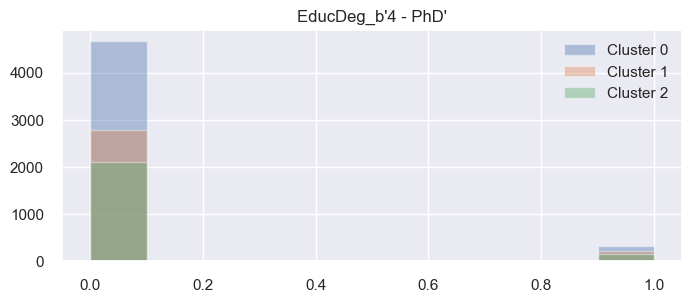

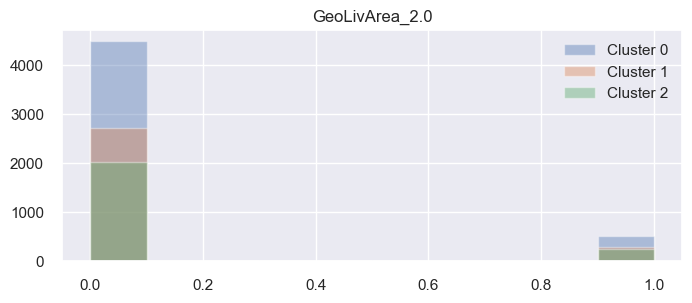

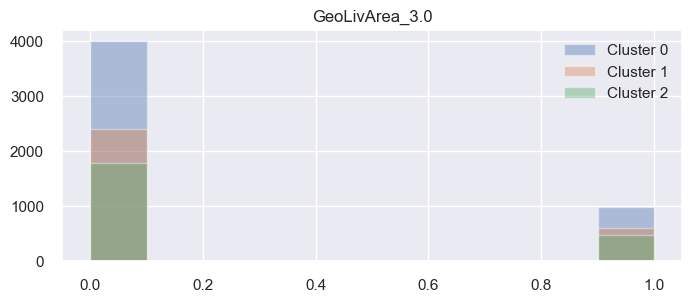

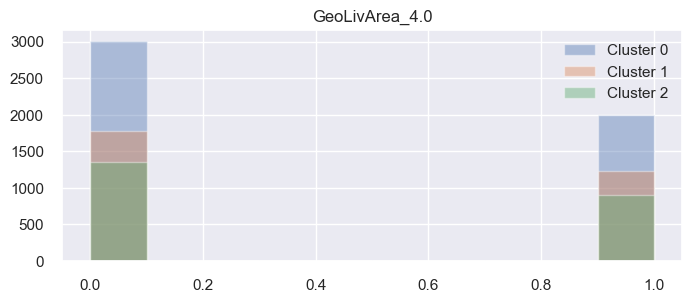

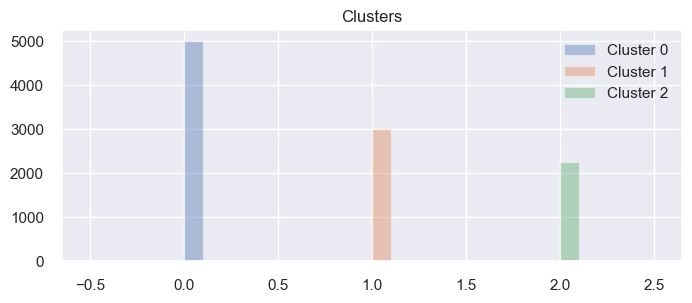

In [ ]:
hc_non_metric_features = df_hc.columns.drop(metric_features).to_list()
hc_non_metric_features.remove('CustID')
for var in hc_non_metric_features:
    plt.rcParams["figure.figsize"] = (8,3)
    plt.title(var)
    plt.hist(df_hc[var].loc[df_hc['Clusters']==0], alpha=0.4, label = 'Cluster 0')
    plt.hist(df_hc[var].loc[df_hc['Clusters']==1], alpha=0.4, label = 'Cluster 1')
    plt.hist(df_hc[var].loc[df_hc['Clusters']==2], alpha=0.4, label = 'Cluster 2')
    plt.legend(loc='upper right')
    plt.show()

It is not possible to see great differences between the variables of the Clusters. The curves of all Clusters for each variable appear to have very similar distribution. The curve of the Cluster 0 is bigger in all variables because we have more records in that cluster. The same situation occurs with Cluster 1 when compared with Cluster 2. What matters to us is the difference in the distribution, not the scale/size of it (because of what we have just explained).

Now we are going to have a look to the k-means clustering.

---

## 5.2 K-means clustering <a name="KM"></a>

In [ ]:
range_clusters = range(1, 11)

In [ ]:
inertia = []
for n_clus in range_clusters:  # iterate over desired ncluster range
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=42)
    kmclust.fit(df[metric_features])
    inertia.append(kmclust.inertia_)

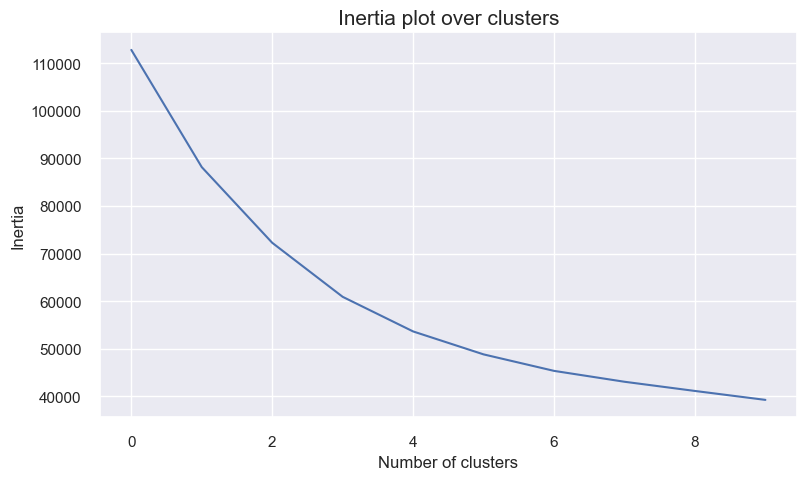

In [ ]:
# The inertia plot
plt.figure(figsize=(9,5))
plt.plot(inertia)
plt.ylabel("Inertia")
plt.xlabel("Number of clusters")
plt.title("Inertia plot over clusters", size=15)
plt.show()

According to inertia, and taking into account the number of clusters, it seems that the best number of clusters is between 2 and 4.

Let's visualize the silhouette plot.

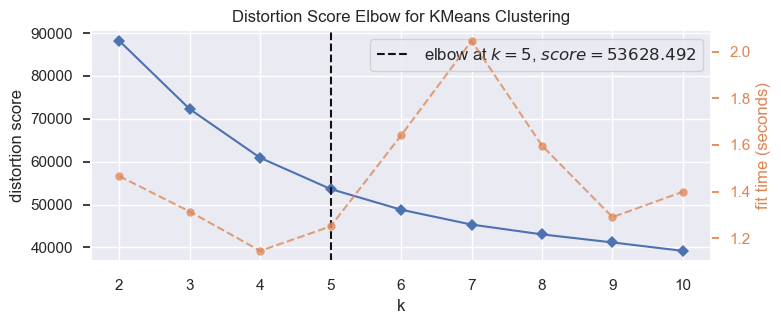

In [ ]:
visualizer3 = KElbowVisualizer(KMeans(), k=(2,11), locate_elbow=True, metric = 'distortion')
visualizer3.fit(df[metric_features]) # Fit the data to the visualizer
visualizer3.show();

We obtain that the recommended k is 5 with the Elbow method and considering as score the sum of squared distances from the points to the center of their assigned cluster.

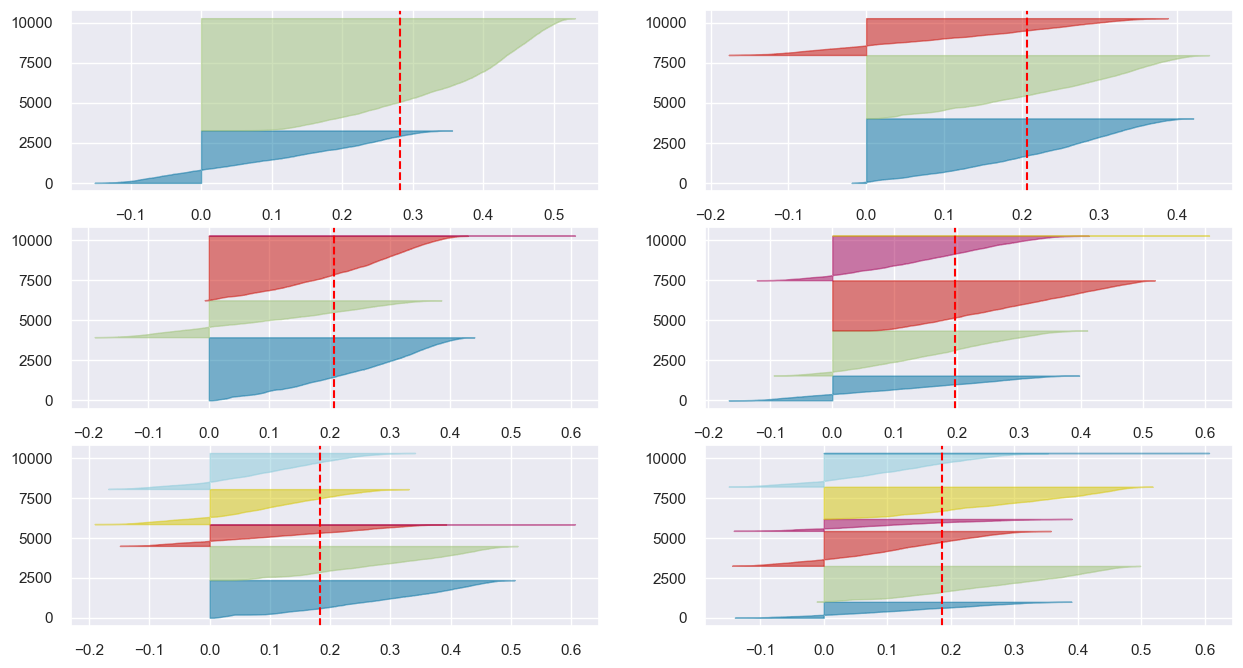

In [ ]:
fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in [2, 3, 4, 5, 6, 7]:
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df[metric_features])

Looking at the graphics, taking into account the Silhouette Score we obtain that the best number of clusters to use is 2. We must remember that Silhouette score is the average of the scores calculated to each point, whose values are between -1 and 1, where 1 indicates the point was very well assigned and -1 that it wasn't well assigned because it is possible that the cluster where it belongs and another cluster overlaps.

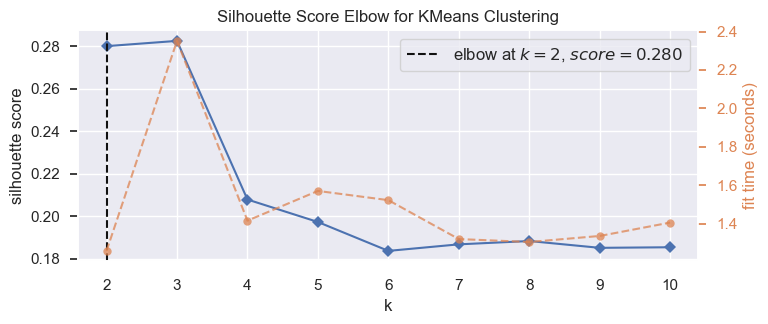

In [ ]:
Elbow_M = KElbowVisualizer(KMeans(), k =(2,11), locate_elbow=True, metric = 'silhouette')
Elbow_M.fit(df[metric_features])
Elbow_M.show();

---
First, it is going to apply k-means with two clusters. Then, it is going to be applied with 5. What will happen is that, when only two clusters are considered, both are well differenciable. On the other hand, when we consider five clusters, four of them can be distinguished well, but there is one cluster with very few records, that correpond to records that have outliers in the variable 'CustMonVal'.

### 5.2.1 Two clusters <a name="2clusters"></a>

In [ ]:
kmclust = KMeans(n_clusters=2, init='k-means++', n_init=15, random_state=42)
df_labels_km = kmclust.fit_predict(df[metric_features])

In [ ]:
df_km = df.copy()
df_km['Clusters'] = pd.Series(df_labels_km, index=df.index)
df_km.head()

CustID  FirstPolYear  MonthSal Children  CustMonVal  ClaimsRate  PremMotor  \
0     1.0     -0.154194 -0.330214      1.0    0.181503   -0.222398   0.568513   
1     2.0     -0.760155 -1.858003      1.0   -0.307197    0.272367  -1.598834   
2     3.0      0.754749 -0.228361      0.0    0.299551   -0.296951  -0.664098   
3     4.0      0.603258 -1.428185      1.0   -0.198273    0.184258  -0.836024   
4     5.0     -0.002703 -0.751884      1.0   -0.148439    0.123260   0.298094   

   PremHousehold  PremHealth  PremLife  PremWork  Total_Prem  Client_Years  \
0      -0.552932   -0.294393  0.136900 -0.533870   -0.468841      0.154194   
1       0.946129   -0.694965  3.454426  1.535298    0.889751      0.760155   
2       0.092766   -0.588443  1.021903  1.370442   -0.053402     -0.754749   
3      -0.713633    1.930691 -0.125632 -0.268384   -0.828031     -0.603258   
4      -0.693824    0.194745 -0.498170  0.035592   -0.669917      0.002703   

   EducDeg_b'2 - High School'  EducDeg_b'3 - BSc/MSc'  EducDeg_b'4 - PhD'  \
0                         1.0                     0.0                 0.0   
1                         1.0                     0.0                 0.0   
2                         0.0                     0.0                 0.0   
3                         0.0                     1.0                 0.0   
4                         0.0                     1.0                 0.0   

   GeoLivArea_2.0  GeoLivArea_3.0  GeoLivArea_4.0  Clusters  
0             0.0             0.0             0.0         1  
1             0.0             0.0             1.0         0  
2             0.0             1.0             0.0         0  
3             0.0             0.0             1.0         1  
4             0.0             0.0             1.0         1

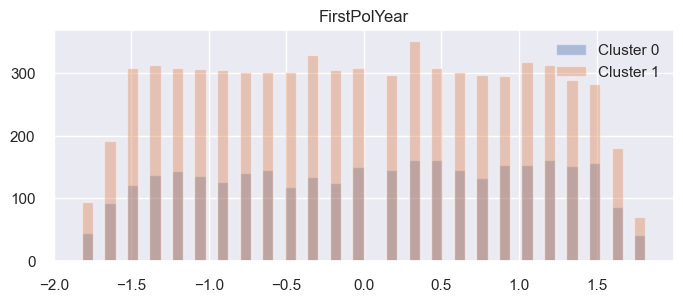

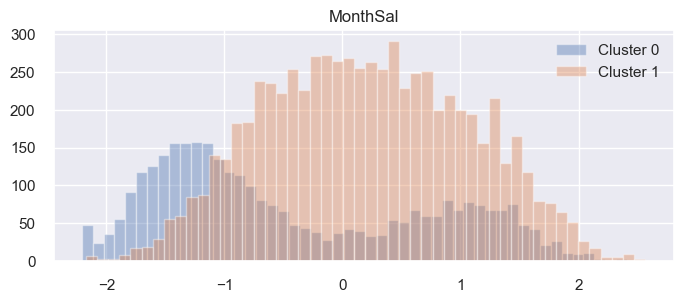

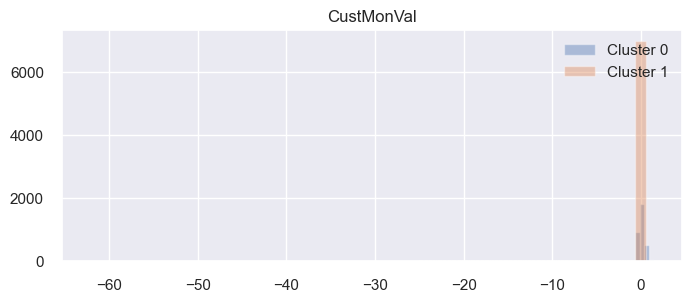

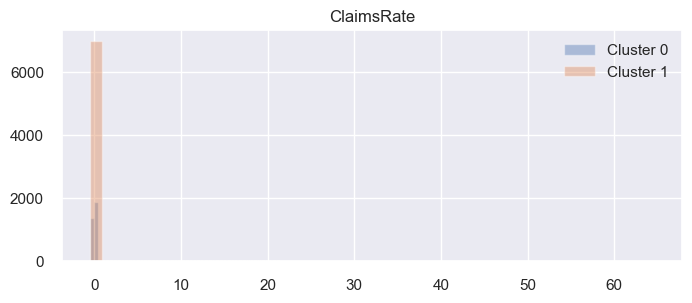

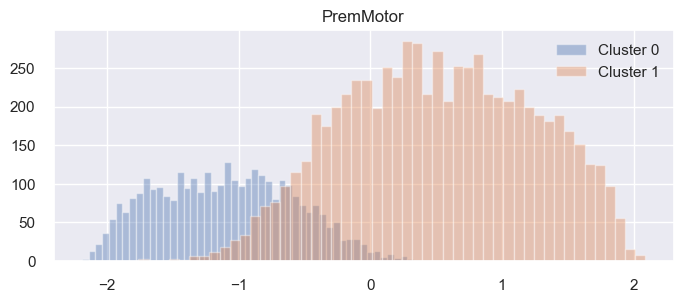

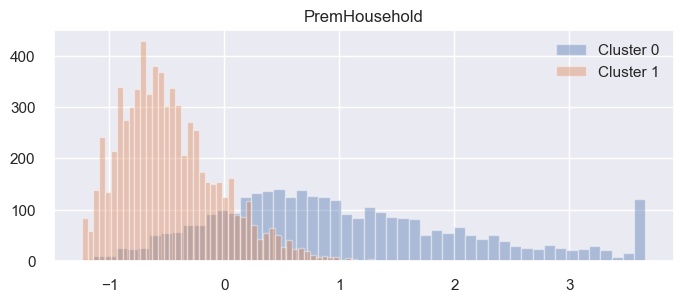

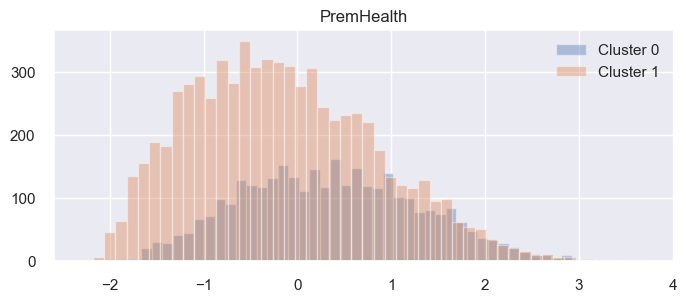

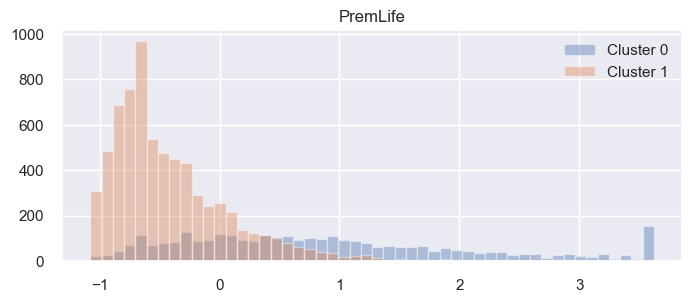

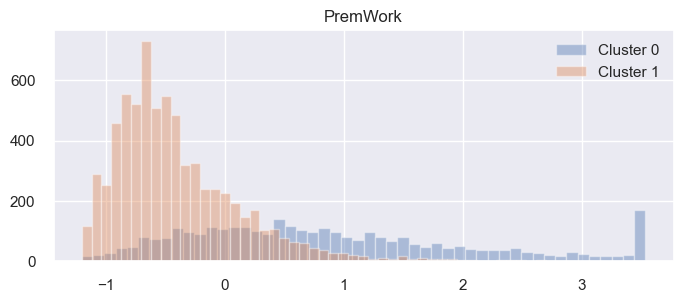

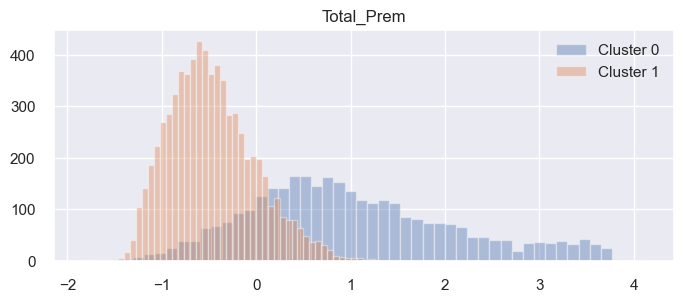

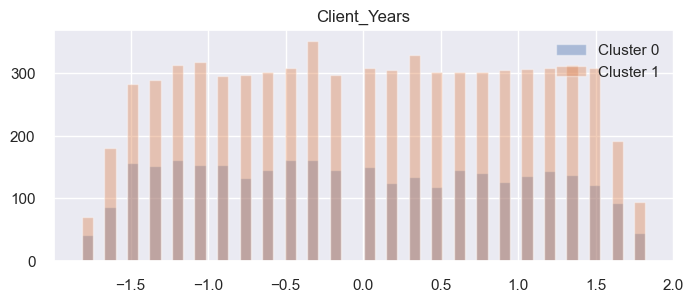

In [ ]:
for var in metric_features:
    plt.rcParams["figure.figsize"] = (8,3)
    plt.title(var)
    plt.hist(df_km[var].loc[df_km['Clusters']==0], alpha=0.4, label = 'Cluster 0', bins = 50)
    plt.hist(df_km[var].loc[df_km['Clusters']==1], alpha=0.4, label = 'Cluster 1', bins = 50)
    plt.legend(loc='upper right')
    plt.show()

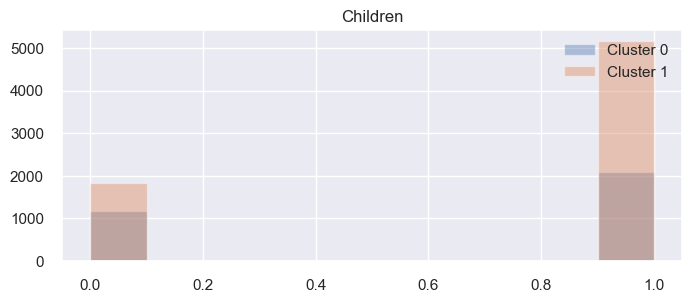

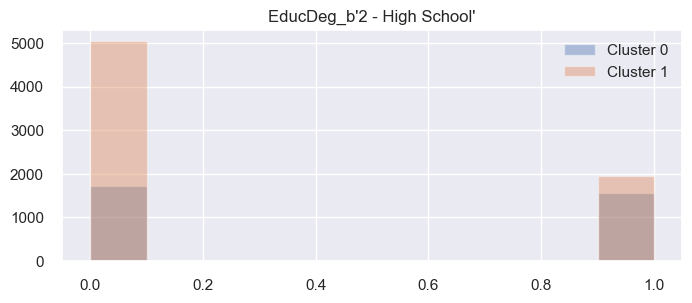

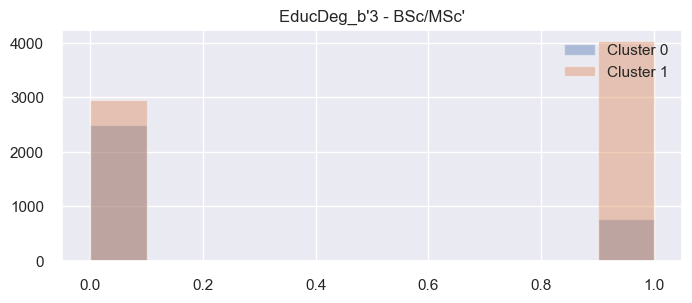

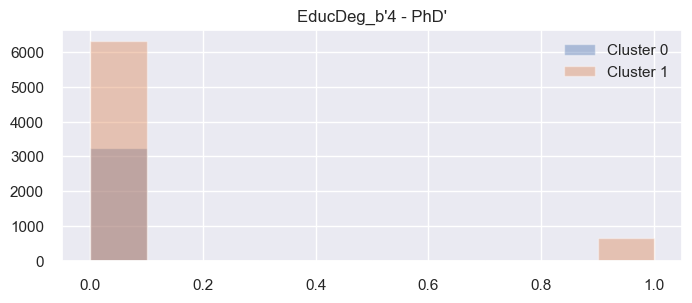

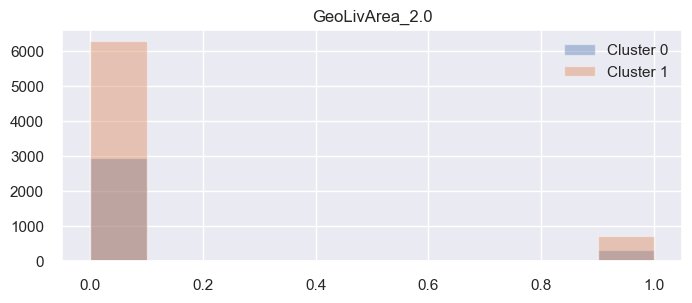

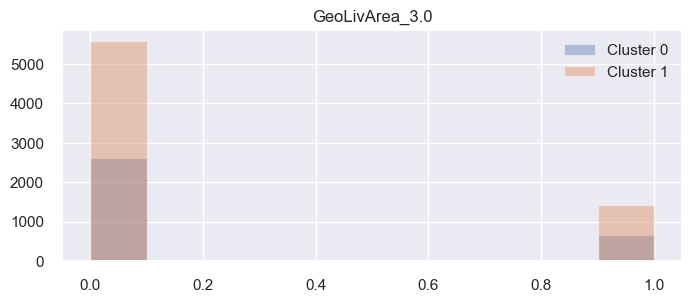

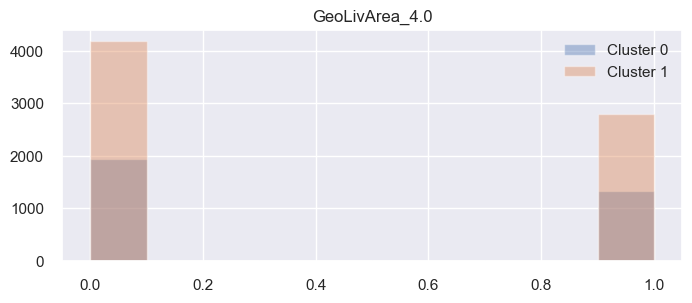

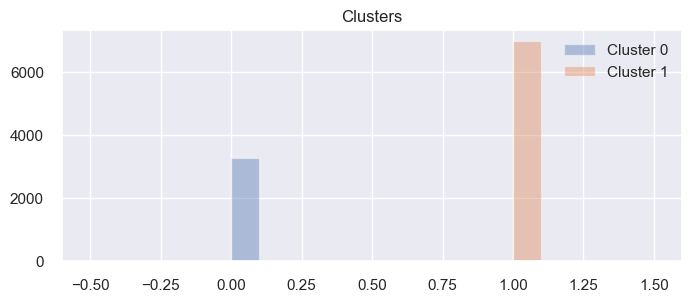

In [ ]:
for var in hc_non_metric_features:
    plt.rcParams["figure.figsize"] = (8,3)
    plt.title(var)
    plt.hist(df_km[var].loc[df_km['Clusters']==0], alpha=0.4, label = 'Cluster 0')
    plt.hist(df_km[var].loc[df_km['Clusters']==1], alpha=0.4, label = 'Cluster 1')
    plt.legend(loc='upper right')
    plt.show()

We can see that both clusters are well separated. Nevertheless, for the business it could be better to have more target groups. Therefore, let's analyze what we obtain when five clusters are considered.

### 5.2.2 Five clusters <a name="5clusters"></a>

In [ ]:
kmclust = KMeans(n_clusters=5, init='k-means++', n_init=15, random_state=42)
df_labels_km = kmclust.fit_predict(df[metric_features])

In [ ]:
df_km = df.copy()
df_km['Clusters'] = pd.Series(df_labels_km, index=df.index)
df_km.head()

CustID  FirstPolYear  MonthSal Children  CustMonVal  ClaimsRate  PremMotor  \
0     1.0     -0.154194 -0.330214      1.0    0.181503   -0.222398   0.568513   
1     2.0     -0.760155 -1.858003      1.0   -0.307197    0.272367  -1.598834   
2     3.0      0.754749 -0.228361      0.0    0.299551   -0.296951  -0.664098   
3     4.0      0.603258 -1.428185      1.0   -0.198273    0.184258  -0.836024   
4     5.0     -0.002703 -0.751884      1.0   -0.148439    0.123260   0.298094   

   PremHousehold  PremHealth  PremLife  PremWork  Total_Prem  Client_Years  \
0      -0.552932   -0.294393  0.136900 -0.533870   -0.468841      0.154194   
1       0.946129   -0.694965  3.454426  1.535298    0.889751      0.760155   
2       0.092766   -0.588443  1.021903  1.370442   -0.053402     -0.754749   
3      -0.713633    1.930691 -0.125632 -0.268384   -0.828031     -0.603258   
4      -0.693824    0.194745 -0.498170  0.035592   -0.669917      0.002703   

   EducDeg_b'2 - High School'  EducDeg_b'3 - BSc/MSc'  EducDeg_b'4 - PhD'  \
0                         1.0                     0.0                 0.0   
1                         1.0                     0.0                 0.0   
2                         0.0                     0.0                 0.0   
3                         0.0                     1.0                 0.0   
4                         0.0                     1.0                 0.0   

   GeoLivArea_2.0  GeoLivArea_3.0  GeoLivArea_4.0  Clusters  
0             0.0             0.0             0.0         1  
1             0.0             0.0             1.0         4  
2             0.0             1.0             0.0         2  
3             0.0             0.0             1.0         2  
4             0.0             0.0             1.0         1

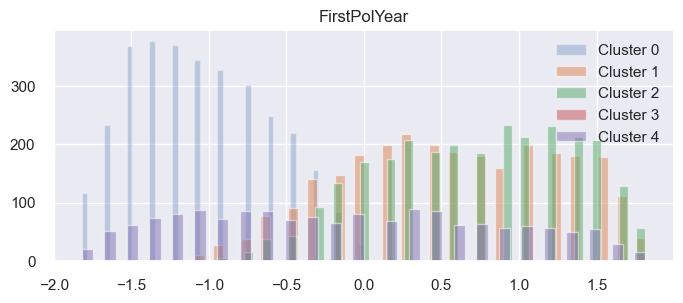

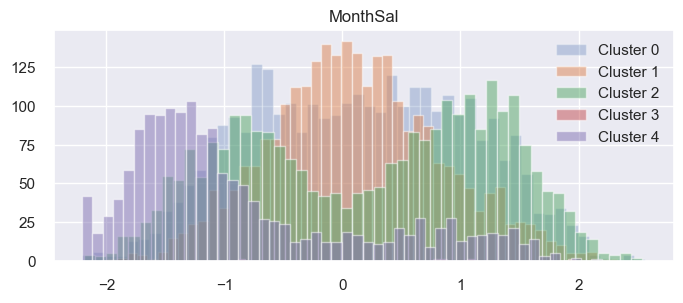

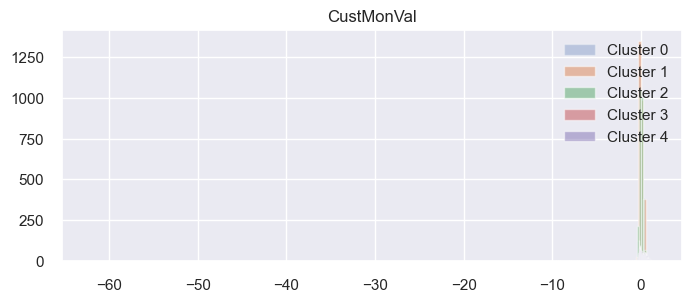

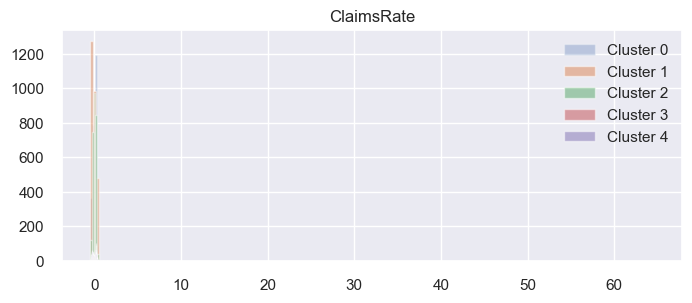

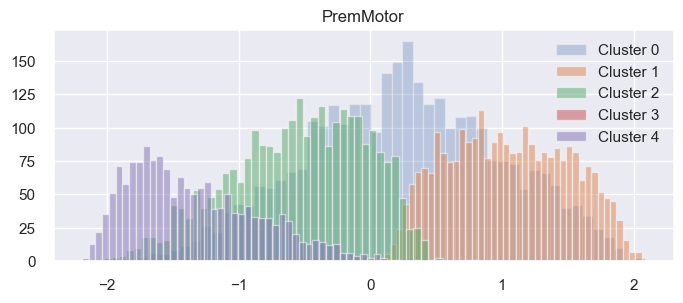

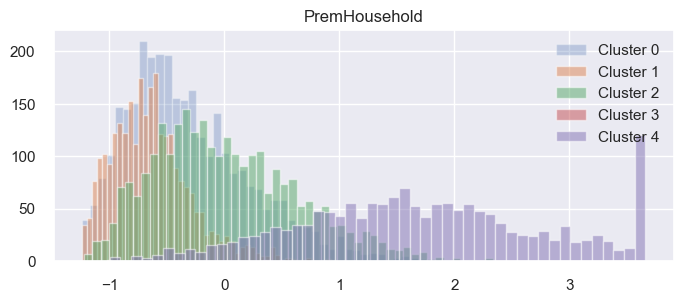

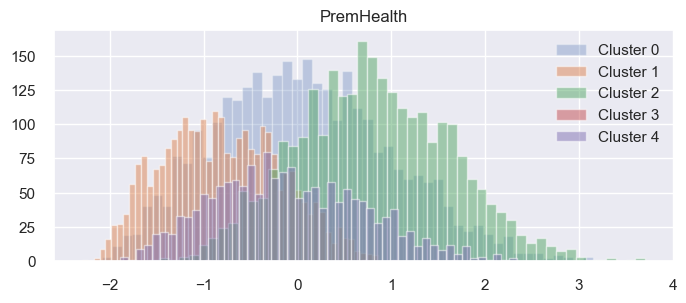

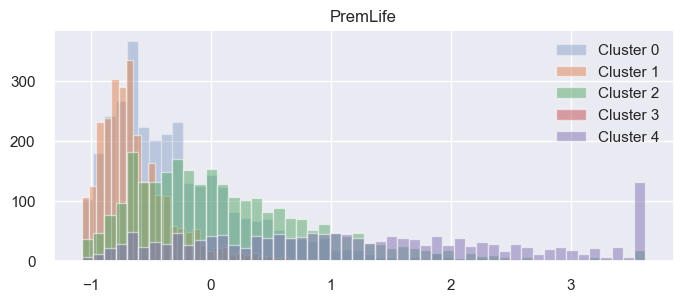

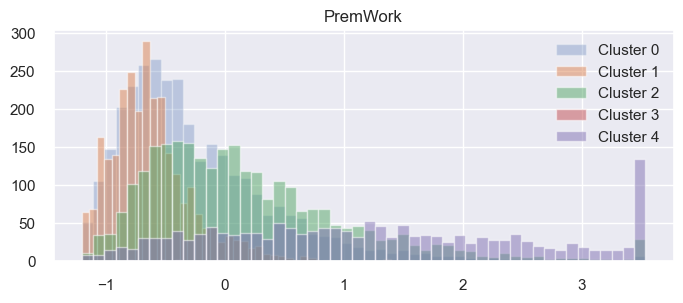

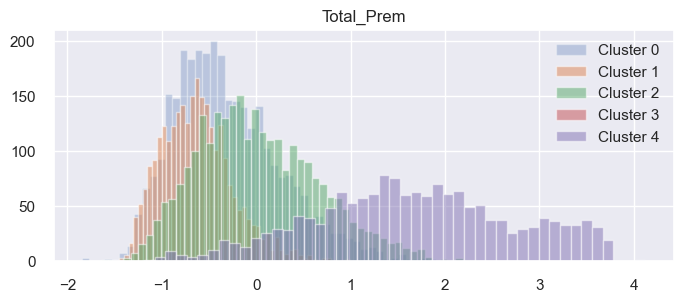

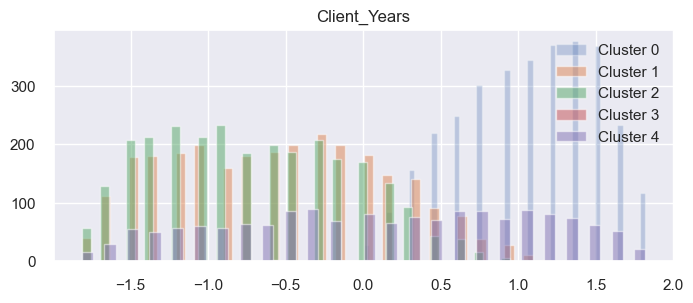

In [ ]:
for var in metric_features:
    plt.rcParams["figure.figsize"] = (8,3)
    plt.title(var)
    plt.hist(df_km[var].loc[df_km['Clusters']==0], alpha=0.3, label = 'Cluster 0', bins = 50)
    plt.hist(df_km[var].loc[df_km['Clusters']==1], alpha=0.5, label = 'Cluster 1', bins = 50)
    plt.hist(df_km[var].loc[df_km['Clusters']==2], alpha=0.5, label = 'Cluster 2', bins = 50)
    plt.hist(df_km[var].loc[df_km['Clusters']==3], alpha=0.5, label = 'Cluster 3', bins = 50)
    plt.hist(df_km[var].loc[df_km['Clusters']==4], alpha=0.5, label = 'Cluster 4', bins = 50)
    plt.legend(loc='upper right')
    plt.show()

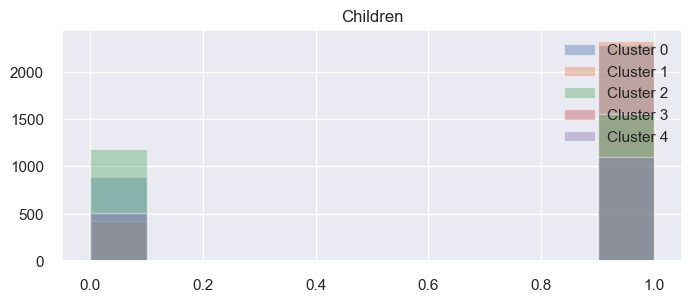

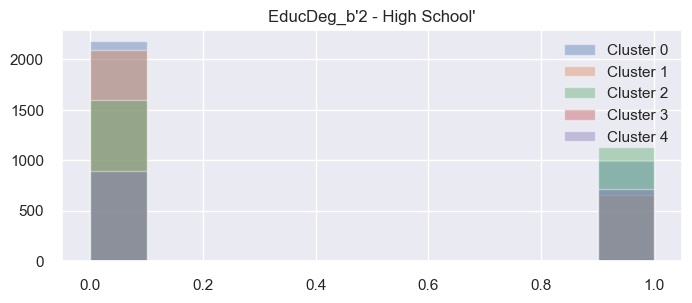

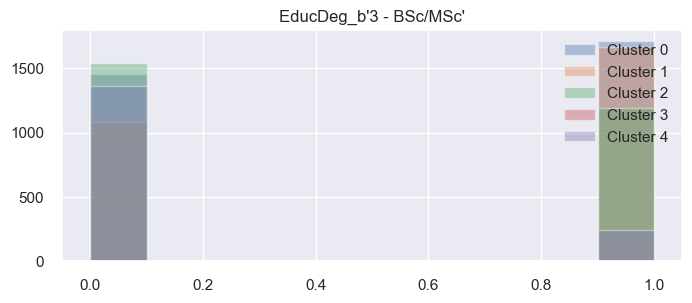

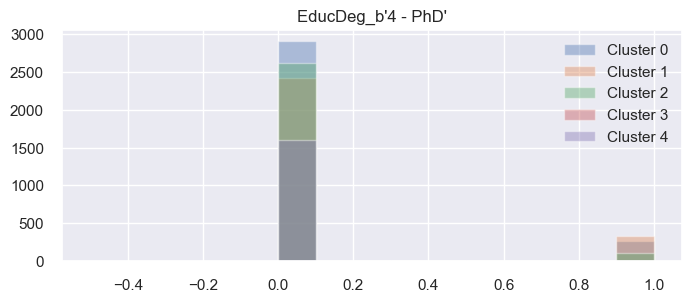

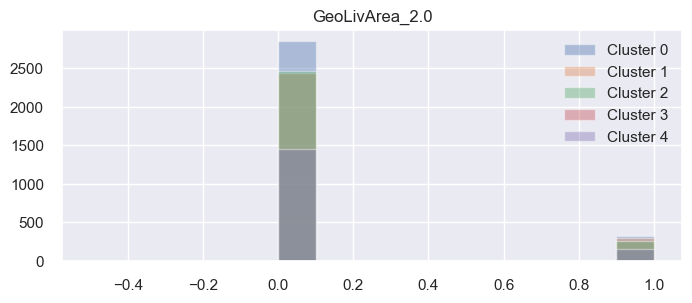

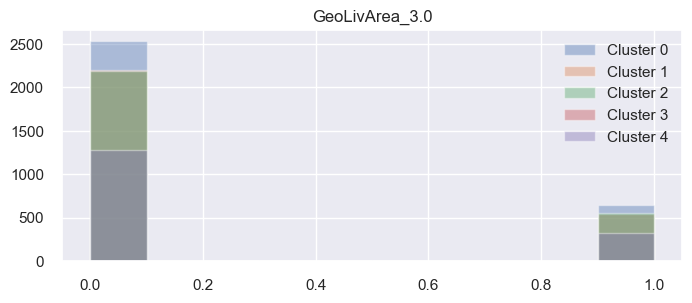

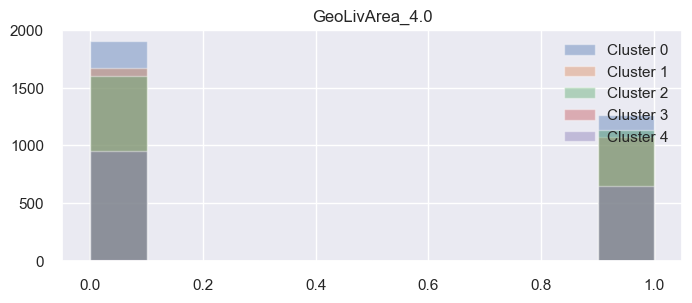

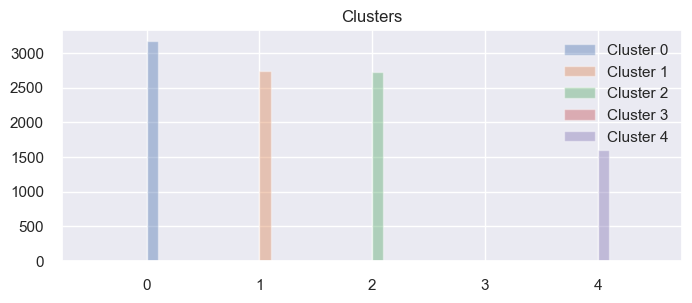

In [ ]:
for var in hc_non_metric_features:
    plt.rcParams["figure.figsize"] = (8,3)
    plt.title(var)
    plt.hist(df_km[var].loc[df_km['Clusters']==0], alpha=0.4, label = 'Cluster 0')
    plt.hist(df_km[var].loc[df_km['Clusters']==1], alpha=0.4, label = 'Cluster 1')
    plt.hist(df_km[var].loc[df_km['Clusters']==2], alpha=0.4, label = 'Cluster 2')
    plt.hist(df_km[var].loc[df_km['Clusters']==3], alpha=0.4, label = 'Cluster 3')
    plt.hist(df_km[var].loc[df_km['Clusters']==4], alpha=0.4, label = 'Cluster 4')
    plt.legend(loc='upper right')
    plt.show()

From the above graphics it can be seen that the clusters 0, 1, 2 and 4 can be distinguished relatively well in some of the variables. The cluster number 3 has very few records (see last graph in the non-metrics graphs).

In [ ]:
print("Cluster 3 has:",len(df_km[df_km['Clusters']==3]),"records")

Cluster 3 has: 5 records


In [ ]:
# Reviewing those records
df_km[df_km['Clusters']==3]

CustID  FirstPolYear  MonthSal Children  CustMonVal  ClaimsRate  \
655    656.0     -1.820588  0.792202      1.0  -62.107944   64.578217   
675    676.0      1.209220  1.969618      0.0  -50.171253   42.212143   
707    708.0      0.754749 -0.883273      1.0  -27.804835   23.234869   
917    918.0     -0.002703  0.869610      0.0  -25.118510   21.404918   
9648  9649.0      0.603258  1.092667      0.0  -35.803524   46.278702   

      PremMotor  PremHousehold  PremHealth  PremLife  PremWork  Total_Prem  \
655    0.818739      -0.384663   -0.983075 -0.080639 -0.402402   -0.373396   
675   -0.727072       0.342498    1.468555  0.229359 -0.036519    0.521702   
707   -0.885271       0.515664    1.704146  0.071885 -0.533870    0.555584   
917   -1.176681       0.384565    0.724385  1.024378  1.396179    0.463904   
9648   0.156020      -1.020345    1.042467 -0.810644 -0.814659   -1.116580   

      Client_Years  EducDeg_b'2 - High School'  EducDeg_b'3 - BSc/MSc'  \
655       1.820588                         0.0                     1.0   
675      -1.209220                         1.0                     0.0   
707      -0.754749                         0.0                     1.0   
917       0.002703                         1.0                     0.0   
9648     -0.603258                         0.0                     1.0   

      EducDeg_b'4 - PhD'  GeoLivArea_2.0  GeoLivArea_3.0  GeoLivArea_4.0  \
655                  0.0             0.0             1.0             0.0   
675                  0.0             0.0             0.0             0.0   
707                  0.0             0.0             0.0             0.0   
917                  0.0             0.0             0.0             1.0   
9648                 0.0             0.0             1.0             0.0   

      Clusters  
655          3  
675          3  
707          3  
917          3  
9648         3

In [ ]:
df_km[df_km['Clusters']==3].describe()

CustID  FirstPolYear  MonthSal  CustMonVal  ClaimsRate  PremMotor  \
count     5.000000      5.000000  5.000000    5.000000    5.000000   5.000000   
mean   2521.400000      0.148787  0.768165  -40.201213   39.541770  -0.362853   
std    3985.825235      1.183178  1.035243   15.650913   17.847978   0.826632   
min     656.000000     -1.820588 -0.883273  -62.107944   21.404918  -1.176681   
25%     676.000000     -0.002703  0.792202  -50.171253   23.234869  -0.885271   
50%     708.000000      0.603258  0.869610  -35.803524   42.212143  -0.727072   
75%     918.000000      0.754749  1.092667  -27.804835   46.278702   0.156020   
max    9649.000000      1.209220  1.969618  -25.118510   64.578217   0.818739   

       PremHousehold  PremHealth  PremLife  PremWork  Total_Prem  \
count       5.000000    5.000000  5.000000  5.000000    5.000000   
mean       -0.032456    0.791296  0.086868 -0.078254    0.010243   
std         0.654772    1.061594  0.658225  0.870438    0.738530   
min        -1.020345   -0.983075 -0.810644 -0.814659   -1.116580   
25%        -0.384663    0.724385 -0.080639 -0.533870   -0.373396   
50%         0.342498    1.042467  0.071885 -0.402402    0.463904   
75%         0.384565    1.468555  0.229359 -0.036519    0.521702   
max         0.515664    1.704146  1.024378  1.396179    0.555584   

       Client_Years  EducDeg_b'2 - High School'  EducDeg_b'3 - BSc/MSc'  \
count      5.000000                    5.000000                5.000000   
mean      -0.148787                    0.400000                0.600000   
std        1.183178                    0.547723                0.547723   
min       -1.209220                    0.000000                0.000000   
25%       -0.754749                    0.000000                0.000000   
50%       -0.603258                    0.000000                1.000000   
75%        0.002703                    1.000000                1.000000   
max        1.820588                    1.000000                1.000000   

       EducDeg_b'4 - PhD'  GeoLivArea_2.0  GeoLivArea_3.0  GeoLivArea_4.0  \
count                 5.0             5.0        5.000000        5.000000   
mean                  0.0             0.0        0.400000        0.200000   
std                   0.0             0.0        0.547723        0.447214   
min                   0.0             0.0        0.000000        0.000000   
25%                   0.0             0.0        0.000000        0.000000   
50%                   0.0             0.0        0.000000        0.000000   
75%                   0.0             0.0        1.000000        0.000000   
max                   0.0             0.0        1.000000        1.000000   

       Clusters  
count       5.0  
mean        3.0  
std         0.0  
min         3.0  
25%         3.0  
50%         3.0  
75%         3.0  
max         3.0

In [ ]:
# Change the Cluster to compare it to the Cluster 3
#(if you want you can compare with any other cluster changing the number of the cluster in the filter)
df_km[df_km['Clusters']==2].describe()

CustID  FirstPolYear     MonthSal   CustMonVal   ClaimsRate  \
count   2731.000000   2731.000000  2731.000000  2731.000000  2731.000000   
mean    5149.568290      0.716918     0.221326    -0.017397     0.016826   
std     2982.413012      0.622816     1.073921     0.349399     0.317079   
min        3.000000     -1.063136    -2.191061    -9.914942    -0.486724   
25%     2591.500000      0.300277    -0.756976    -0.170655    -0.120734   
50%     5176.000000      0.754749     0.407199    -0.014063     0.008041   
75%     7749.500000      1.209220     1.151742     0.113990     0.157148   
max    10290.000000      1.815182     2.539993     0.824390     9.544121   

         PremMotor  PremHousehold   PremHealth     PremLife     PremWork  \
count  2731.000000    2731.000000  2731.000000  2731.000000  2731.000000   
mean     -0.542979       0.012133     0.800745     0.179635     0.183248   
std       0.510309       0.623930     0.818973     0.847926     0.857579   
min      -2.020188      -1.218217    -1.583190    -1.078124    -1.203730   
25%      -0.892534      -0.451436     0.208988    -0.435631    -0.428140   
50%      -0.501033      -0.073054     0.776904     0.004397     0.009855   
75%      -0.135390       0.426633     1.374049     0.601898     0.579317   
max       0.773371       2.331230     3.708626     3.622023     3.537226   

        Total_Prem  Client_Years  EducDeg_b'2 - High School'  \
count  2731.000000   2731.000000                 2731.000000   
mean      0.017547     -0.716918                    0.415233   
std       0.641945      0.622816                    0.492852   
min      -1.648224     -1.815182                    0.000000   
25%      -0.456135     -1.209220                    0.000000   
50%      -0.049859     -0.754749                    0.000000   
75%       0.451946     -0.300277                    1.000000   
max       2.345337      1.063136                    1.000000   

       EducDeg_b'3 - BSc/MSc'  EducDeg_b'4 - PhD'  GeoLivArea_2.0  \
count             2731.000000         2731.000000     2731.000000   
mean                 0.434639            0.039912        0.095569   
std                  0.495800            0.195789        0.294054   
min                  0.000000            0.000000        0.000000   
25%                  0.000000            0.000000        0.000000   
50%                  0.000000            0.000000        0.000000   
75%                  1.000000            0.000000        0.000000   
max                  1.000000            1.000000        1.000000   

       GeoLivArea_3.0  GeoLivArea_4.0  Clusters  
count     2731.000000     2731.000000    2731.0  
mean         0.201025        0.414134       2.0  
std          0.400840        0.492662       0.0  
min          0.000000        0.000000       2.0  
25%          0.000000        0.000000       2.0  
50%          0.000000        0.000000       2.0  
75%          0.000000        1.000000       2.0  
max          1.000000        1.000000       2.0

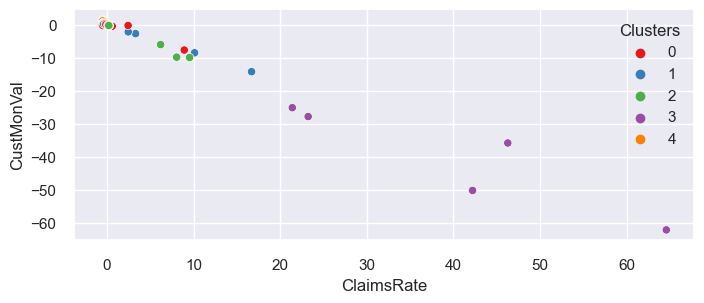

In [ ]:
# Graph CustMonVal vs ClaimsRate
sns.scatterplot(x="ClaimsRate", y="CustMonVal", data=df_km, hue="Clusters", palette='Set1');

What is happening is that Cluster 3 keeps records with very low values in `CustMonVal`, while it has high values in `ClaimsRate` variable.

Now, we will analyze the clusters obtained with k-means algorithm

# 6. Cluster Analysis <a name="ClusterAnalysis"></a>
<hr style="border:2px solid gray">

The clustering algorithm that we will keep is going to be k-means, and we will consider 5 clusters.
Before analyzing each cluster, we will apply the inverse of the standarization that we previously did.

In [ ]:
# To obtain original values (without standarization, like an inverse of what we did)
df_original = df.copy()
df_original[metric_features] = scaler.inverse_transform(df[metric_features])
df_original.head(10)

CustID  FirstPolYear  MonthSal Children  CustMonVal  ClaimsRate  PremMotor  \
0     1.0        1985.0    2177.0      1.0      380.97        0.39     375.85   
1     2.0        1981.0     677.0      1.0     -131.13        1.12      77.46   
2     3.0        1991.0    2277.0      0.0      504.67        0.28     206.15   
3     4.0        1990.0    1099.0      1.0      -16.99        0.99     182.48   
4     5.0        1986.0    1763.0      1.0       35.23        0.90     338.62   
5     6.0        1986.0    2566.0      1.0      -24.33        1.00     440.75   
6     7.0        1979.0    4103.0      0.0      -66.01        1.05     156.92   
7     8.0        1988.0    1743.0      1.0     -144.91        1.13     248.27   
8     9.0        1981.0    1862.0      1.0      356.53        0.36     344.51   
9    10.0        1976.0    3842.0      0.0     -119.35        1.12     209.26   

   PremHousehold  PremHealth  PremLife  PremWork  Total_Prem  Client_Years  \
0          79.45      146.36     47.01     16.89      665.56          31.0   
1         416.20      116.69    194.48    106.13      910.96          35.0   
2         224.50      124.58     86.35     99.02      740.60          25.0   
3          43.35      311.17     35.34     28.34      600.68          26.0   
4          47.80      182.59     18.78     41.45      629.24          30.0   
5          18.90      114.80      7.00      7.67      589.12          30.0   
6         295.60      317.95     14.67     26.34      811.48          37.0   
7         397.30      144.36     66.68     53.23      909.84          28.0   
8          18.35      210.04      8.78      9.89      591.57          35.0   
9         182.25      271.94     39.23     55.12      757.80          40.0   

   EducDeg_b'2 - High School'  EducDeg_b'3 - BSc/MSc'  EducDeg_b'4 - PhD'  \
0                         1.0                     0.0                 0.0   
1                         1.0                     0.0                 0.0   
2                         0.0                     0.0                 0.0   
3                         0.0                     1.0                 0.0   
4                         0.0                     1.0                 0.0   
5                         1.0                     0.0                 0.0   
6                         1.0                     0.0                 0.0   
7                         1.0                     0.0                 0.0   
8                         0.0                     1.0                 0.0   
9                         0.0                     1.0                 0.0   

   GeoLivArea_2.0  GeoLivArea_3.0  GeoLivArea_4.0  
0             0.0             0.0             0.0  
1             0.0             0.0             1.0  
2             0.0             1.0             0.0  
3             0.0             0.0             1.0  
4             0.0             0.0             1.0  
5             0.0             0.0             1.0  
6             0.0             0.0             1.0  
7             0.0             0.0             1.0  
8             0.0             0.0             0.0  
9             0.0             0.0             0.0

In [ ]:
df_original['Clusters'] = pd.Series(df_labels_km, index=df_original.index)
df_original.set_index("CustID")
df_original.head()

CustID  FirstPolYear  MonthSal Children  CustMonVal  ClaimsRate  PremMotor  \
0     1.0        1985.0    2177.0      1.0      380.97        0.39     375.85   
1     2.0        1981.0     677.0      1.0     -131.13        1.12      77.46   
2     3.0        1991.0    2277.0      0.0      504.67        0.28     206.15   
3     4.0        1990.0    1099.0      1.0      -16.99        0.99     182.48   
4     5.0        1986.0    1763.0      1.0       35.23        0.90     338.62   

   PremHousehold  PremHealth  PremLife  PremWork  Total_Prem  Client_Years  \
0          79.45      146.36     47.01     16.89      665.56          31.0   
1         416.20      116.69    194.48    106.13      910.96          35.0   
2         224.50      124.58     86.35     99.02      740.60          25.0   
3          43.35      311.17     35.34     28.34      600.68          26.0   
4          47.80      182.59     18.78     41.45      629.24          30.0   

   EducDeg_b'2 - High School'  EducDeg_b'3 - BSc/MSc'  EducDeg_b'4 - PhD'  \
0                         1.0                     0.0                 0.0   
1                         1.0                     0.0                 0.0   
2                         0.0                     0.0                 0.0   
3                         0.0                     1.0                 0.0   
4                         0.0                     1.0                 0.0   

   GeoLivArea_2.0  GeoLivArea_3.0  GeoLivArea_4.0  Clusters  
0             0.0             0.0             0.0         1  
1             0.0             0.0             1.0         4  
2             0.0             1.0             0.0         2  
3             0.0             0.0             1.0         2  
4             0.0             0.0             1.0         1

---

## 6.1 Cluster 0 <a name="Cluster0"></a>

In [ ]:
df_original[df_original['Clusters'] == 0].describe()

CustID  FirstPolYear     MonthSal   CustMonVal  ClaimsRate  \
count   3172.000000   3172.000000  3172.000000  3172.000000  3172.00000   
mean    5166.691047   1979.087957  2644.337642   191.323301     0.69053   
std     2978.935984      2.936115   900.915408   253.688810     0.38884   
min        7.000000   1974.000000   333.000000 -7851.170000     0.00000   
25%     2535.750000   1977.000000  1896.250000    -7.605000     0.41000   
50%     5176.000000   1979.000000  2658.000000   184.095000     0.71000   
75%     7711.250000   1981.000000  3363.250000   366.767500     0.97000   
max    10295.000000   1986.000000  5021.000000   972.530000    13.90000   

         PremMotor  PremHousehold   PremHealth     PremLife     PremWork  \
count  3172.000000    3172.000000  3172.000000  3172.000000  3172.000000   
mean    331.099137     131.903638   172.065506    29.459827    29.172289   
std     101.380868     121.589235    68.921328    28.743125    28.597903   
min      32.560000     -75.000000     5.780000    -7.000000   -12.000000   
25%     260.132500      43.900000   121.580000     9.780000     9.670000   
50%     331.840000     107.250000   169.310000    22.450000    22.560000   
75%     403.300000     201.700000   218.040000    42.120000    42.120000   
max     585.220000     725.150000   401.630000   201.930000   192.470000   

        Total_Prem  Client_Years  EducDeg_b'2 - High School'  \
count  3172.000000   3172.000000                 3172.000000   
mean    693.700397     36.912043                    0.312421   
std     102.479646      2.936115                    0.463554   
min     416.534000     30.000000                    0.000000   
25%     618.082500     35.000000                    0.000000   
50%     677.680000     37.000000                    0.000000   
75%     756.360000     39.000000                    1.000000   
max    1137.230000     42.000000                    1.000000   

       EducDeg_b'3 - BSc/MSc'  EducDeg_b'4 - PhD'  GeoLivArea_2.0  \
count             3172.000000         3172.000000     3172.000000   
mean                 0.540038            0.081967        0.100252   
std                  0.498473            0.274358        0.300383   
min                  0.000000            0.000000        0.000000   
25%                  0.000000            0.000000        0.000000   
50%                  1.000000            0.000000        0.000000   
75%                  1.000000            0.000000        0.000000   
max                  1.000000            1.000000        1.000000   

       GeoLivArea_3.0  GeoLivArea_4.0  Clusters  
count     3172.000000     3172.000000    3172.0  
mean         0.201450        0.399433       0.0  
std          0.401147        0.489859       0.0  
min          0.000000        0.000000       0.0  
25%          0.000000        0.000000       0.0  
50%          0.000000        0.000000       0.0  
75%          0.000000        1.000000       0.0  
max          1.000000        1.000000       0.0

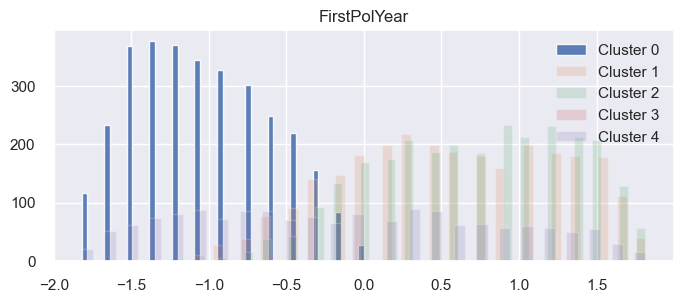

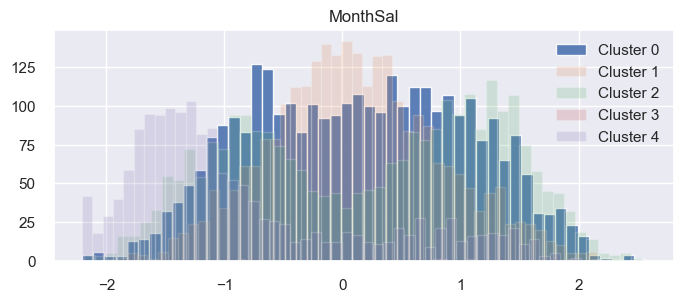

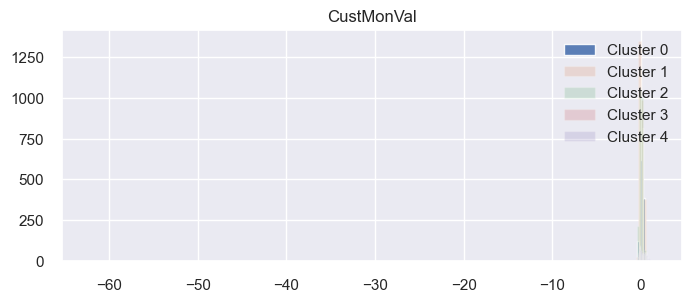

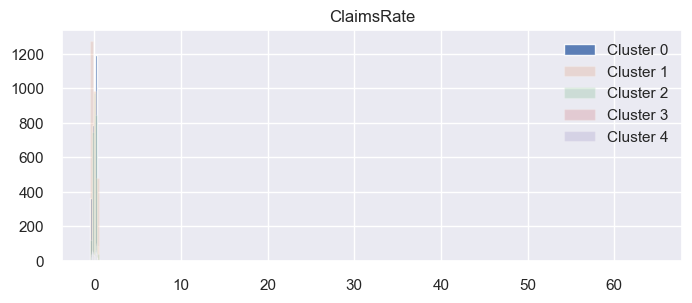

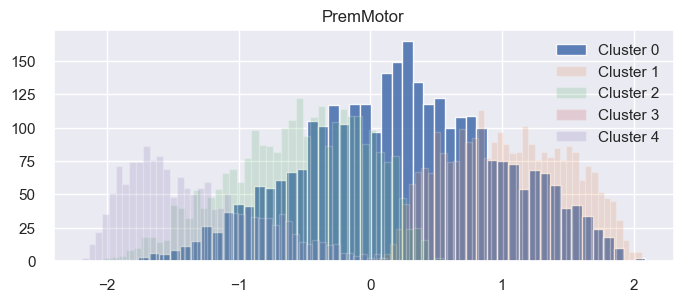

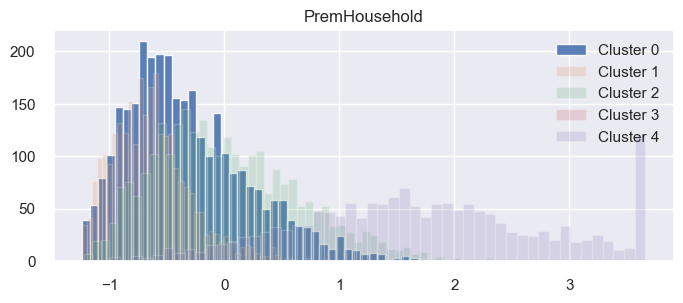

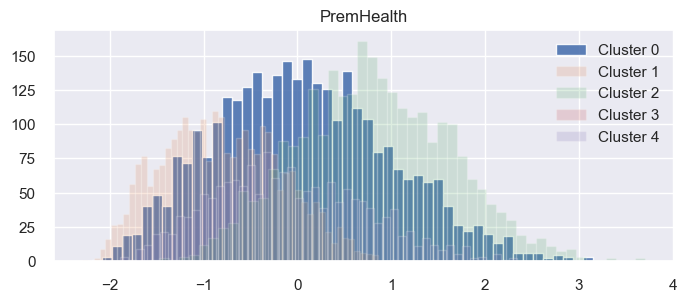

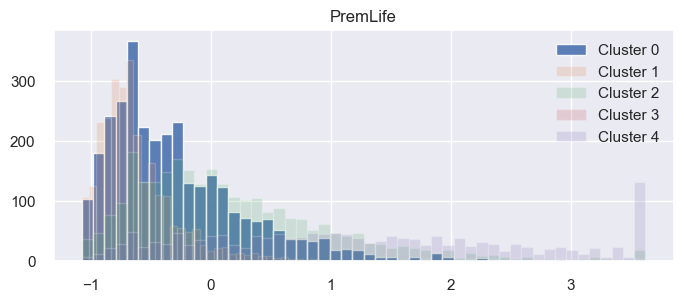

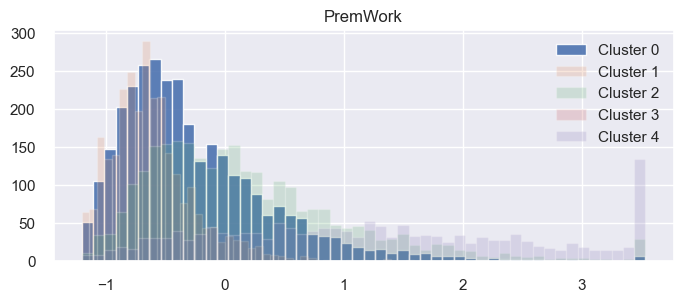

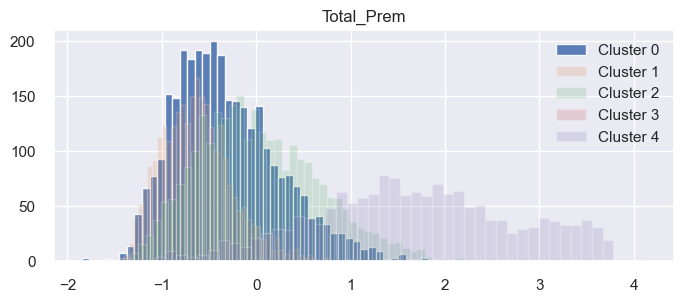

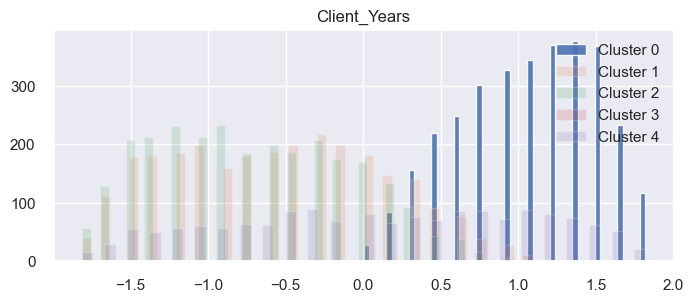

In [ ]:
for var in metric_features:
    plt.rcParams["figure.figsize"] = (8,3)
    plt.title(var)
    plt.hist(df_km[var].loc[df_km['Clusters']==0], alpha=0.9, label = 'Cluster 0', bins = 50)
    plt.hist(df_km[var].loc[df_km['Clusters']==1], alpha=0.2, label = 'Cluster 1', bins = 50)
    plt.hist(df_km[var].loc[df_km['Clusters']==2], alpha=0.2, label = 'Cluster 2', bins = 50)
    plt.hist(df_km[var].loc[df_km['Clusters']==3], alpha=0.2, label = 'Cluster 3', bins = 50)
    plt.hist(df_km[var].loc[df_km['Clusters']==4], alpha=0.2, label = 'Cluster 4', bins = 50)
    plt.legend(loc='upper right')
    plt.show()

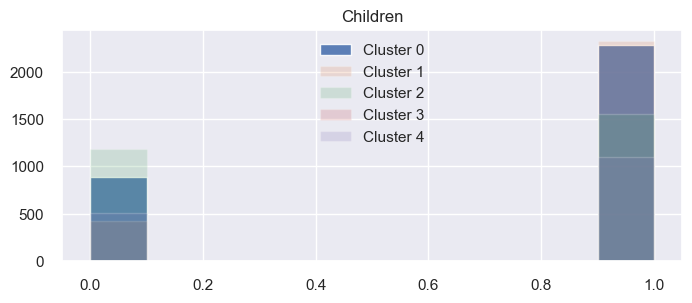

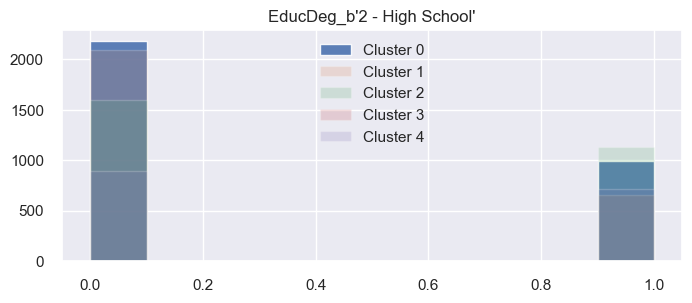

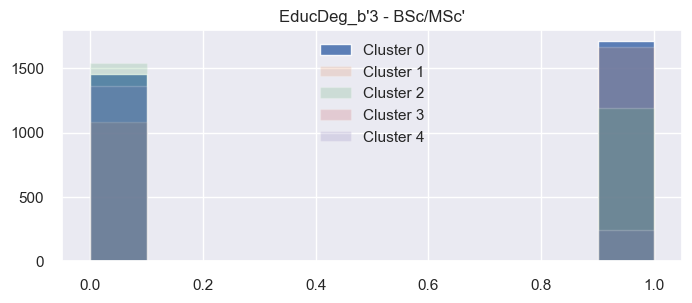

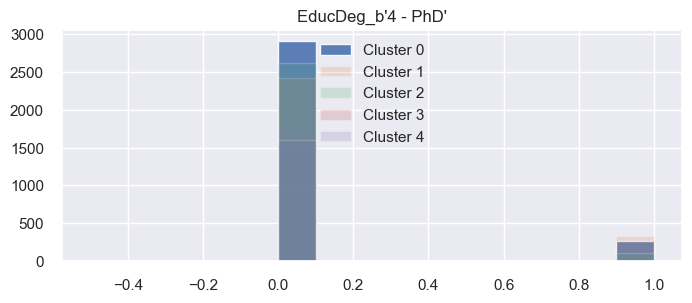

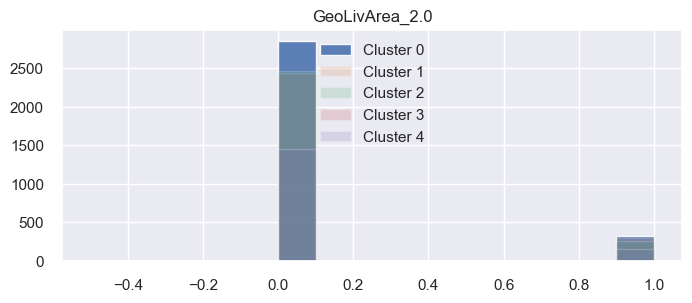

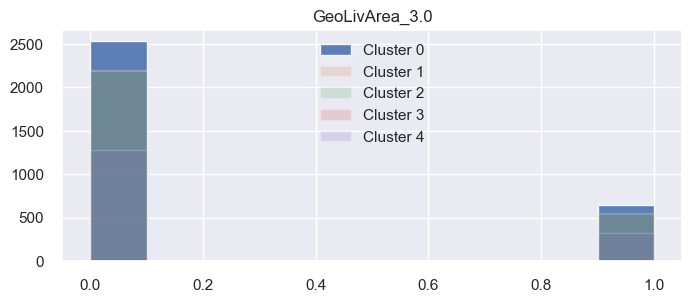

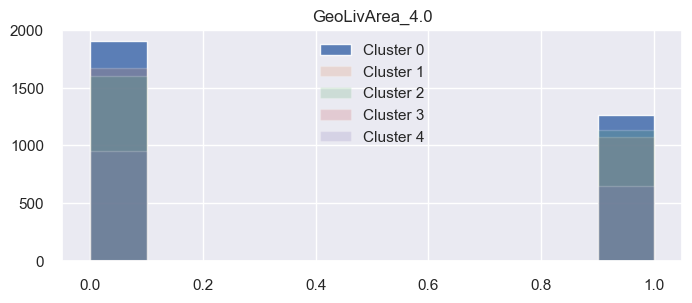

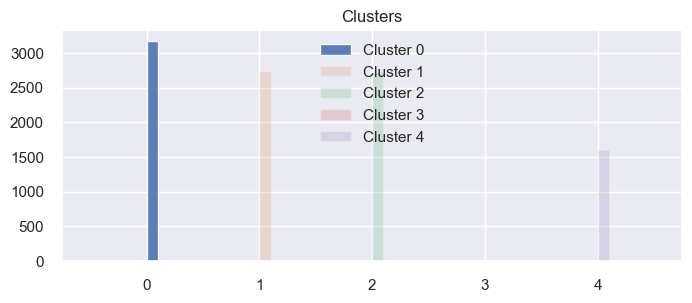

In [ ]:
for var in hc_non_metric_features:
    plt.rcParams["figure.figsize"] = (8,3)
    plt.title(var)
    plt.hist(df_km[var].loc[df_km['Clusters']==0], alpha=0.9, label = 'Cluster 0')
    plt.hist(df_km[var].loc[df_km['Clusters']==1], alpha=0.2, label = 'Cluster 1')
    plt.hist(df_km[var].loc[df_km['Clusters']==2], alpha=0.2, label = 'Cluster 2')
    plt.hist(df_km[var].loc[df_km['Clusters']==3], alpha=0.2, label = 'Cluster 3')
    plt.hist(df_km[var].loc[df_km['Clusters']==4], alpha=0.2, label = 'Cluster 4')
    plt.legend(loc='upper center')
    plt.show()

---

---

## 6.2 Cluster 1 <a name="Cluster1"></a>

In [ ]:
df_original[df_original['Clusters'] == 1].describe()

CustID  FirstPolYear     MonthSal    CustMonVal   ClaimsRate  \
count   2743.000000   2743.000000  2743.000000   2743.000000  2743.000000   
mean    5062.386803   1989.775064  2608.654903    199.189424     0.647751   
std     2933.332425      4.489887   707.388185    412.918038     0.677725   
min        1.000000   1978.000000   539.000000 -14714.080000     0.000000   
25%     2549.500000   1986.000000  2126.000000    -25.000000     0.250000   
50%     5007.000000   1990.000000  2572.000000    163.470000     0.720000   
75%     7552.500000   1994.000000  3068.000000    434.985000     1.000000   
max    10296.000000   1998.000000  4786.000000    794.590000    25.360000   

         PremMotor  PremHousehold   PremHealth     PremLife     PremWork  \
count  2743.000000    2743.000000  2743.000000  2743.000000  2743.000000   
mean    441.295202      59.912001   108.248772    13.316866    13.093989   
std      63.045103      77.047734    46.277416    14.765231    15.128689   
min     252.270000     -75.000000    -2.110000    -7.000000   -12.000000   
25%     390.630000       4.450000    73.180000     3.890000     3.000000   
50%     439.860000      53.350000   106.020000     9.890000    10.890000   
75%     492.650000      99.450000   142.305000    18.780000    19.780000   
max     581.330000     422.300000   231.820000   129.470000   124.800000   

        Total_Prem  Client_Years  EducDeg_b'2 - High School'  \
count  2743.000000   2743.000000                 2743.000000   
mean    635.866830     26.224936                    0.238790   
std      68.169205      4.489887                    0.426422   
min     479.200000     18.000000                    0.000000   
25%     586.055000     22.000000                    0.000000   
50%     632.010000     26.000000                    0.000000   
75%     676.903000     30.000000                    0.000000   
max     929.400000     38.000000                    1.000000   

       EducDeg_b'3 - BSc/MSc'  EducDeg_b'4 - PhD'  GeoLivArea_2.0  \
count             2743.000000         2743.000000     2743.000000   
mean                 0.605906            0.119577        0.109369   
std                  0.488744            0.324526        0.312159   
min                  0.000000            0.000000        0.000000   
25%                  0.000000            0.000000        0.000000   
50%                  1.000000            0.000000        0.000000   
75%                  1.000000            0.000000        0.000000   
max                  1.000000            1.000000        1.000000   

       GeoLivArea_3.0  GeoLivArea_4.0  Clusters  
count     2743.000000     2743.000000    2743.0  
mean         0.197958        0.392271       1.0  
std          0.398533        0.488346       0.0  
min          0.000000        0.000000       1.0  
25%          0.000000        0.000000       1.0  
50%          0.000000        0.000000       1.0  
75%          0.000000        1.000000       1.0  
max          1.000000        1.000000       1.0

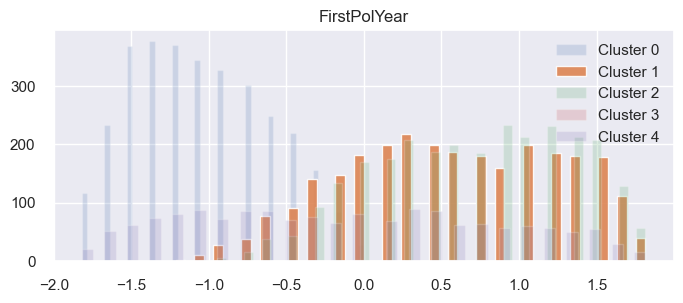

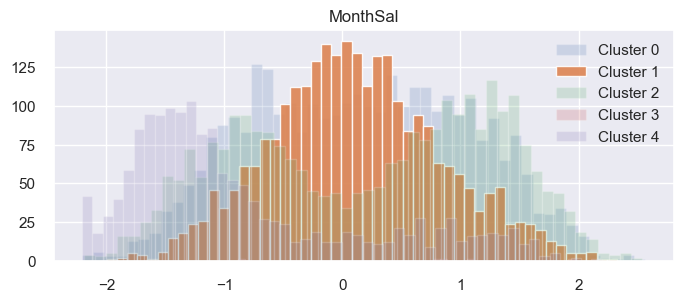

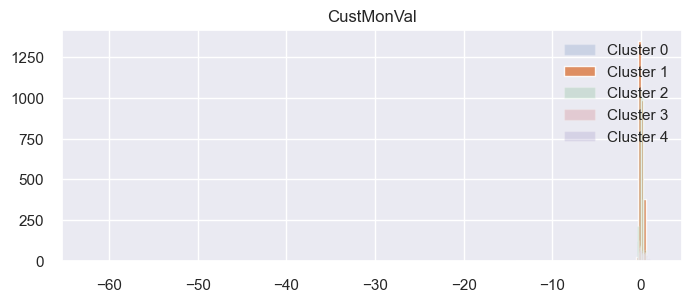

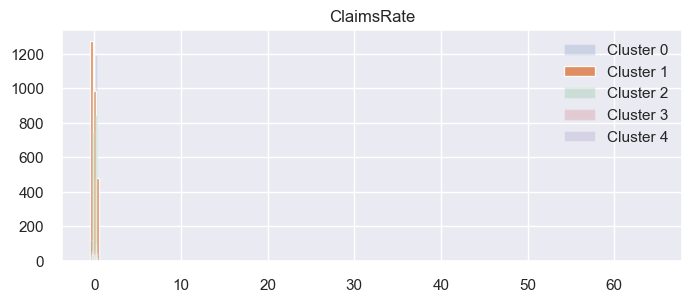

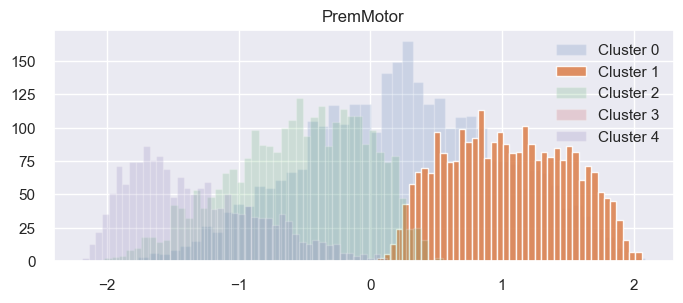

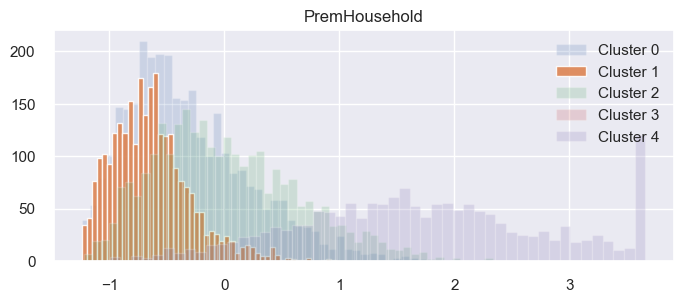

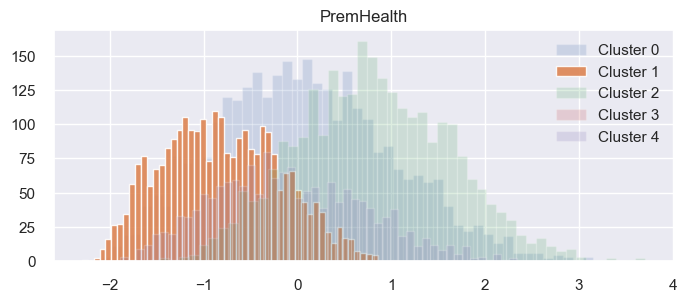

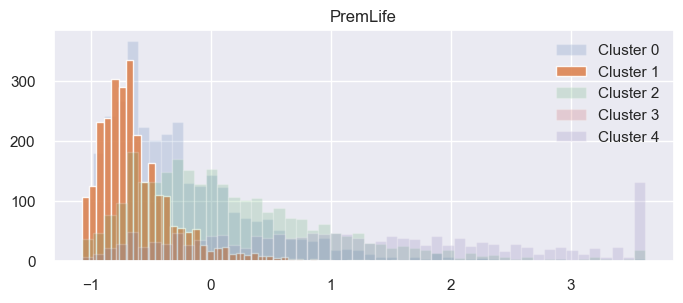

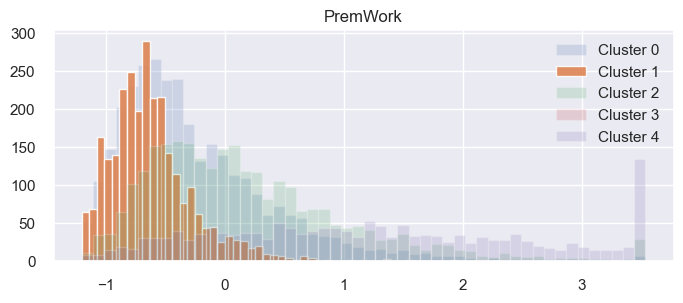

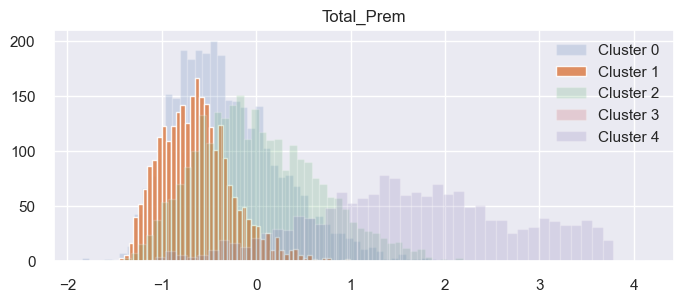

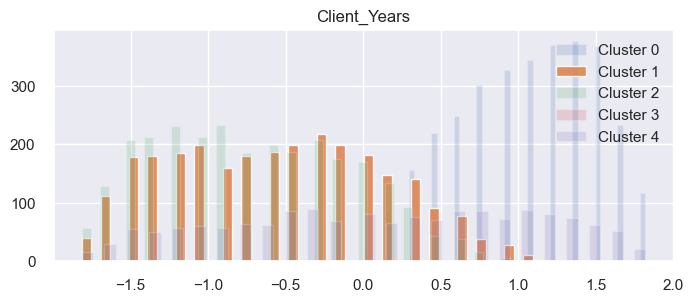

In [ ]:
for var in metric_features:
    plt.rcParams["figure.figsize"] = (8,3)
    plt.title(var)
    plt.hist(df_km[var].loc[df_km['Clusters']==0], alpha=0.2, label = 'Cluster 0', bins = 50)
    plt.hist(df_km[var].loc[df_km['Clusters']==1], alpha=0.9, label = 'Cluster 1', bins = 50)
    plt.hist(df_km[var].loc[df_km['Clusters']==2], alpha=0.2, label = 'Cluster 2', bins = 50)
    plt.hist(df_km[var].loc[df_km['Clusters']==3], alpha=0.2, label = 'Cluster 3', bins = 50)
    plt.hist(df_km[var].loc[df_km['Clusters']==4], alpha=0.2, label = 'Cluster 4', bins = 50)
    plt.legend(loc='upper right')
    plt.show()

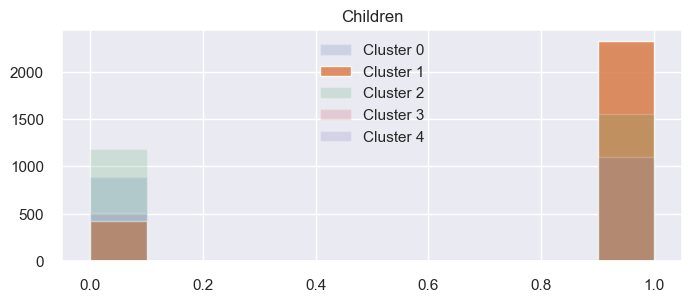

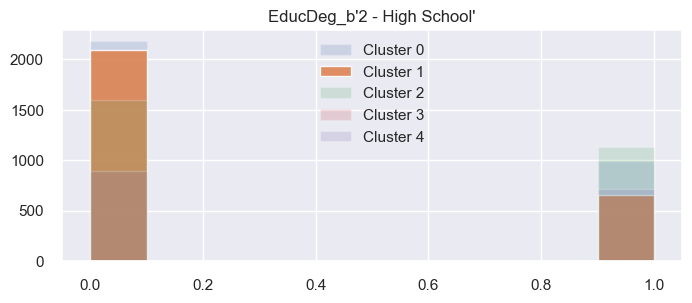

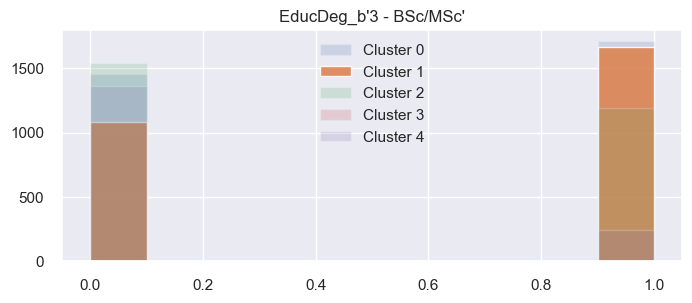

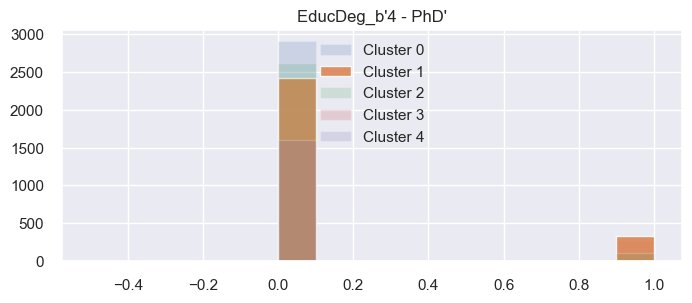

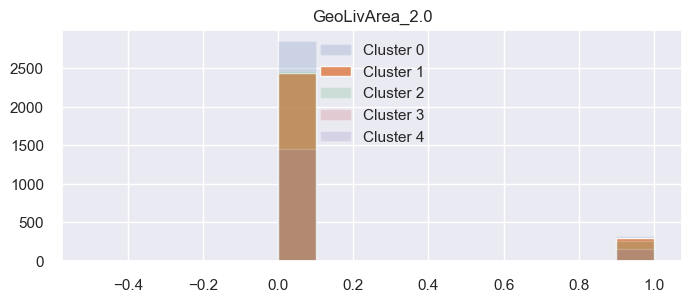

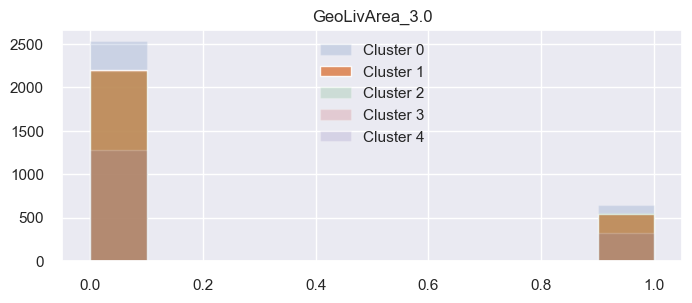

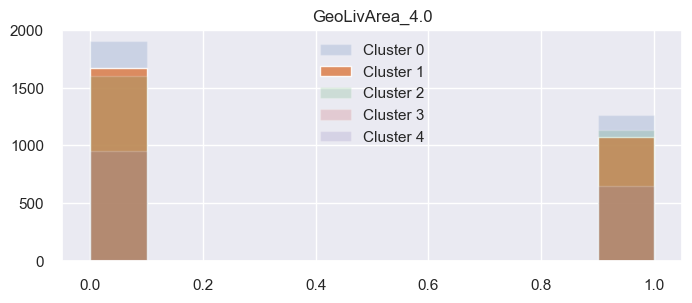

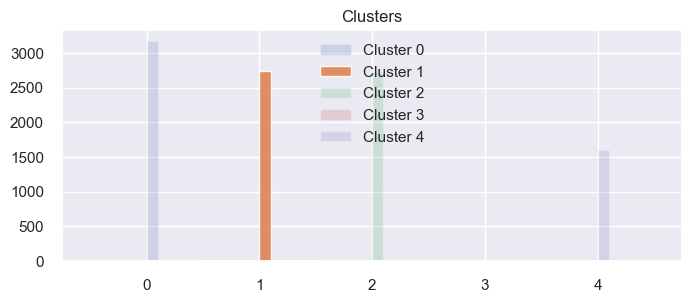

In [ ]:
for var in hc_non_metric_features:
    plt.rcParams["figure.figsize"] = (8,3)
    plt.title(var)
    plt.hist(df_km[var].loc[df_km['Clusters']==0], alpha=0.2, label = 'Cluster 0')
    plt.hist(df_km[var].loc[df_km['Clusters']==1], alpha=0.9, label = 'Cluster 1')
    plt.hist(df_km[var].loc[df_km['Clusters']==2], alpha=0.2, label = 'Cluster 2')
    plt.hist(df_km[var].loc[df_km['Clusters']==3], alpha=0.2, label = 'Cluster 3')
    plt.hist(df_km[var].loc[df_km['Clusters']==4], alpha=0.2, label = 'Cluster 4')
    plt.legend(loc='upper center')
    plt.show()

---

## 6.3 Cluster 2 <a name="Cluster2"></a>

In [ ]:
df_original[df_original['Clusters'] == 2].describe()

CustID  FirstPolYear     MonthSal    CustMonVal   ClaimsRate  \
count   2731.000000   2731.000000  2731.000000   2731.000000  2731.000000   
mean    5149.568290   1990.750275  2718.508239    172.546283     0.742962   
std     2982.413012      4.111259  1054.387653    366.128748     0.467833   
min        3.000000   1979.000000   350.000000 -10198.910000     0.000000   
25%     2591.500000   1988.000000  1758.000000     11.950000     0.540000   
50%     5176.000000   1991.000000  2901.000000    176.040000     0.730000   
75%     7749.500000   1994.000000  3632.000000    310.225000     0.950000   
max    10290.000000   1998.000000  4995.000000   1054.640000    14.800000   

         PremMotor  PremHousehold   PremHealth     PremLife     PremWork  \
count  2731.000000    2731.000000  2731.000000  2731.000000  2731.000000   
mean    222.825099     206.386466   227.475885    48.909659    47.818181   
std      70.256869     140.160076    60.660604    37.691831    36.986058   
min      19.450000     -70.000000    50.900000    -7.000000   -12.000000   
25%     174.700000     102.250000   183.645000    21.560000    21.450000   
50%     228.600000     187.250000   225.710000    41.120000    40.340000   
75%     278.940000     299.500000   269.940000    67.680000    64.900000   
max     404.054000     727.350000   442.860000   201.930000   192.470000   

       Total_Prem  Client_Years  EducDeg_b'2 - High School'  \
count  2731.00000   2731.000000                 2731.000000   
mean    753.41529     25.249725                    0.415233   
std     115.95339      4.111259                    0.492852   
min     452.53000     18.000000                    0.000000   
25%     667.85500     22.000000                    0.000000   
50%     741.24000     25.000000                    0.000000   
75%     831.88000     28.000000                    1.000000   
max    1173.88000     37.000000                    1.000000   

       EducDeg_b'3 - BSc/MSc'  EducDeg_b'4 - PhD'  GeoLivArea_2.0  \
count             2731.000000         2731.000000     2731.000000   
mean                 0.434639            0.039912        0.095569   
std                  0.495800            0.195789        0.294054   
min                  0.000000            0.000000        0.000000   
25%                  0.000000            0.000000        0.000000   
50%                  0.000000            0.000000        0.000000   
75%                  1.000000            0.000000        0.000000   
max                  1.000000            1.000000        1.000000   

       GeoLivArea_3.0  GeoLivArea_4.0  Clusters  
count     2731.000000     2731.000000    2731.0  
mean         0.201025        0.414134       2.0  
std          0.400840        0.492662       0.0  
min          0.000000        0.000000       2.0  
25%          0.000000        0.000000       2.0  
50%          0.000000        0.000000       2.0  
75%          0.000000        1.000000       2.0  
max          1.000000        1.000000       2.0

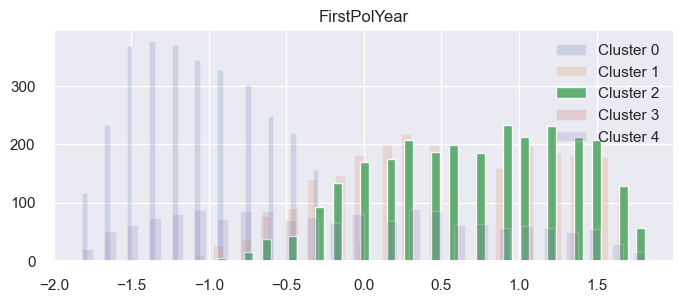

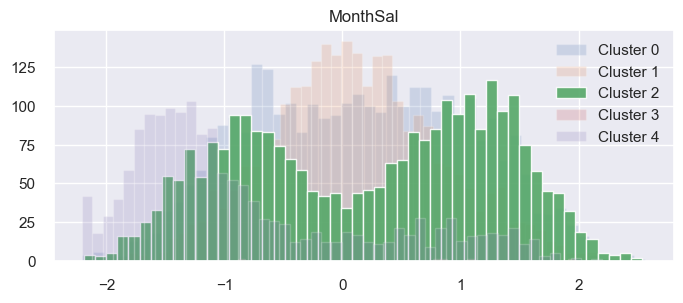

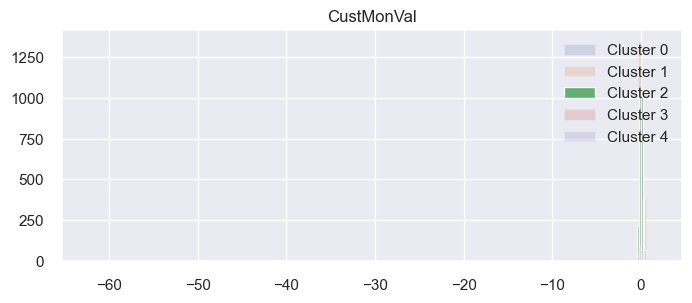

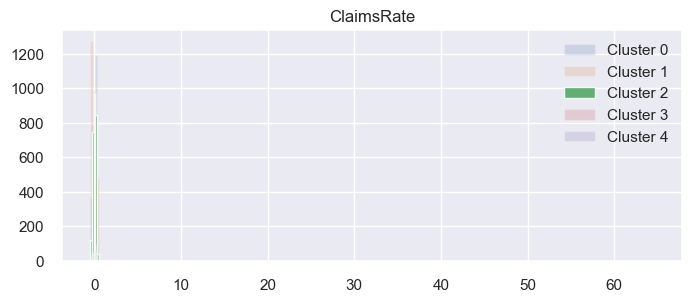

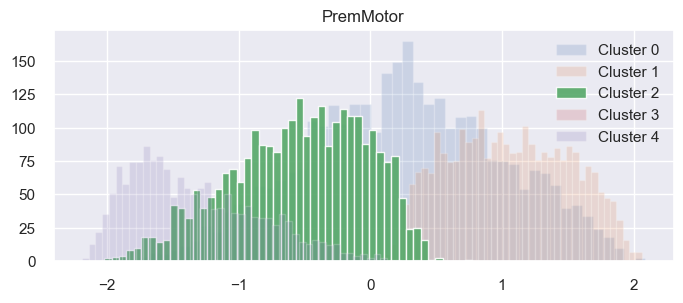

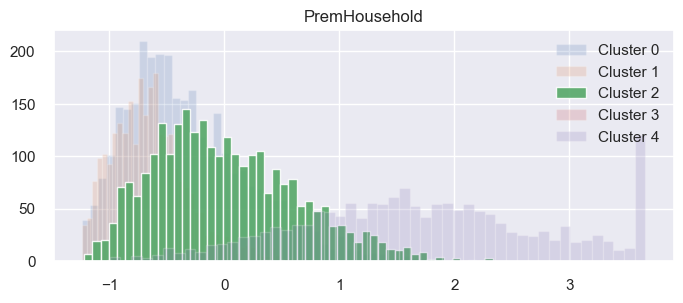

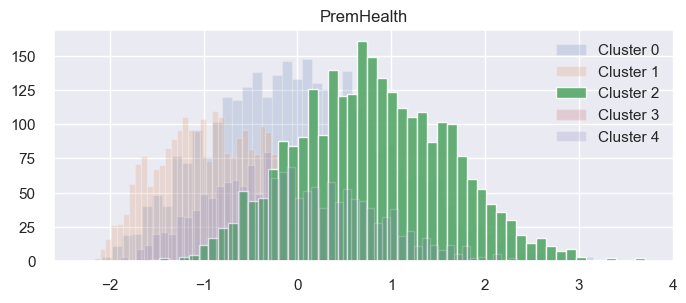

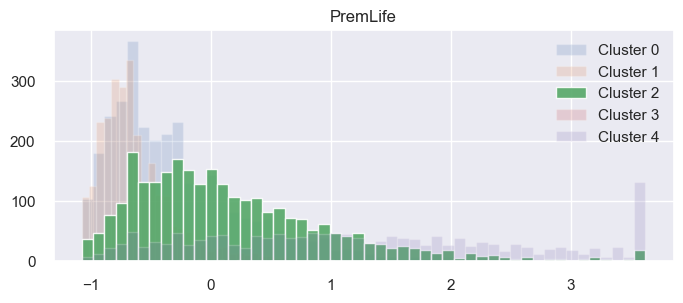

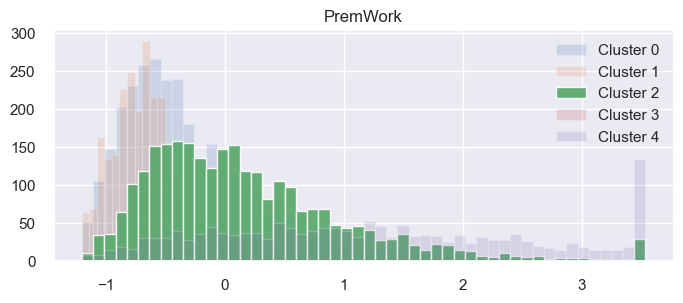

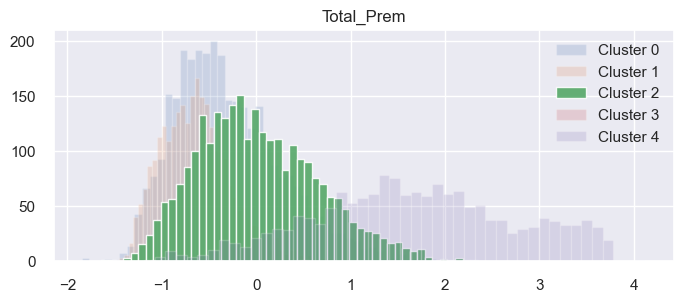

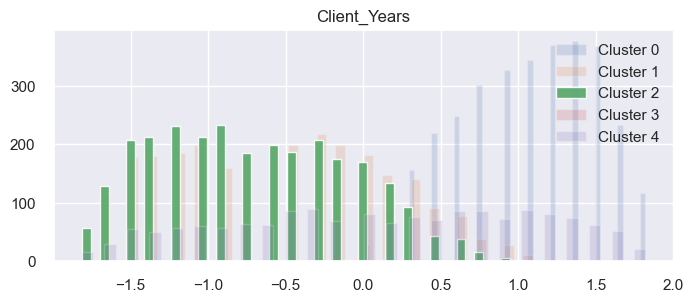

In [ ]:
for var in metric_features:
    plt.rcParams["figure.figsize"] = (8,3)
    plt.title(var)
    plt.hist(df_km[var].loc[df_km['Clusters']==0], alpha=0.2, label = 'Cluster 0', bins = 50)
    plt.hist(df_km[var].loc[df_km['Clusters']==1], alpha=0.2, label = 'Cluster 1', bins = 50)
    plt.hist(df_km[var].loc[df_km['Clusters']==2], alpha=0.9, label = 'Cluster 2', bins = 50)
    plt.hist(df_km[var].loc[df_km['Clusters']==3], alpha=0.2, label = 'Cluster 3', bins = 50)
    plt.hist(df_km[var].loc[df_km['Clusters']==4], alpha=0.2, label = 'Cluster 4', bins = 50)
    plt.legend(loc='upper right')
    plt.show()

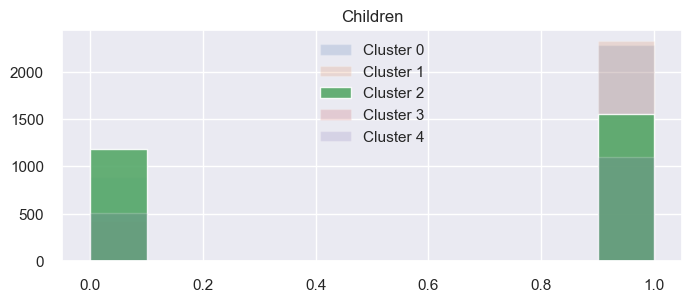

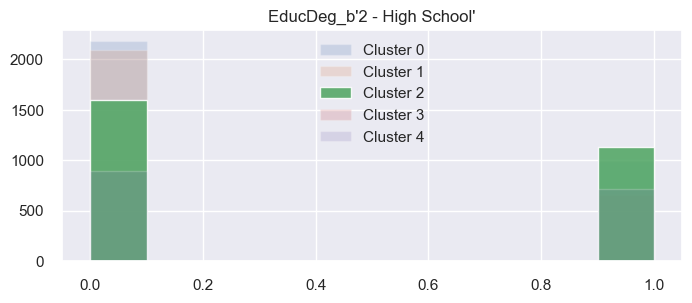

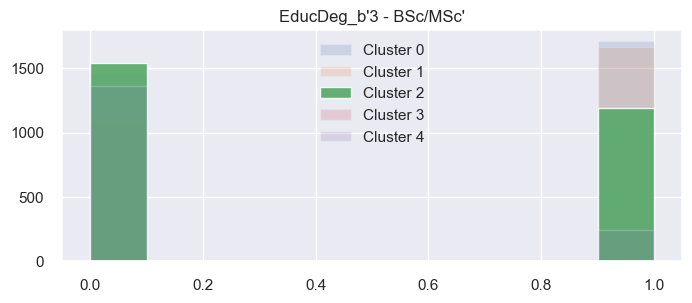

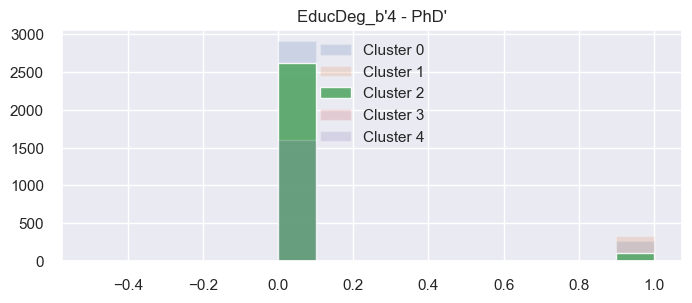

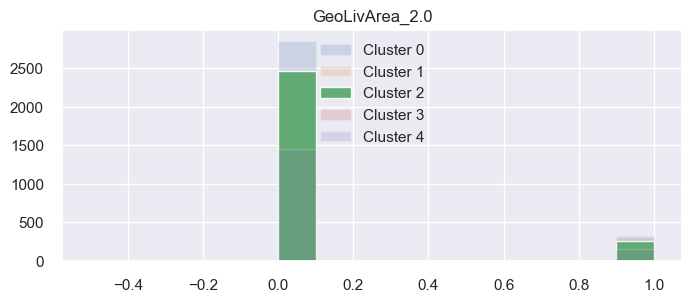

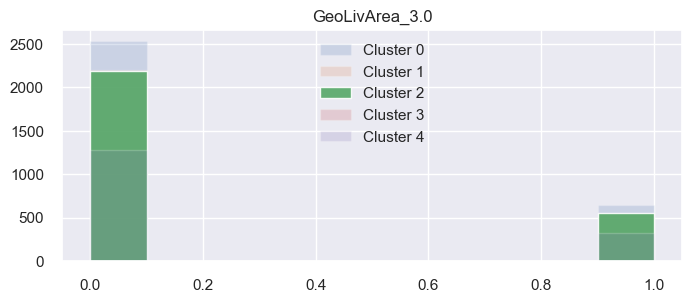

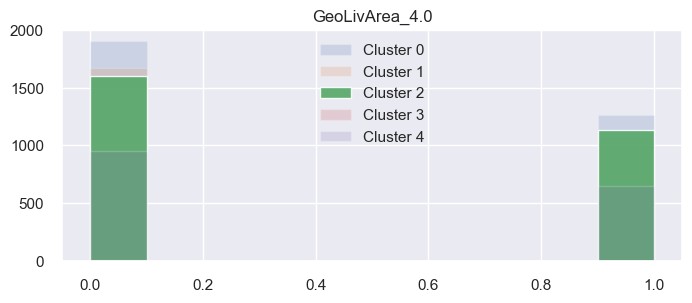

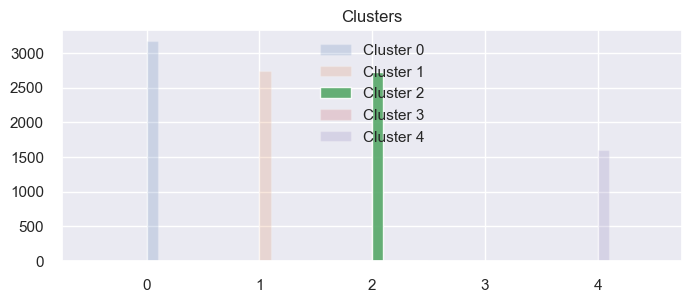

In [ ]:
for var in hc_non_metric_features:
    plt.rcParams["figure.figsize"] = (8,3)
    plt.title(var)
    plt.hist(df_km[var].loc[df_km['Clusters']==0], alpha=0.2, label = 'Cluster 0')
    plt.hist(df_km[var].loc[df_km['Clusters']==1], alpha=0.2, label = 'Cluster 1')
    plt.hist(df_km[var].loc[df_km['Clusters']==2], alpha=0.9, label = 'Cluster 2')
    plt.hist(df_km[var].loc[df_km['Clusters']==3], alpha=0.2, label = 'Cluster 3')
    plt.hist(df_km[var].loc[df_km['Clusters']==4], alpha=0.2, label = 'Cluster 4')
    plt.legend(loc='upper center')
    plt.show()

---

## 6.4 Cluster 3 <a name="Cluster3"></a>

In [ ]:
df_original[df_original['Clusters'] == 3].describe()

CustID  FirstPolYear     MonthSal    CustMonVal  ClaimsRate  \
count     5.000000       5.00000     5.000000      5.000000    5.000000   
mean   2521.400000    1987.00000  3255.400000 -41935.338000   59.060000   
std    3985.825235       7.81025  1016.412465  16400.305333   26.333781   
min     656.000000    1974.00000  1634.000000 -64891.000000   32.300000   
25%     676.000000    1986.00000  3279.000000 -52382.760000   35.000000   
50%     708.000000    1990.00000  3355.000000 -37327.080000   63.000000   
75%     918.000000    1991.00000  3574.000000 -28945.400000   69.000000   
max    9649.000000    1994.00000  4435.000000 -26130.450000   96.000000   

       PremMotor  PremHousehold  PremHealth   PremLife    PremWork  \
count    5.00000       5.000000     5.00000   5.000000    5.000000   
mean   247.62400     196.370000   226.77600  44.786000   36.540000   
std    113.80677     147.088488    78.63133  29.259268   37.540607   
min    135.58000     -25.550000    95.35000   4.890000    4.780000   
25%    175.70000     117.250000   221.82000  37.340000   16.890000   
50%    197.48000     280.600000   245.38000  44.120000   22.560000   
75%    319.06000     290.050000   276.94000  51.120000   38.340000   
max    410.30000     319.500000   294.39000  86.460000  100.130000   

       Total_Prem  Client_Years  EducDeg_b'2 - High School'  \
count    5.000000       5.00000                    5.000000   
mean   752.096000      29.00000                    0.400000   
std    133.399306       7.81025                    0.547723   
min    548.560000      22.00000                    0.000000   
25%    682.800000      25.00000                    0.000000   
50%    834.040000      26.00000                    0.000000   
75%    844.480000      30.00000                    1.000000   
max    850.600000      42.00000                    1.000000   

       EducDeg_b'3 - BSc/MSc'  EducDeg_b'4 - PhD'  GeoLivArea_2.0  \
count                5.000000                 5.0             5.0   
mean                 0.600000                 0.0             0.0   
std                  0.547723                 0.0             0.0   
min                  0.000000                 0.0             0.0   
25%                  0.000000                 0.0             0.0   
50%                  1.000000                 0.0             0.0   
75%                  1.000000                 0.0             0.0   
max                  1.000000                 0.0             0.0   

       GeoLivArea_3.0  GeoLivArea_4.0  Clusters  
count        5.000000        5.000000       5.0  
mean         0.400000        0.200000       3.0  
std          0.547723        0.447214       0.0  
min          0.000000        0.000000       3.0  
25%          0.000000        0.000000       3.0  
50%          0.000000        0.000000       3.0  
75%          1.000000        0.000000       3.0  
max          1.000000        1.000000       3.0

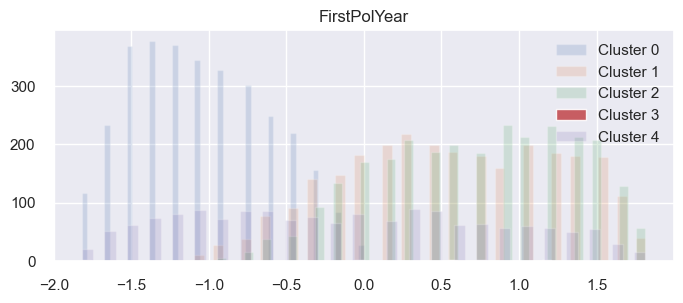

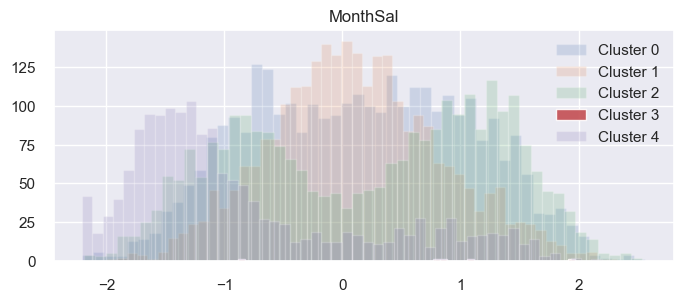

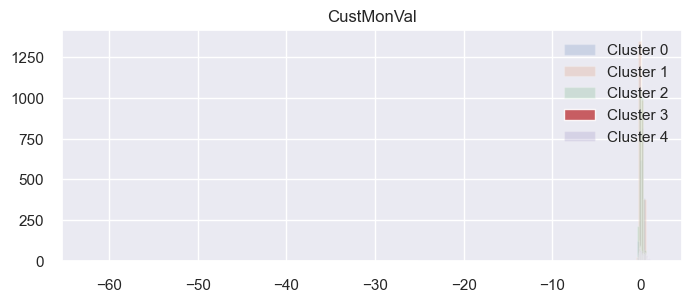

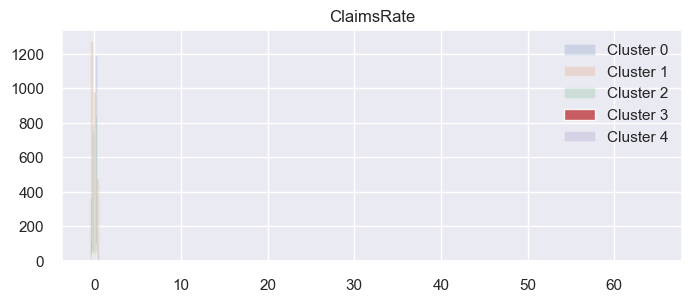

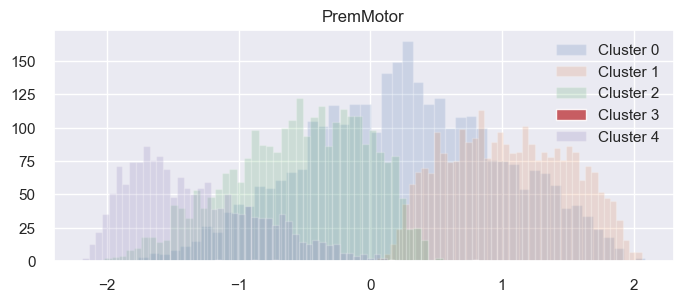

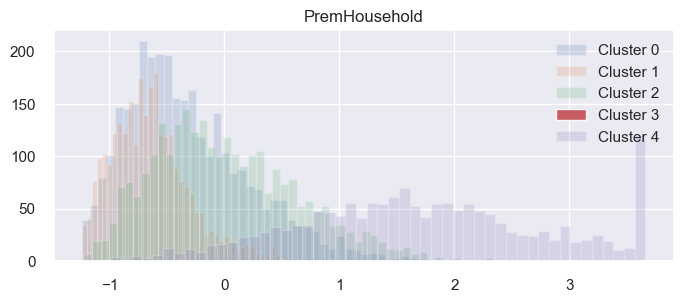

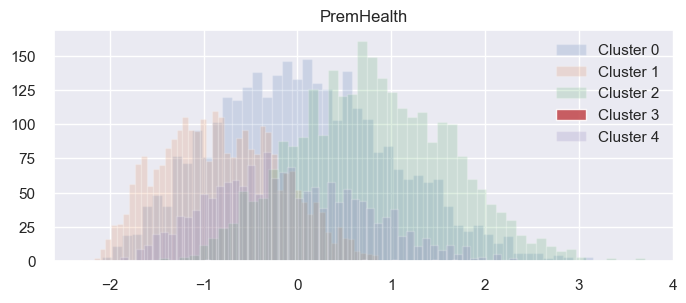

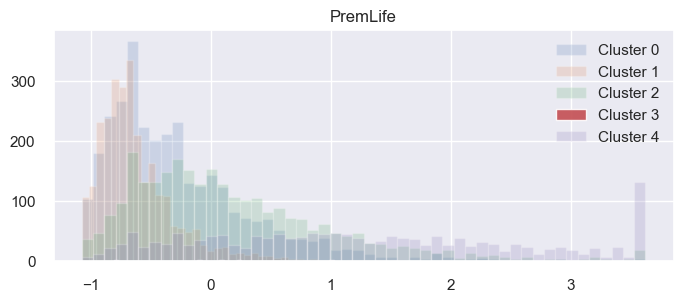

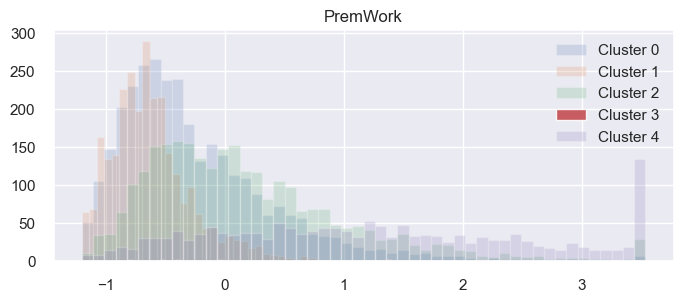

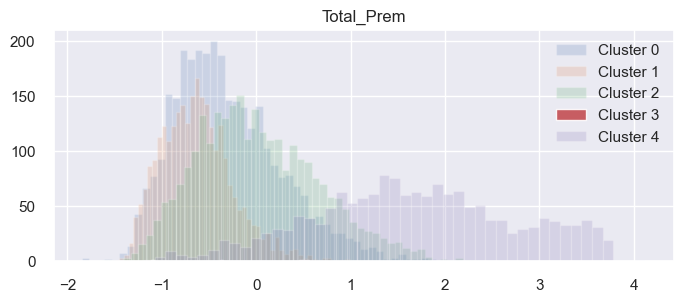

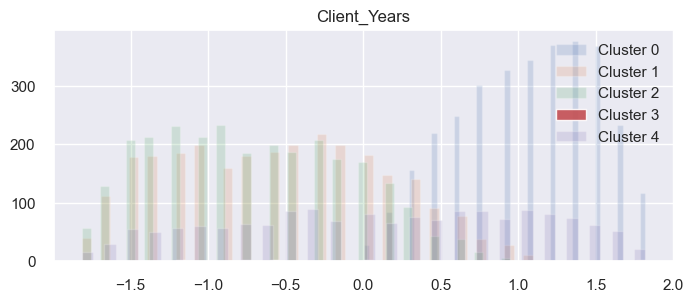

In [ ]:
for var in metric_features:
    plt.rcParams["figure.figsize"] = (8,3)
    plt.title(var)
    plt.hist(df_km[var].loc[df_km['Clusters']==0], alpha=0.2, label = 'Cluster 0', bins = 50)
    plt.hist(df_km[var].loc[df_km['Clusters']==1], alpha=0.2, label = 'Cluster 1', bins = 50)
    plt.hist(df_km[var].loc[df_km['Clusters']==2], alpha=0.2, label = 'Cluster 2', bins = 50)
    plt.hist(df_km[var].loc[df_km['Clusters']==3], alpha=0.9, label = 'Cluster 3', bins = 50)
    plt.hist(df_km[var].loc[df_km['Clusters']==4], alpha=0.2, label = 'Cluster 4', bins = 50)
    plt.legend(loc='upper right')
    plt.show()

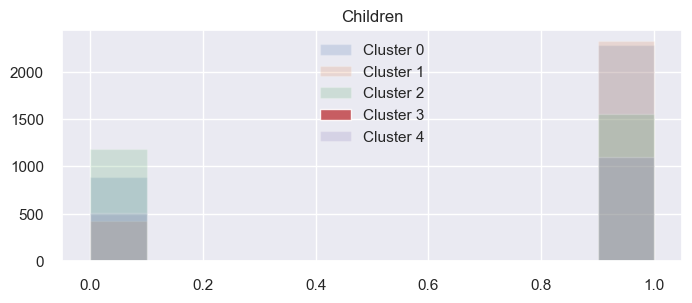

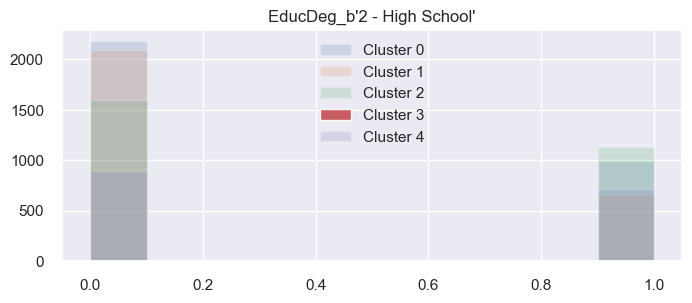

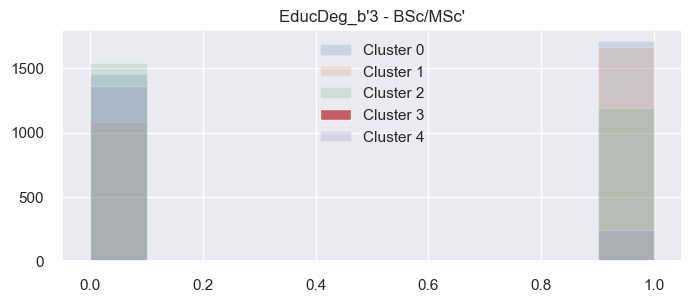

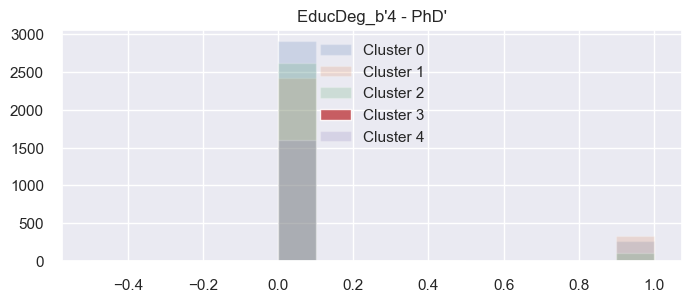

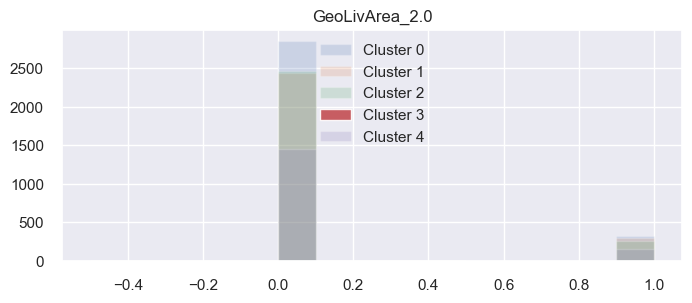

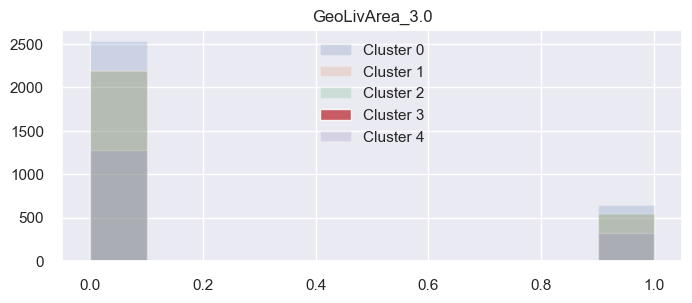

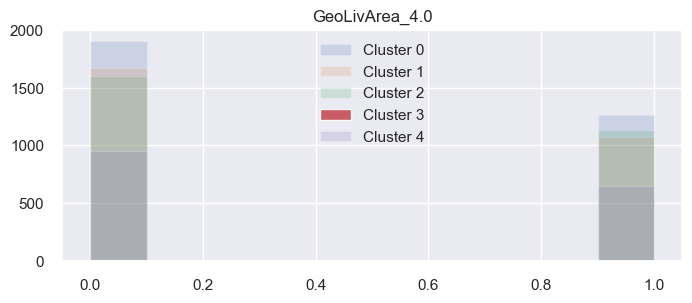

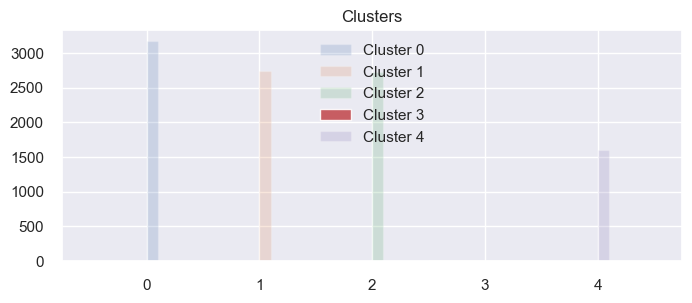

In [ ]:
for var in hc_non_metric_features:
    plt.rcParams["figure.figsize"] = (8,3)
    plt.title(var)
    plt.hist(df_km[var].loc[df_km['Clusters']==0], alpha=0.2, label = 'Cluster 0')
    plt.hist(df_km[var].loc[df_km['Clusters']==1], alpha=0.2, label = 'Cluster 1')
    plt.hist(df_km[var].loc[df_km['Clusters']==2], alpha=0.2, label = 'Cluster 2')
    plt.hist(df_km[var].loc[df_km['Clusters']==3], alpha=0.9, label = 'Cluster 3')
    plt.hist(df_km[var].loc[df_km['Clusters']==4], alpha=0.2, label = 'Cluster 4')
    plt.legend(loc='upper center')
    plt.show()

---

## 6.5 Cluster 4 <a name="Cluster4"></a>

In [ ]:
df_original[df_original['Clusters'] == 4].describe()

CustID  FirstPolYear     MonthSal   CustMonVal   ClaimsRate  \
count   1604.000000   1604.000000  1604.000000  1604.000000  1604.000000   
mean    5253.988778   1985.236284  1662.082793   337.663236     0.668965   
std     3002.291608      6.350809   980.936811   385.623922     0.329397   
min        2.000000   1974.000000   333.000000  -490.200000     0.000000   
25%     2655.500000   1980.000000   966.500000    20.787500     0.360000   
50%     5265.500000   1985.000000  1318.500000   252.830000     0.710000   
75%     7995.000000   1990.000000  2072.000000   637.047500     0.950000   
max    10293.000000   1998.000000  4659.000000  1716.000000     1.550000   

         PremMotor  PremHousehold   PremHealth     PremLife     PremWork  \
count  1604.000000    1604.000000  1604.000000  1604.000000  1604.000000   
mean    112.960660     586.772569   161.750613    97.201034    93.580252   
std      67.007148     239.785165    59.474918    58.052810    55.762227   
min      -4.110000     -20.550000    28.450000    -7.000000   -12.000000   
25%      59.900000     417.300000   116.772500    48.230000    48.065000   
50%      99.185000     570.650000   157.085000    91.350000    89.405000   
75%     158.947500     745.150000   204.260000   140.360000   136.305000   
max     350.620000    1025.800000   341.730000   201.930000   192.470000   

        Total_Prem  Client_Years  EducDeg_b'2 - High School'  \
count  1604.000000   1604.000000                 1604.000000   
mean   1052.265127     30.763716                    0.445137   
std     192.497633      6.350809                    0.497136   
min     474.540000     18.000000                    0.000000   
25%     918.900000     26.000000                    0.000000   
50%    1046.425000     31.000000                    0.000000   
75%    1182.990000     36.000000                    1.000000   
max    1494.864000     42.000000                    1.000000   

       EducDeg_b'3 - BSc/MSc'  EducDeg_b'4 - PhD'  GeoLivArea_2.0  \
count             1604.000000         1604.000000     1604.000000   
mean                 0.150873            0.000623        0.097257   
std                  0.358036            0.024969        0.296400   
min                  0.000000            0.000000        0.000000   
25%                  0.000000            0.000000        0.000000   
50%                  0.000000            0.000000        0.000000   
75%                  0.000000            0.000000        0.000000   
max                  1.000000            1.000000        1.000000   

       GeoLivArea_3.0  GeoLivArea_4.0  Clusters  
count     1604.000000     1604.000000    1604.0  
mean         0.201372        0.403990       4.0  
std          0.401150        0.490849       0.0  
min          0.000000        0.000000       4.0  
25%          0.000000        0.000000       4.0  
50%          0.000000        0.000000       4.0  
75%          0.000000        1.000000       4.0  
max          1.000000        1.000000       4.0

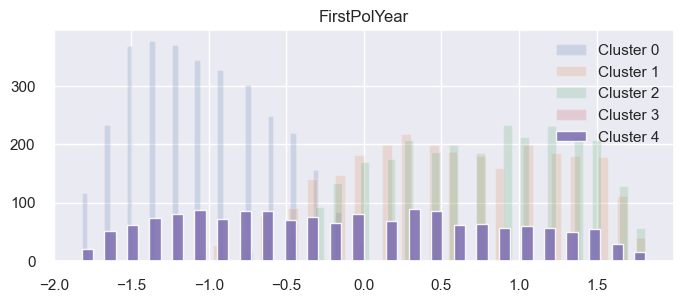

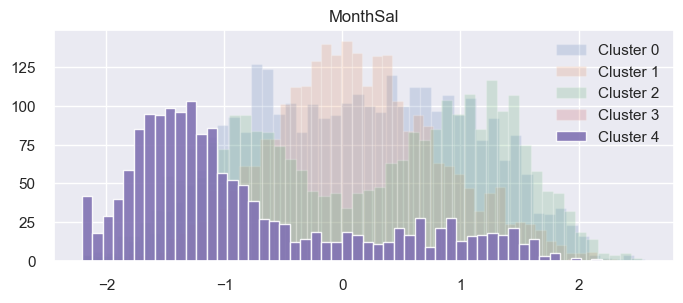

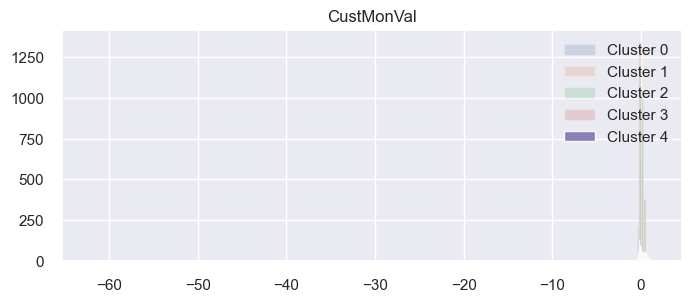

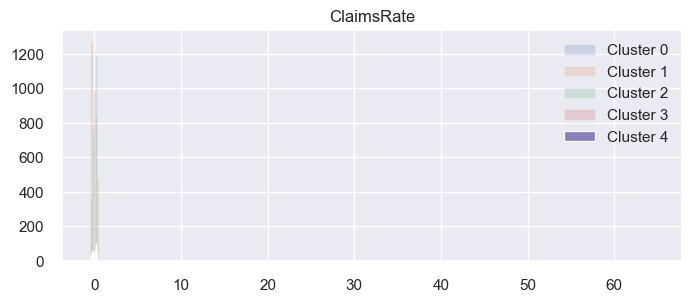

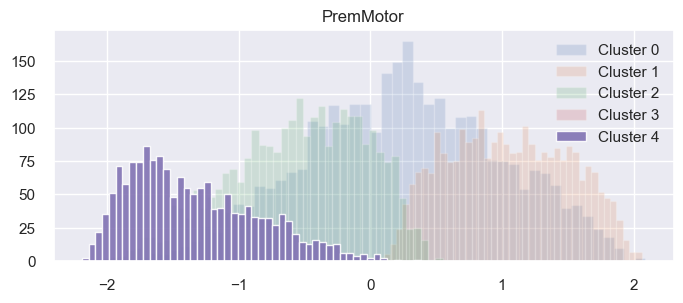

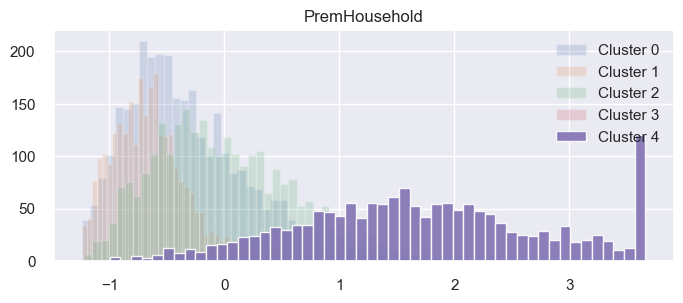

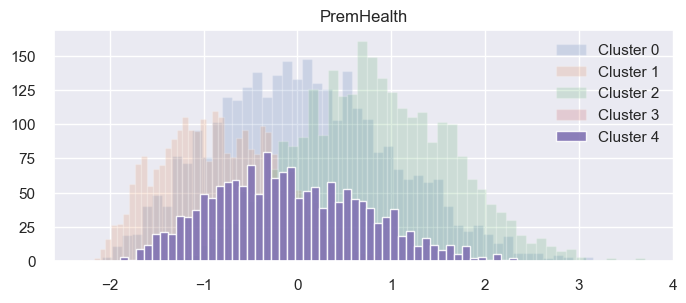

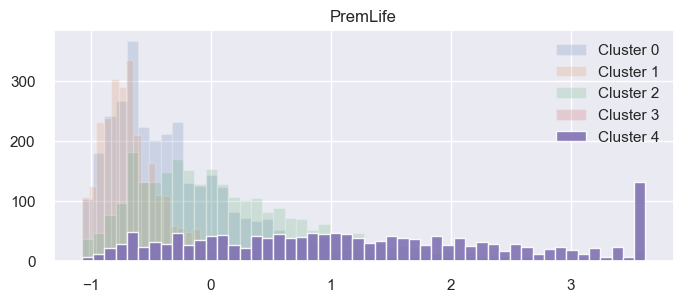

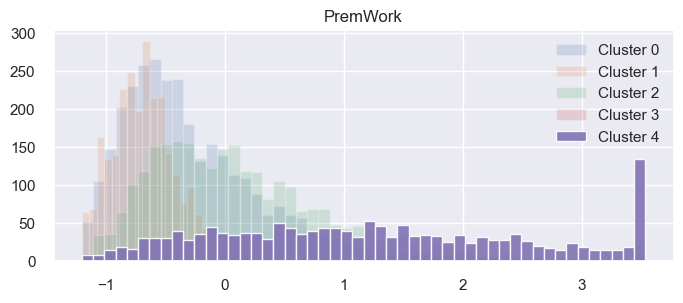

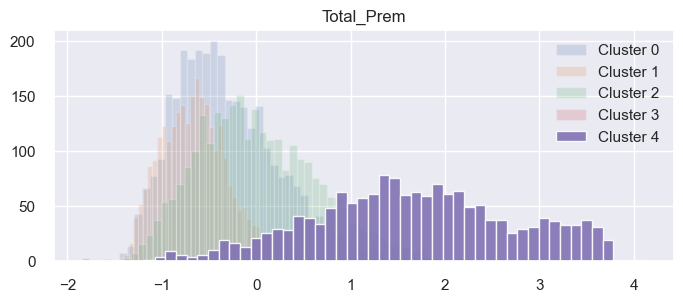

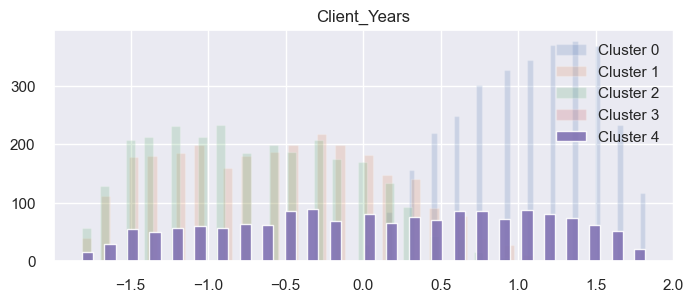

In [ ]:
for var in metric_features:
    plt.rcParams["figure.figsize"] = (8,3)
    plt.title(var)
    plt.hist(df_km[var].loc[df_km['Clusters']==0], alpha=0.2, label = 'Cluster 0', bins = 50)
    plt.hist(df_km[var].loc[df_km['Clusters']==1], alpha=0.2, label = 'Cluster 1', bins = 50)
    plt.hist(df_km[var].loc[df_km['Clusters']==2], alpha=0.2, label = 'Cluster 2', bins = 50)
    plt.hist(df_km[var].loc[df_km['Clusters']==3], alpha=0.2, label = 'Cluster 3', bins = 50)
    plt.hist(df_km[var].loc[df_km['Clusters']==4], alpha=0.9, label = 'Cluster 4', bins = 50)
    plt.legend(loc='upper right')
    plt.show()

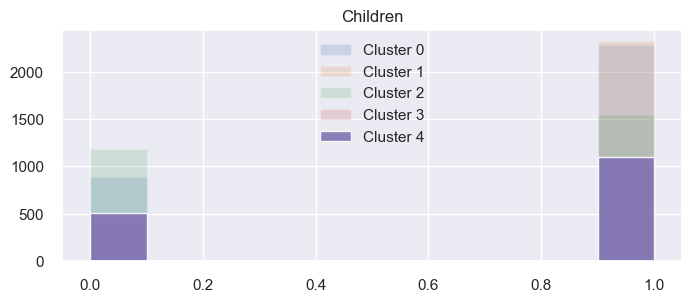

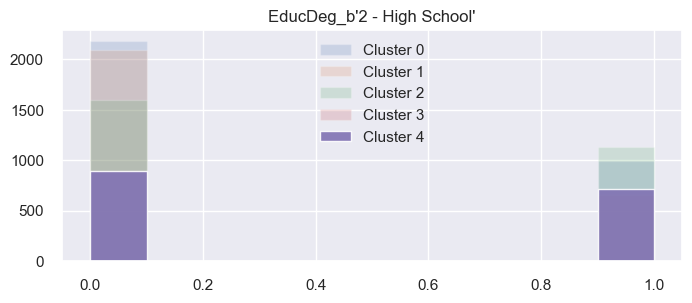

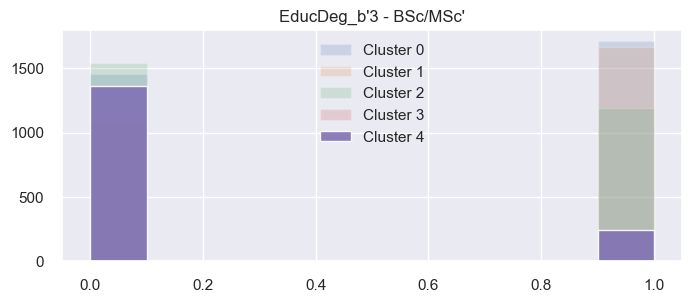

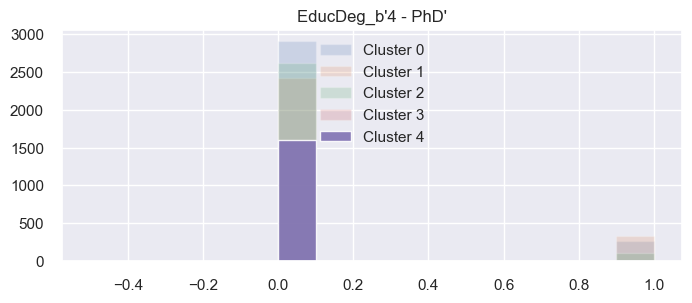

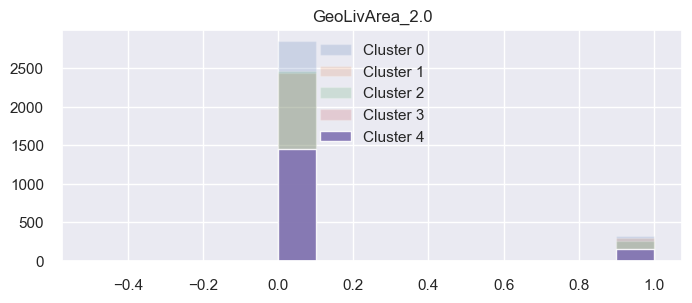

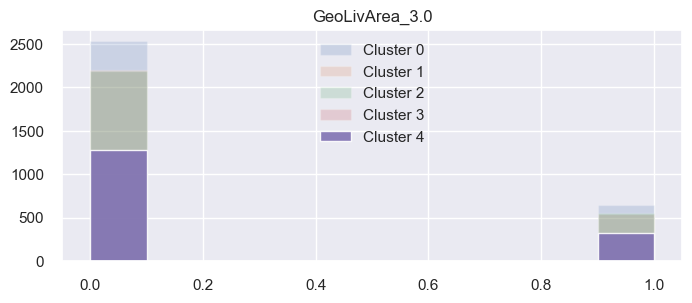

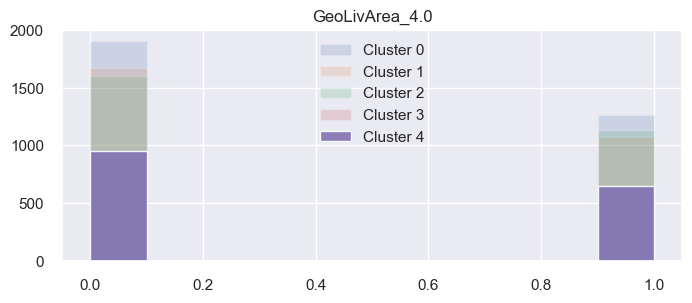

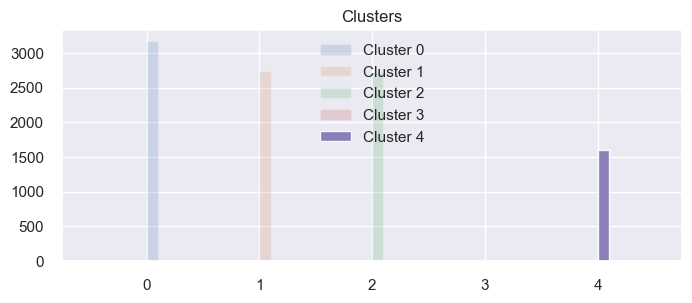

In [ ]:
for var in hc_non_metric_features:
    plt.rcParams["figure.figsize"] = (8,3)
    plt.title(var)
    plt.hist(df_km[var].loc[df_km['Clusters']==0], alpha=0.2, label = 'Cluster 0')
    plt.hist(df_km[var].loc[df_km['Clusters']==1], alpha=0.2, label = 'Cluster 1')
    plt.hist(df_km[var].loc[df_km['Clusters']==2], alpha=0.2, label = 'Cluster 2')
    plt.hist(df_km[var].loc[df_km['Clusters']==3], alpha=0.2, label = 'Cluster 3')
    plt.hist(df_km[var].loc[df_km['Clusters']==4], alpha=0.9, label = 'Cluster 4')
    plt.legend(loc='upper center')
    plt.show()

---

## 6.6 Clusters Summary <a name="ClusterSummary"></a>

In [ ]:
f = ['mean', 'std']
df_numeric_cluster = df_original[['FirstPolYear', 'MonthSal', 'CustMonVal','ClaimsRate', 'PremMotor', 'PremHousehold', 'PremHealth', 'PremLife',
       'PremWork', 'Total_Prem', 'Client_Years', 'Clusters']]
round(df_numeric_cluster.groupby('Clusters').agg(f),2).T

Clusters                  0        1        2         3        4
FirstPolYear  mean  1979.09  1989.78  1990.75   1987.00  1985.24
              std      2.94     4.49     4.11      7.81     6.35
MonthSal      mean  2644.34  2608.65  2718.51   3255.40  1662.08
              std    900.92   707.39  1054.39   1016.41   980.94
CustMonVal    mean   191.32   199.19   172.55 -41935.34   337.66
              std    253.69   412.92   366.13  16400.31   385.62
ClaimsRate    mean     0.69     0.65     0.74     59.06     0.67
              std      0.39     0.68     0.47     26.33     0.33
PremMotor     mean   331.10   441.30   222.83    247.62   112.96
              std    101.38    63.05    70.26    113.81    67.01
PremHousehold mean   131.90    59.91   206.39    196.37   586.77
              std    121.59    77.05   140.16    147.09   239.79
PremHealth    mean   172.07   108.25   227.48    226.78   161.75
              std     68.92    46.28    60.66     78.63    59.47
PremLife      mean    29.46    13.32    48.91     44.79    97.20
              std     28.74    14.77    37.69     29.26    58.05
PremWork      mean    29.17    13.09    47.82     36.54    93.58
              std     28.60    15.13    36.99     37.54    55.76
Total_Prem    mean   693.70   635.87   753.42    752.10  1052.27
              std    102.48    68.17   115.95    133.40   192.50
Client_Years  mean    36.91    26.22    25.25     29.00    30.76
              std      2.94     4.49     4.11      7.81     6.35

After having all the information available we can conclude that each of the clusters is composed as follows:

- **Cluster 0:** It has the oldest consumers of the 5 clusters with an average of almost 37 years with a policy contracted with the company. The highest expenditure is in PremMotor and its ClaimsRate is similar to that of the other clusters (except for cluster 3).

- **Cluster 1:** They are the cluster that spends the least with respect to the Total_Prem variable and have the lowest ClamisRate of all. Their main expense is PremMotor.

- **Cluster 2:** They represent the cluster with the least number of years linked to the company (25 years). They are the second highest spenders in total products and their main expense is PremHealth

- **Cluster 3:** These are the customers who have the highest salary, a negative CustMonVal, which indicates that they are a customer who has made a loss from an individual point of view.
They have the highest ClaimsRate (greater than 1), which means that the company has had to pay out more money than they have received in the last 2 years.


- **Cluster 4:** This group contains the consumers with the highest CustMonVal of all the clusters, indicating that they are the consumers who have delivered the most profit to the company individually. This is explained by having the highest Total_Prem, where their highest expenditure corresponds to PremHousehold.

---

# 7. Conclusions <a name="conclusions"></a>
<hr style="border:2px solid gray">

The first step in this project was to explore the database in order to understand its structure and components. Once we had an overview, we proceeded to clean the data so that they would not present problems in the application of algorithms. As can be seen, 2 clustering methods were tested: hierarchical agglomerative and k-means.

In the case of the hierarchical algorithm, the clusters found were 2, which were well identified, but presented limitations for its business application since they dichotomized the segmentation of clients, and a larger range of clusters was sought.

In the case of k-means, after applying the silhouette and elbow methods, we found that they proposed 2 and 5 clusters, respectively. After testing both cases, we decided on the 5-cluster option, as it presents a larger range and allows for more specific business strategies.

Once the 5 clusters were defined, we proceeded to the individual analysis, together with their proposals.

All the steps carried out during the project, seek to have a sequential logic so that it can be replicated in other contexts and offers the alternative of optimizing each of these, in order to find better solutions.

---